In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path

 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'open_clip'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'


In [5]:
df, metadata_df = load_df()

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 201 result files to load.


Found missing supervised models for:


pred seed             arch
0   torch_linear_delta_hypopt  123      vitb8 4xcls
1   torch_linear_delta_hypopt  123   vitl16 cls+avg
2   torch_linear_delta_hypopt  123          missing
3   torch_linear_delta_hypopt  123     vitl16 4xcls
4   torch_linear_delta_hypopt  123  vitl16 proj+cls
5   torch_linear_delta_hypopt  123     vitl16 4xcls
6   torch_linear_delta_hypopt  123   vitl16 cls+avg
7   torch_linear_delta_hypopt  123      vitl16 proj
8   torch_linear_delta_hypopt  123          missing
9   torch_linear_delta_hypopt  123          missing
10  torch_linear_delta_hypopt  123          missing
11  torch_linear_delta_hypopt  123     vitl16 4xcls
12  torch_linear_delta_hypopt  123   vitl16 cls+avg
13  torch_linear_delta_hypopt  123     vitl16 4xcls
14  torch_linear_delta_hypopt  123          missing
15  torch_linear_delta_hypopt  123   vitl16 cls+avg
16  torch_linear_delta_hypopt  123          missing
17  torch_linear_delta_hypopt  123          missing
18  torch_linear_delta_hypopt  123   vith14 cls+avg
19  torch_linear_delta_hypopt  123      vith14 proj
20  torch_linear_delta_hypopt  123     vith14 4xcls
21  torch_linear_delta_hypopt  123          missing
22  torch_linear_delta_hypopt  123          missing
23  torch_linear_delta_hypopt  123          missing
24  torch_linear_delta_hypopt  123          missing
25  torch_linear_delta_hypopt  123        vits8 cls
26  torch_linear_delta_hypopt  123          missing

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


train-cmplmnt-ntest_train-sbst-ntest  \
enc                                                                   
dino_vitb16_extracts                                         19.042   
dissl_resnet50_d4096_e100_m2                                 32.994   
dissl_resnet50_d8192_e100_m2                                 32.276   
dissl_resnet50_d8192_e400_m6                                 24.528   
dissl_resnet50_d8192_e800_m8                                 23.880   
init_vitb32                                                  96.200   
init_vitl16                                                  93.020   
mugs_vitb16_ep400_extracts                                   17.174   
pirl_rn50w2_headmlp                                          26.080   
simclr_resnet50_d8192_e100_m2                                30.432   
simclr_rn50w2                                                22.516   
simclr_rn50w2_ep100                                          27.646   
swav_rn50w2                                                  20.944   
vicreg_rn50w2                                                22.352   

                               train_train  train-cmplmnt-ntest_test  \
enc                                                                    
dino_vitb16_extracts                 0.811                    23.680   
dissl_resnet50_d4096_e100_m2         0.491                    32.988   
dissl_resnet50_d8192_e100_m2         0.656                    33.756   
dissl_resnet50_d8192_e400_m6         0.464                    28.492   
dissl_resnet50_d8192_e800_m8         0.463                    28.138   
init_vitb32                         92.428                       NaN   
init_vitl16                         87.061                       NaN   
mugs_vitb16_ep400_extracts           0.584                       NaN   
pirl_rn50w2_headmlp                  0.651                       NaN   
simclr_resnet50_d8192_e100_m2        0.465                    33.966   
simclr_rn50w2                        0.472                    26.106   
simclr_rn50w2_ep100                  0.473                    30.854   
swav_rn50w2                          0.248                    24.216   
vicreg_rn50w2                        0.256                    25.392   

                               train_test  union_test  sup_train_train  \
enc                                                                      
dino_vitb16_extracts               23.572         NaN            1.548   
dissl_resnet50_d4096_e100_m2       32.846         NaN            0.845   
dissl_resnet50_d8192_e100_m2       33.578         NaN            0.845   
dissl_resnet50_d8192_e400_m6       28.344         NaN            0.845   
dissl_resnet50_d8192_e800_m8       28.004         NaN            0.845   
init_vitb32                        95.864         NaN            1.132   
init_vitl16                        92.952         NaN            0.553   
mugs_vitb16_ep400_extracts         20.698         NaN            1.548   
pirl_rn50w2_headmlp                29.502         NaN            0.743   
simclr_resnet50_d8192_e100_m2      33.920         NaN            0.845   
simclr_rn50w2                      26.060         NaN            0.743   
simclr_rn50w2_ep100                30.706         NaN            0.743   
swav_rn50w2                        23.980         NaN            0.743   
vicreg_rn50w2                      25.326         NaN            0.743   

                               sup_train_test  agg_risk  approx  usability  \
enc                                                                          
dino_vitb16_extracts                   16.046    23.572   1.548     -0.737   
dissl_resnet50_d4096_e100_m2           24.244    32.846   0.845     -0.354   
dissl_resnet50_d8192_e100_m2           24.244    33.578   0.845     -0.189   
dissl_resnet50_d8192_e400_m6           24.244    28.344   0.845     -0.381   
dissl_resnet50_d8192_e800_m8           24.244    28.004   0.845     -0.382   
init_vitb3

The following results seem suspicously bad:


agg_risk
enc                        
beit_vitb16_pt22k    57.194

The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


approx  usability  probe_gen  enc_gen
enc                                                                    
clip_vitl14_px336_extractb           NaN        NaN     12.370    2.094
clip_vitl14_px336_extractpred        NaN        NaN      9.091    1.516
clip_vitl14_px336_extractpredcls     NaN        NaN     11.521    2.138
clip_vitl14_px336_extracts           NaN        NaN     12.183    2.250
dino_vits16_extractb                 NaN        NaN     10.441    4.102
dino_vits16_last                     NaN        NaN      4.293    3.812
dino_vits8_last                      NaN        NaN      4.449    3.818
ibot_vitl16_extractb                 NaN        NaN     16.055    2.664
ibot_vitl16_extracts                 NaN        NaN     15.083    3.370
ibot_vits16                          NaN        NaN      4.515    2.740
init_vits16                          NaN        NaN      1.423    0.324
init_vits16_dino_extractb            NaN        NaN      3.921    0.050
mocov3_vits_ep300                    NaN        NaN      5.416    3.850
msn_vitb4_ep300_extracts             NaN        NaN     14.197    5.576
msn_vitl7_ep200_extractb             NaN        NaN     14.460    4.930
msn_vitl7_ep200_extracts             NaN        NaN     14.336    6.586
msn_vits16_ep800                     NaN        NaN      5.070    3.288
mugs_vitl16_ep250_extractb           NaN        NaN     13.915    3.290
mugs_vitl16_ep250_extracts           NaN        NaN     10.174    3.652
mugs_vits16_ep100                    NaN        NaN      5.108    3.066
mugs_vits16_ep300                    NaN        NaN      5.269    3.486
mugs_vits16_ep800                    NaN        NaN      4.941    3.710
openclip_vith14_extractb             NaN        NaN     12.272    2.938
openclip_vith14_extractpred          NaN        NaN      9.357    2.448
openclip_vith14_extracts             NaN        NaN     12.912    2.720
sup_vits16                           NaN        NaN      6.255    5.376
sup_vits16_dino_extractb             NaN        NaN      5.786    6.644

In [6]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [7]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1336 result files to load.


In [8]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


train_test  train-nperclass-30_test  \
enc                                                             
openclip_vitg14_extracts   16.400000                      NaN   
openclip_vith14_extracts   16.103999                      NaN   

                          train-balsbst-ntrain0.01_test  \
enc                                                       
openclip_vitg14_extracts                         26.936   
openclip_vith14_extracts                         27.568   

                          train-nperclass-5_test  train-nperclass-3_test  
enc                                                                       
openclip_vitg14_extracts                  34.592                  40.896  
openclip_vith14_extracts                  36.386                  43.726

In [9]:
df = pd.merge(left=df,
              right=std[METRICS[1:]],
              right_index=True,
              left_index=True)

df["patch_size"] = df.apply(lambda row: (4 if row["family"] == "convnext" else 7) if pd.isna(row["patch_size"]) else row["patch_size"], axis=1)


# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']

df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
df_nona = df[~df[COMPONENTS ].isna().any(axis=1)].copy()
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

CORE_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", 
                   "trainrealaug_nc1norm", 'train_rank_Z'  ]
MINI_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", "train_rank_Z" ]

to_fit = COMPONENTS + ['train-nperclass-3_test']
melted = melt(df, components=to_fit)
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)
melted_stats = melt(df, components=CORE_STATISTICS)
melted_ministats = melt(df, components=MINI_STATISTICS)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-3shot"])

melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in CORE_METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

In [10]:
# print("Following results are missing:")
# missing=df.loc[df[CORE_STATISTICS].isna().any(axis=1),CORE_STATISTICS]
# missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

In [11]:
from hubconf import metadata_dict
n_hparam = sum([len(v) for k,v in metadata_dict()["simclr_rn101"].items() if k not in ["metrics","meta","compute"]])
n_metadata = sum([len(v) for k,v in metadata_dict()["simclr_rn101"].items() if k in ["metrics","meta","compute"]])
print("Number of hyperparameters:", n_hparam)
print("Number of metadata:", n_metadata)
print("Number of SSL models:", len(df))
print("Number of objectives:", len(df.objective.unique()))
print("Number of architecture:", len((df.architecture + "_"+ df.patch_size.astype(str)).unique()))

Number of hyperparameters: 30
Number of metadata: 9
Number of SSL models: 169
Number of objectives: 28
Number of architecture: 20


## All Radar
Let's plot the (relative) decomposition of results. Note that we only plot the ones that have no NaN.

In [12]:
# import math
# math.ceil(df.shape[0]/15)

In [13]:
from IPython.display import IFrame,display

is_plot_radar = False
save_path="figures/radars/all_radar.pdf"

if is_plot_radar:
    isna = df[COMPONENTS].isna().any(axis=1)
    plot_radar_grid(df[~isna], ncols=14, 
                    components=["agg_risk"]+COMPONENTS_ONLY, 
                    #models=~isna, 
                    save_path=save_path,
                    config_kwargs=dict(is_despine=False, font_scale=1, is_use_tex=True),
                    space_per_col=2)
else:
    out = IFrame(Path("..") / save_path, width=1000, height=500)
    display(out)

## All Results

In [14]:
large_table = df[["epochs"]+COMPONENTS_ONLY+CORE_METRICS].copy()
large_table[r"100\%"] =  large_table["train_test"] # 100 -
large_table["30 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table[r"1\%"] =  large_table['train-balsbst-ntrain0.01_test'] # 100 -
large_table["5 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table["3 shot"] =  large_table['train-nperclass-3_test']
large_table = large_table.drop(columns=CORE_METRICS)
model_arch, rest = zip(*[ clean_model_name(i, pretty_renamer=PRETTY_RENAMER) for i in large_table.index ])
large_table["Objective"], large_table["Arch."] = zip(*[ m.rsplit(" ",1) for m in model_arch ])
rest = [r.replace('_','\_')  for r in rest]
#large_table["Other"] = [r.replace("head","h")  for r in rest] 
large_table["Other"] = [rf"\miniscule{{{r}}}"  for r in rest] # can use \miniscule if want smaller
large_table = large_table.rename(columns=PRETTY_RENAMER).set_index(["Objective","Arch.","Epochs","Other"])
large_table.columns = pd.MultiIndex.from_arrays([[r"\textbf{Risk Component}"]*len(COMPONENTS_ONLY) + [r"\textbf{Aggregated Error}"]*len(CORE_METRICS), 
                                                large_table.columns])
large_table = large_table.sort_index(level=[0,1,2])



In [15]:
IS_PRINT_TEXT_TABLE = False # set True to print the table

tex_table = large_table.style.format(precision=2
                                    ).to_latex(multicol_align="c",
                                   hrules=True, 
                                   label="appx:tab:all_results",
                                    position="h",
                                 environment="longtable",
                                 multirow_align="t",
                            )

# adds multirow
tex_table= tex_table.replace("\\\\\n\\multirow","\\\\\n\\midrule\n\\multirow")
unique_obj = large_table.groupby("Objective").nunique().max(axis=1)
for o in unique_obj[unique_obj == 1].index:
    tex_table= tex_table.replace("\\\\\n"+o,"\\\\\n\\midrule\n"+o)

rows = tex_table.split("\n")
new_cols = r"} & \textbf{".join([r" "+i for i in rows[5].split("&  &")[0].split("&")]
                              ) + r"} & \textbf{" + r"} & \textbf{".join(rows[4].split("&  &")[-1].split("&"))
new_cols = r"\textbf{" + new_cols[:-2] + r"} \\"

if IS_PRINT_TEXT_TABLE:
    print(r"\begin{tiny}")
    for r in rows:
        if r.endswith(r"  &  &  &  \\"):
            continue
        elif r == rows[4]:
            print(new_cols)
            continue


        print(r)
        if r == rows[3]:
            print(r" \cmidrule(lr){5-8}  \cmidrule(lr){9-13} \ ")


        pass
    print(r"\end{tiny}")
    
#\begin{longtable}[h]{l@{\hspace{0.75\tabcolsep}}lll@{}rrrrrrrrr}

TO make the table fit you  should use {l@{\hspace{0.75\tabcolsep}}lll@{}rrrrrrrrr} for the columns (removes space after `other` column)

## Validating results

### Differences with published results

In [16]:
diff = df.copy()
diff[r"100\%"] = diff["train_test"] - (100 - diff["top1acc_in1k_official"])
diff[r"1\%"] = diff["train-balsbst-ntrain0.01_test"] - (100 - diff["top1acc_in1k-1%_official"])
diff[r"5 shot"] = diff["train-nperclass-5_test"] - (100 - diff["top1acc_in1k-c5_official"])
diff = diff.iloc[:,-3:].copy()

In [17]:
print(diff.describe())
save_path = "figures/validating/diff_published.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax = sns.stripplot(diff, ax=ax, size=7)
    #plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel("$\Delta$ with published ($\downarrow$ is better)")
    ax.set_xlabel("Probe training data")
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

            100\%       1\%    5 shot
count  114.000000  9.000000  3.000000
mean     1.130070  0.142889 -0.344667
std      3.010451  2.394576  0.475657
min    -17.566000 -4.272000 -0.854000
25%      0.404001 -1.254000 -0.561000
50%      0.916000  0.170000 -0.268000
75%      1.457999  1.526000 -0.090000
max     17.584002  4.028000  0.088000


In [18]:
import scipy.stats as stats
print(stats.ttest_rel(df["train_test"], (100 - df["top1acc_in1k_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-balsbst-ntrain0.01_test"], (100 - df["top1acc_in1k-1%_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-nperclass-5_test"], (100 - df["top1acc_in1k-c5_official"]), nan_policy="omit"))

TtestResult(statistic=4.007985801237009, pvalue=0.00011014055251947584, df=113)
TtestResult(statistic=0.17901567264897256, pvalue=0.862376076793401, df=8)
TtestResult(statistic=-1.2550651119275351, pvalue=0.3362312702180341, df=2)


In [19]:
max_delta = 3
print(f"Values that are worst by more than {max_delta}%")
idx = (diff.abs() > max_delta).any(axis=1)
big_diff = diff[idx].copy()
big_diff["epochs"] = df.loc[idx,"epochs"]

Values that are worst by more than 3%


In [20]:
caption = "Models for which the evaluated metrics are more than 3 accuracy points further than published results."
table_to_tex(big_diff, size_all="small", label="appx:tab:big_diff", size_other=r"\small", caption=caption)

\begin{small}
\begin{table}[h]
\centering
\caption{Models for which the evaluated metrics are more than 3 accuracy points further than published results.}
\label{appx:tab:big_diff}
\begin{tabular}{llllrrr}
\toprule
\textbf{ Objective } & \textbf{  Arch. } & \textbf{  Epochs } & \textbf{  Other } & \textbf{ 100\% } & \textbf{ 1\% } & \textbf{ 5 Shot } \\
\midrule
BYOL & RN50 & 1000 & \small{augnocolor} & -4.07 &  &  \\
\midrule
DISSL & RN50 & 100 & \small{dnone\_e100\_m2} & 5.04 &  &  \\
\midrule
DeepCluster & RN50 & 200 & \small{bs512\_ep200\_mmselfsup} & -17.57 &  &  \\
\midrule
\multirow[t]{2}{*}{Jigsaw} & \multirow[t]{2}{*}{RN50} & \multirow[t]{2}{*}{105} & \small{in22k} & 17.58 &  &  \\
 &  &  & \small{} & 10.77 &  &  \\
\midrule
\multirow[t]{2}{*}{MSN} & ViT-B16 & 600 & \small{ep600} &  & -4.27 &  \\
 & ViT-L16 & 300 & \small{ep600} & 6.36 &  &  \\
\midrule
MUGS & ViT-S16 & 800 & \small{ep800\_extracts} & -1.71 & 4.03 &  \\
\midrule
PIRL & RN50 & 200 & \small{ep200} & 3.62 &  &  \

In [21]:
curr = melted_Onlymetrics.rename(columns=dict(metric="Probe training", metric_value="Error"))
curr["Probe training"] = curr["Probe training"].replace(PRETTY_RENAMER.exact_match)

In [22]:
save_path = "figures/validating/density_metrics.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    sns.kdeplot(curr, 
                x="Error", 
                fill=True, 
                cut=0, 
                hue='Probe training')
    
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

In [23]:
for m1,m2 in zip(CORE_METRICS[:-1],CORE_METRICS[1:]):
    delta = (df[m1]-df[m2])
    assert (delta[~delta.isna()] < 0).all(), f"error {m1} {m2}"

### Trends

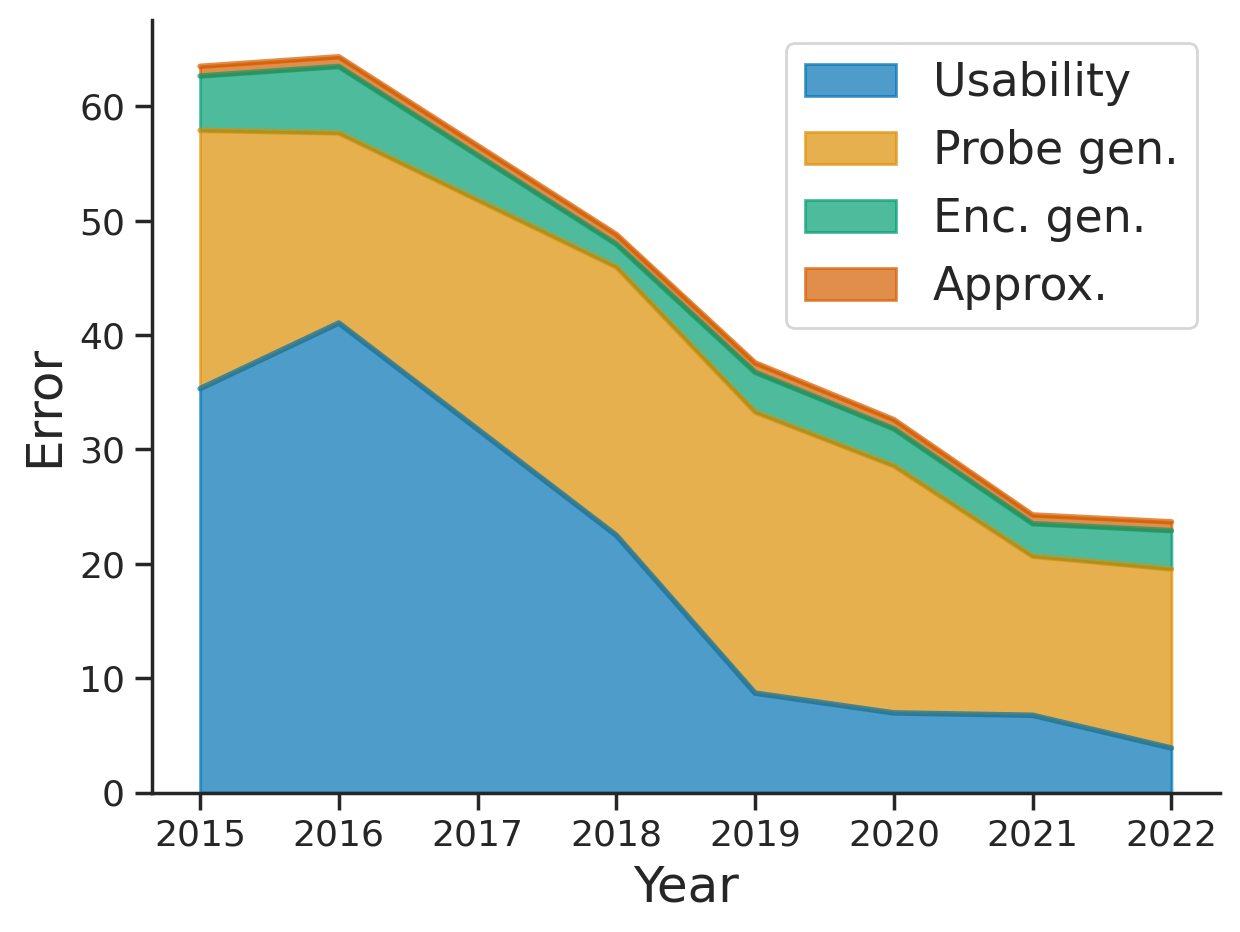

In [24]:
plot_trend(df, 
           is_min=False, 
           save_path="figures/trends/trend_avg_all.pdf")

This was the mean over each model. For the min see the one in the main paper

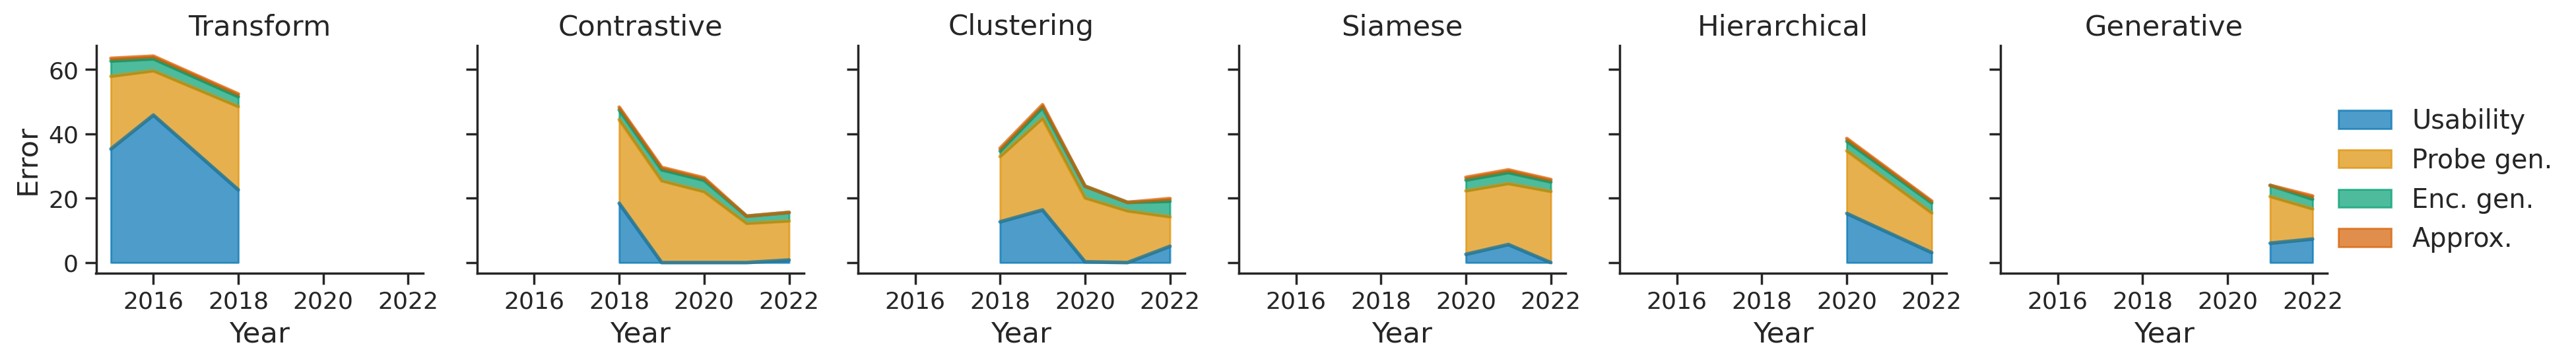

In [25]:
ordering = ["Transform","Contrastive","Clustering","Siamese","Hierarchical","Generative"]
plot_trend_split(df, 
                 "ssl_mode", ordering=ordering, is_min=True, 
                 save_path="figures/trend_mode.pdf")

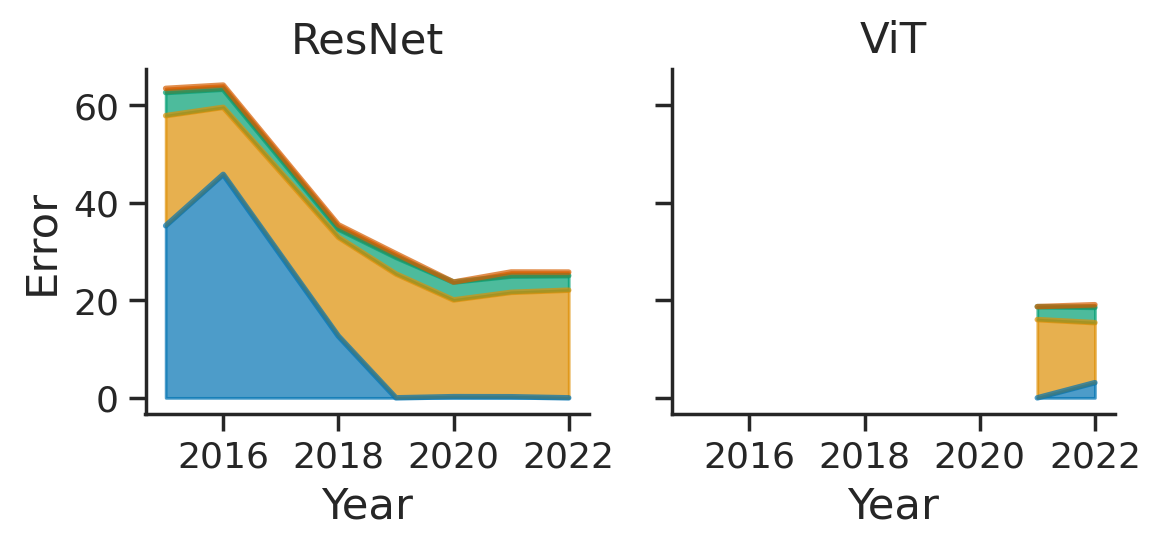

In [26]:
plot_trend_split(df_IN.query("family != 'convnext'"),  # convnext is only last year => remove
                 "family", 
                 ordering=None, is_min=True, is_legend=False,
                 save_path="figures/trend_arch.pdf",
                 pretty_renamer=dict(resnet="ResNet", vit="ViT")
                )


### Tradeoffs

First let us look at all tradeoffs

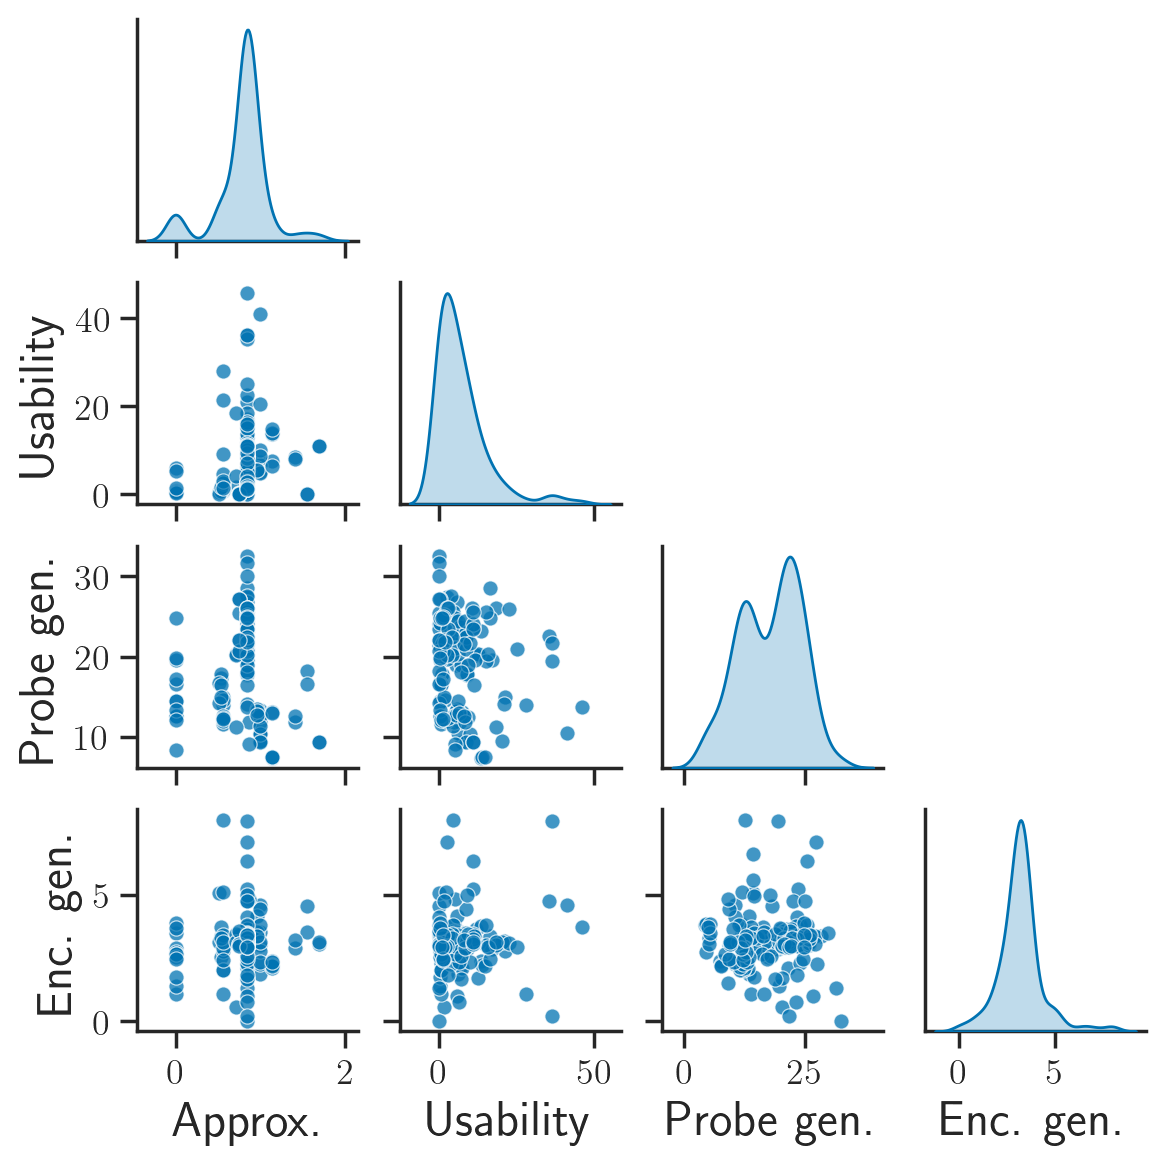

In [27]:
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    g = sns.pairplot(df[COMPONENTS_ONLY].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             corner=True)
    
    
    plt.savefig("figures/tradeoffs/all_tradeoffs.pdf", bbox_inches='tight', pad_inches=0.2)

now let us look at the best models for each years, as we did in the the main paper.
Note that we skip years < 2018 (as there are very few models for those years + they perform terribly so we cannot see differences in the newer models due to axis scaling)  and models for which we could estimate approximation error (isntead of those for which we set it to zero).

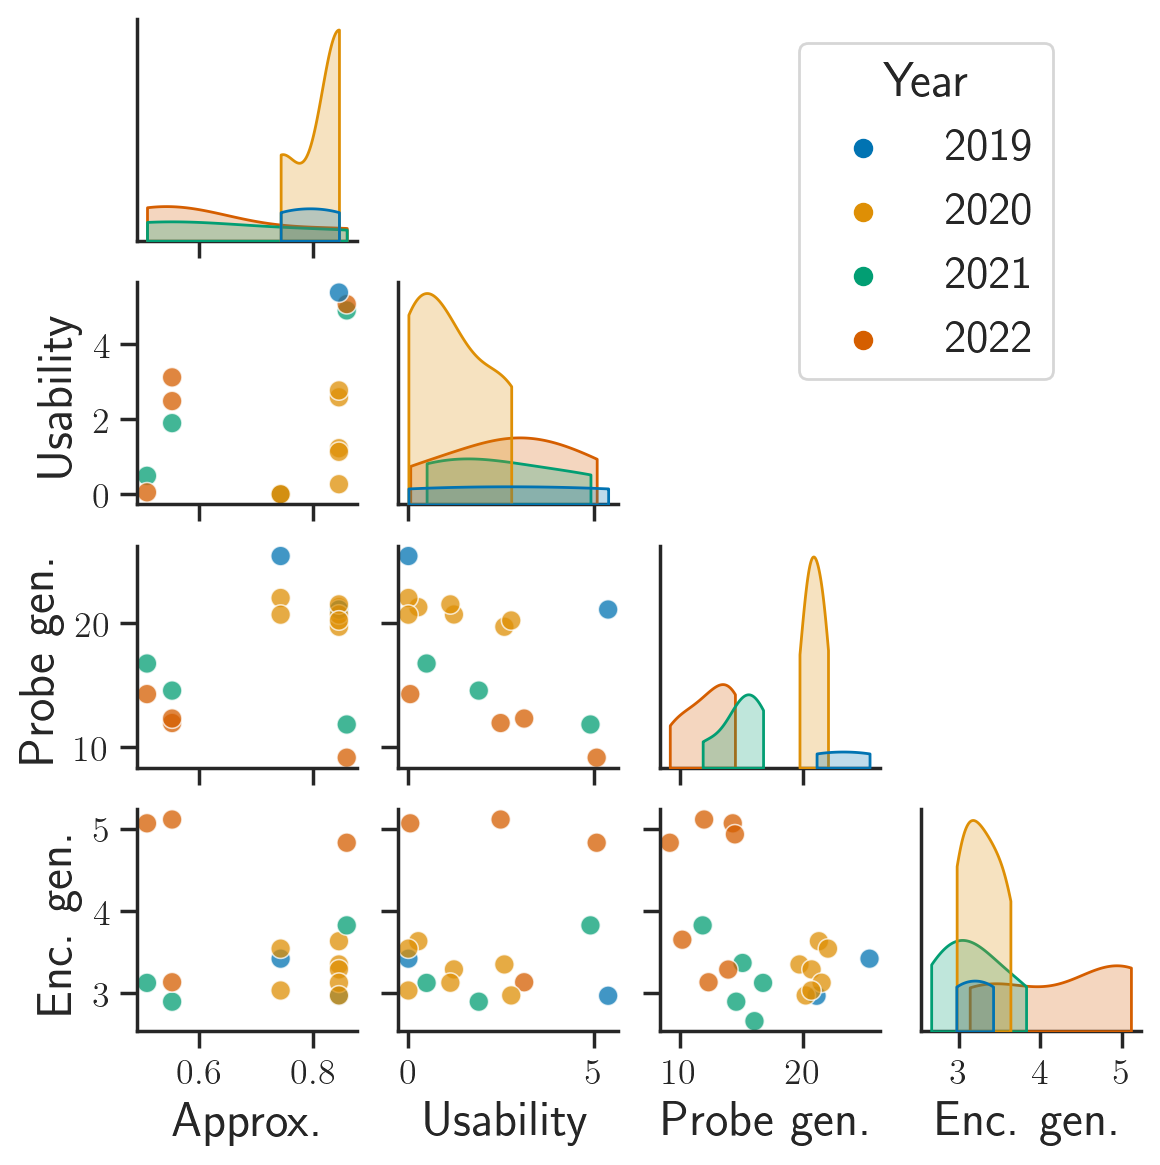

In [28]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    
    data=filter_by_quantile(df_IN, is_year=True, quantile=0.15)[COMPONENTS_ONLY+["year"]].query("year >= 2019 & approx != 0").rename(columns=PRETTY_RENAMER)
    data["Year"] = data["Year"].astype("category")
    
    g = sns.pairplot(data,
            hue="Year",
                     height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=50, alpha=0.75),
             corner=True,
                    diag_kws=dict(cut=0)
                    )
    sns.move_legend(g, "lower center", bbox_to_anchor=(.65, .65), ncol=1, frameon=True)

    
    plt.savefig("figures/tradeoffs/all_tradeoffs_best.pdf", bbox_inches='tight', pad_inches=0.2)
    #g.set(xscale="log",yscale="log")
    

In [29]:
filter_by_quantile(df_IN, is_year=True, quantile=0.15)[COMPONENTS_ONLY+["year"]].rename(columns=PRETTY_RENAMER).query("Year >= 2022")


Approx.  Usability  Probe gen.  Enc. gen.  Year
enc                                                                         
msn_vitb4_ep300             0.858748   5.066631    9.152622   4.827999  2022
msn_vitb4_ep300_extractb    0.508521   0.049798   14.285681   5.064000  2022
msn_vitl7_ep200             0.552543   2.481878   11.949579   5.110000  2022
msn_vitl7_ep200_extractb         NaN        NaN   14.460450   4.930000  2022
mugs_vitl16_ep250           0.552543   3.114895   12.312562   3.136000  2022
mugs_vitl16_ep250_extractb       NaN        NaN   13.915047   3.289999  2022
mugs_vitl16_ep250_extracts       NaN        NaN   10.173582   3.651999  2022

#### Initialized

In [30]:
data = df_init.copy()
data["architecture"] = data["architecture"].apply(lambda x: PRETTY_RENAMER(x))
data["family"] = data["family"].apply(lambda x: dict(vit="ViT", resnet="ResNet")[x])
data = data[~data.usability.isna()]
data = data.rename(columns=PRETTY_RENAMER).rename(columns={"Z dim.": r"\textbf{Z dim.}",
                                                 "Arch.": r"\textbf{Arch.}"})

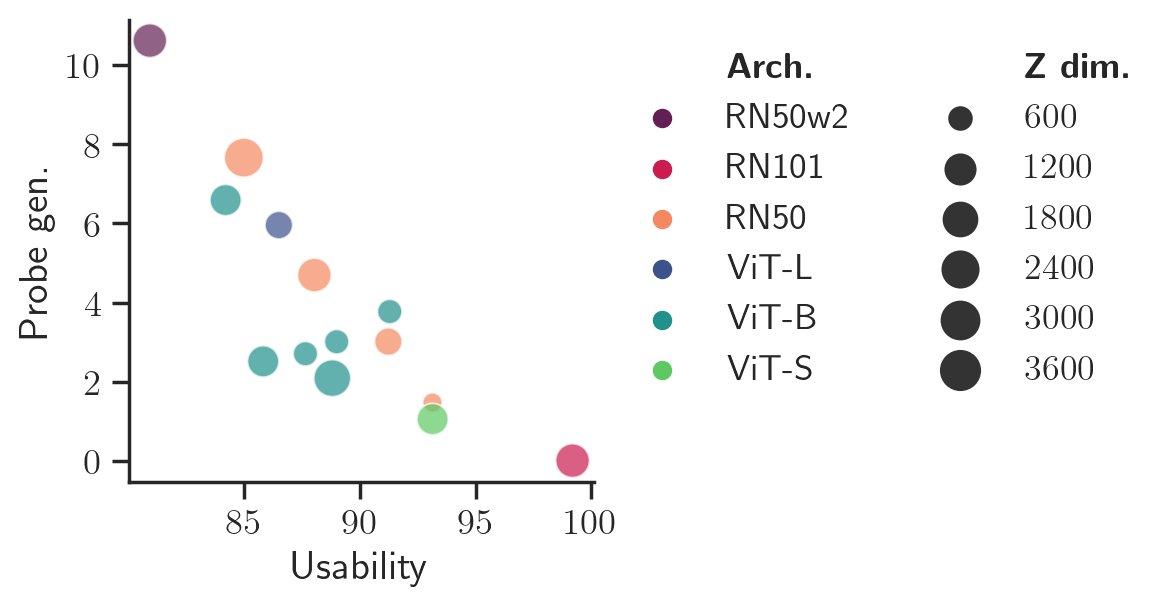

In [31]:


palette = sns.color_palette("rocket", n_colors=3) + sns.color_palette("viridis", n_colors=3)
with plot_config(is_use_tex=True, rc={"legend.fontsize": 13}, 
                 palette=palette, font_scale=1.2):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    g=sns.scatterplot(data=data, 
                      x=PRETTY_RENAMER["usability"], 
                      y=PRETTY_RENAMER["probe_gen."], 
                      hue=r"\textbf{Arch.}",
                      hue_order=["RN50w2","RN101","RN50","ViT-L","ViT-B","ViT-S"],
                      #style="Family",
                      size=r"\textbf{Z dim.}",
                      size_norm=SymLogNorm(linthresh=30,base=2),
                      sizes=(50, 200),
                      s=150, ax=ax, alpha=0.7)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=2, frameon=False)
    ax.yaxis.get_major_locator().set_params(integer=True)
    #g.set(xscale="log",yscale="log")
    
plt.savefig("figures/tradeoffs/tradeoffs_initialized.pdf", bbox_inches='tight', pad_inches=0.1)

### Alternative decomposition

In [32]:
%%capture capt
df_alternative, _ = load_df(traverse_path=["down","down","right"])
idx_alternative = ~df_alternative["probe_gen"].isna() # models for which you have the alternative decomposition
df_alternative = df_alternative[idx_alternative]

df_notalternative, _ = load_df()
df_notalternative = df_notalternative[idx_alternative]

In [33]:
df_alternative = df_alternative[["enc_gen","probe_gen"]].reset_index()
df_alternative["alternative"] = True
df_notalternative = df_notalternative[["enc_gen","probe_gen"]].reset_index()
df_notalternative["alternative"] = False

In [34]:
df_alt = pd.concat([df_alternative,df_notalternative])
df_alt["enc"] = df_alt["enc"].apply(lambda x: clean_model_name(x, pretty_renamer=PRETTY_RENAMER)[0])
df_alt = df_alt.query("enc != 'RotNet RN50'")

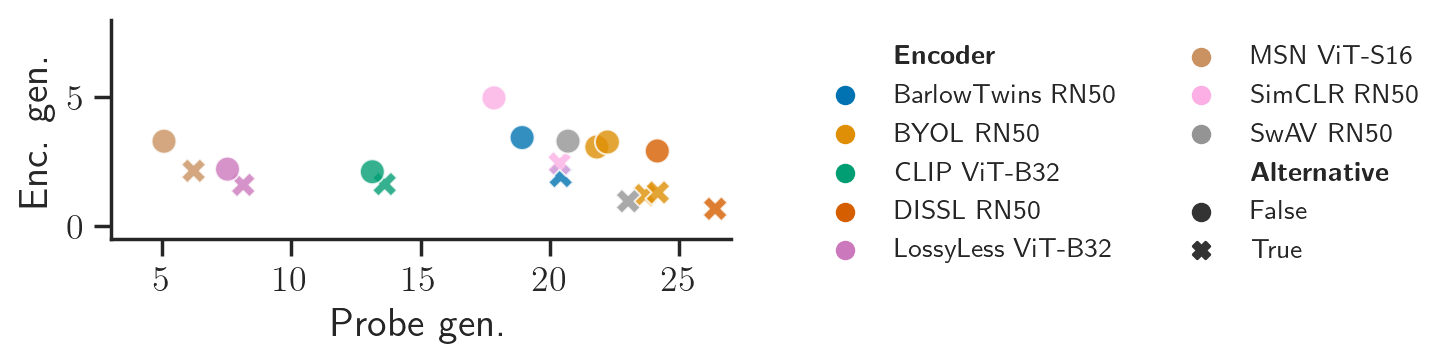

In [35]:
with plot_config(is_use_tex=True,  font_scale=1.2,
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, 
                     "legend.fontsize": 10}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    data=data=df_alt.rename(columns=PRETTY_RENAMER
                           ).rename(columns=dict(Enc=r"\textbf{Encoder}",
                                                 Alternative=r"\textbf{Alternative}"))
    g=sns.scatterplot(data=data, 
                      y=PRETTY_RENAMER["enc_gen"], x=PRETTY_RENAMER["probe_gen"], 
                      style=r"\textbf{Alternative}", hue=r"\textbf{Encoder}", 
                      s=80,  ax=ax, alpha=0.8)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 1),ncol=2, frameon=False)
    plt.axis('scaled')
    g.set(ylim=[-0.5,8],xlim=[3,27])
    
plt.savefig("figures/alternatives/alternative.pdf", bbox_inches='tight', pad_inches=0.1)

### Evaluation

#### Correlations

Let us check the correlation between the actual performance and usability/probe gen

In [36]:
for m in CORE_METRICS:
    print(m)
    print("usability")
    compute_correlations(df["usability"], df[m], correlations=["Kendall"])
    print("gen")
    compute_correlations(df["probe_gen"], df[m], correlations=["Kendall"])
    print()


train_test
usability
Kendall correlation: 0.436 pvalue = 6.67e-15
gen
Kendall correlation: 0.456 pvalue = 1.30e-18

train-nperclass-30_test
usability
Kendall correlation: 0.423 pvalue = 5.31e-14
gen
Kendall correlation: 0.477 pvalue = 5.87e-20

train-balsbst-ntrain0.01_test
usability
Kendall correlation: 0.414 pvalue = 1.37e-13
gen
Kendall correlation: 0.484 pvalue = 1.03e-20

train-nperclass-5_test
usability
Kendall correlation: 0.393 pvalue = 2.18e-12
gen
Kendall correlation: 0.485 pvalue = 8.69e-21

train-nperclass-3_test
usability
Kendall correlation: 0.374 pvalue = 2.44e-11
gen
Kendall correlation: 0.484 pvalue = 9.39e-21



Let's see this visually

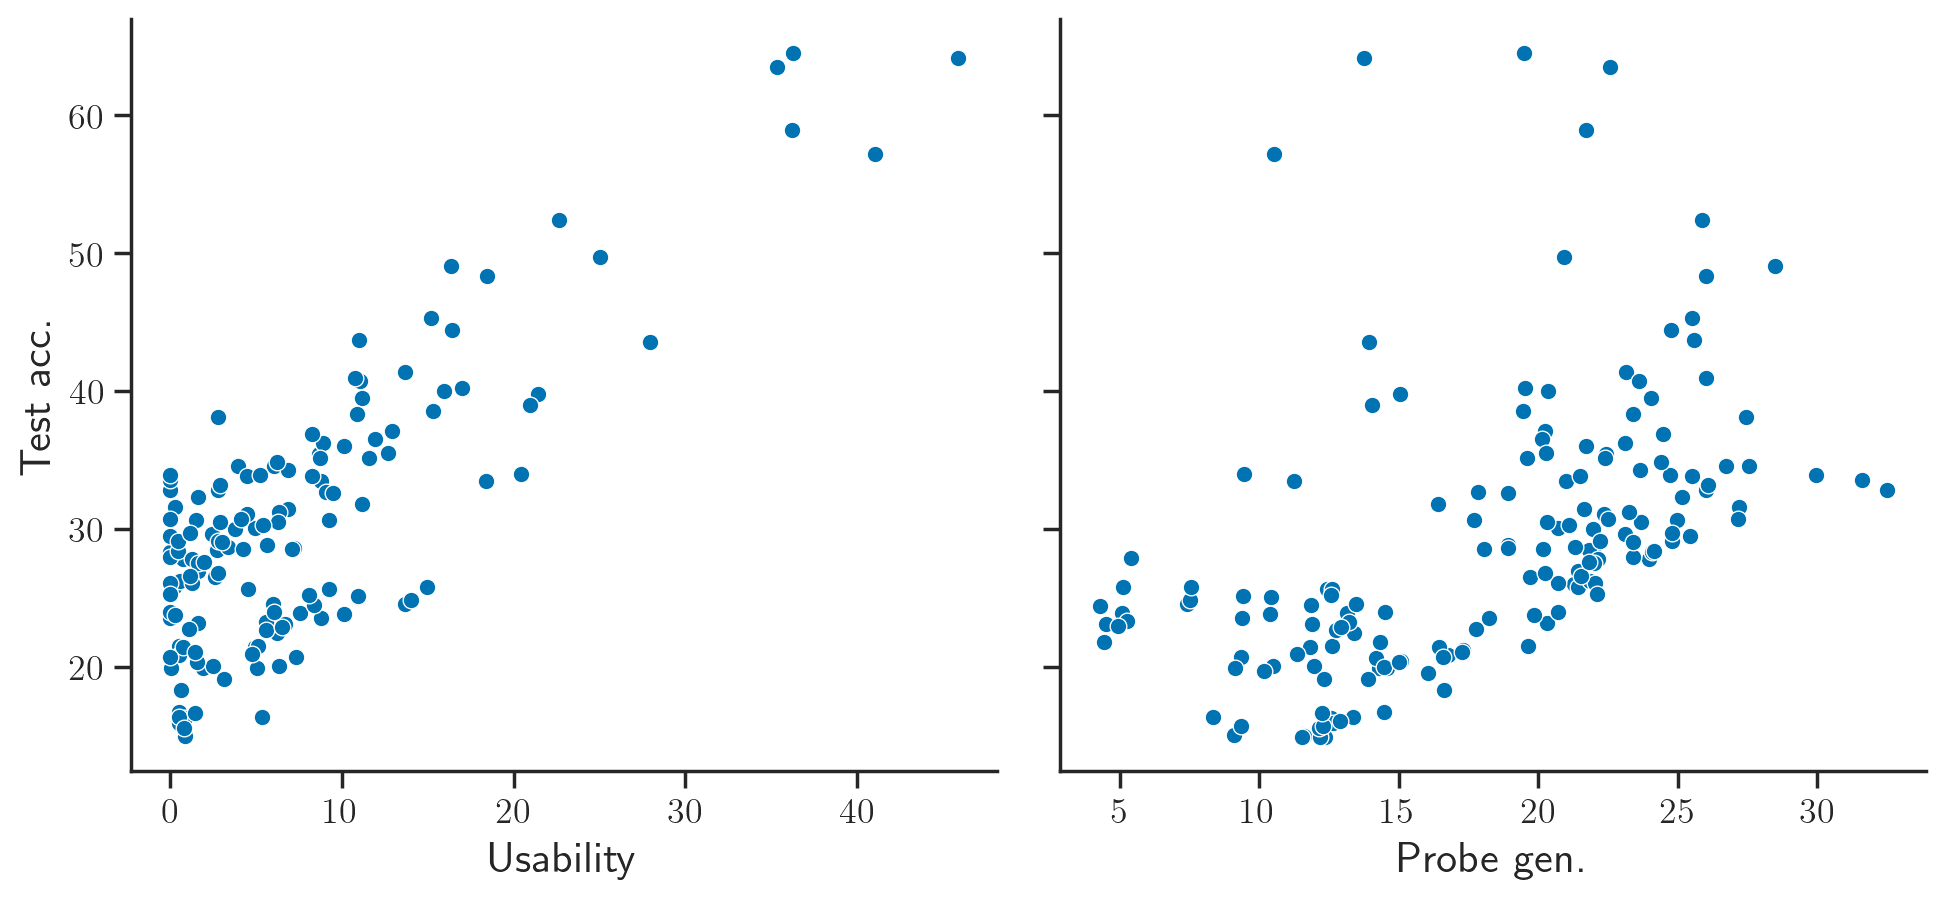

In [37]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel="Test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

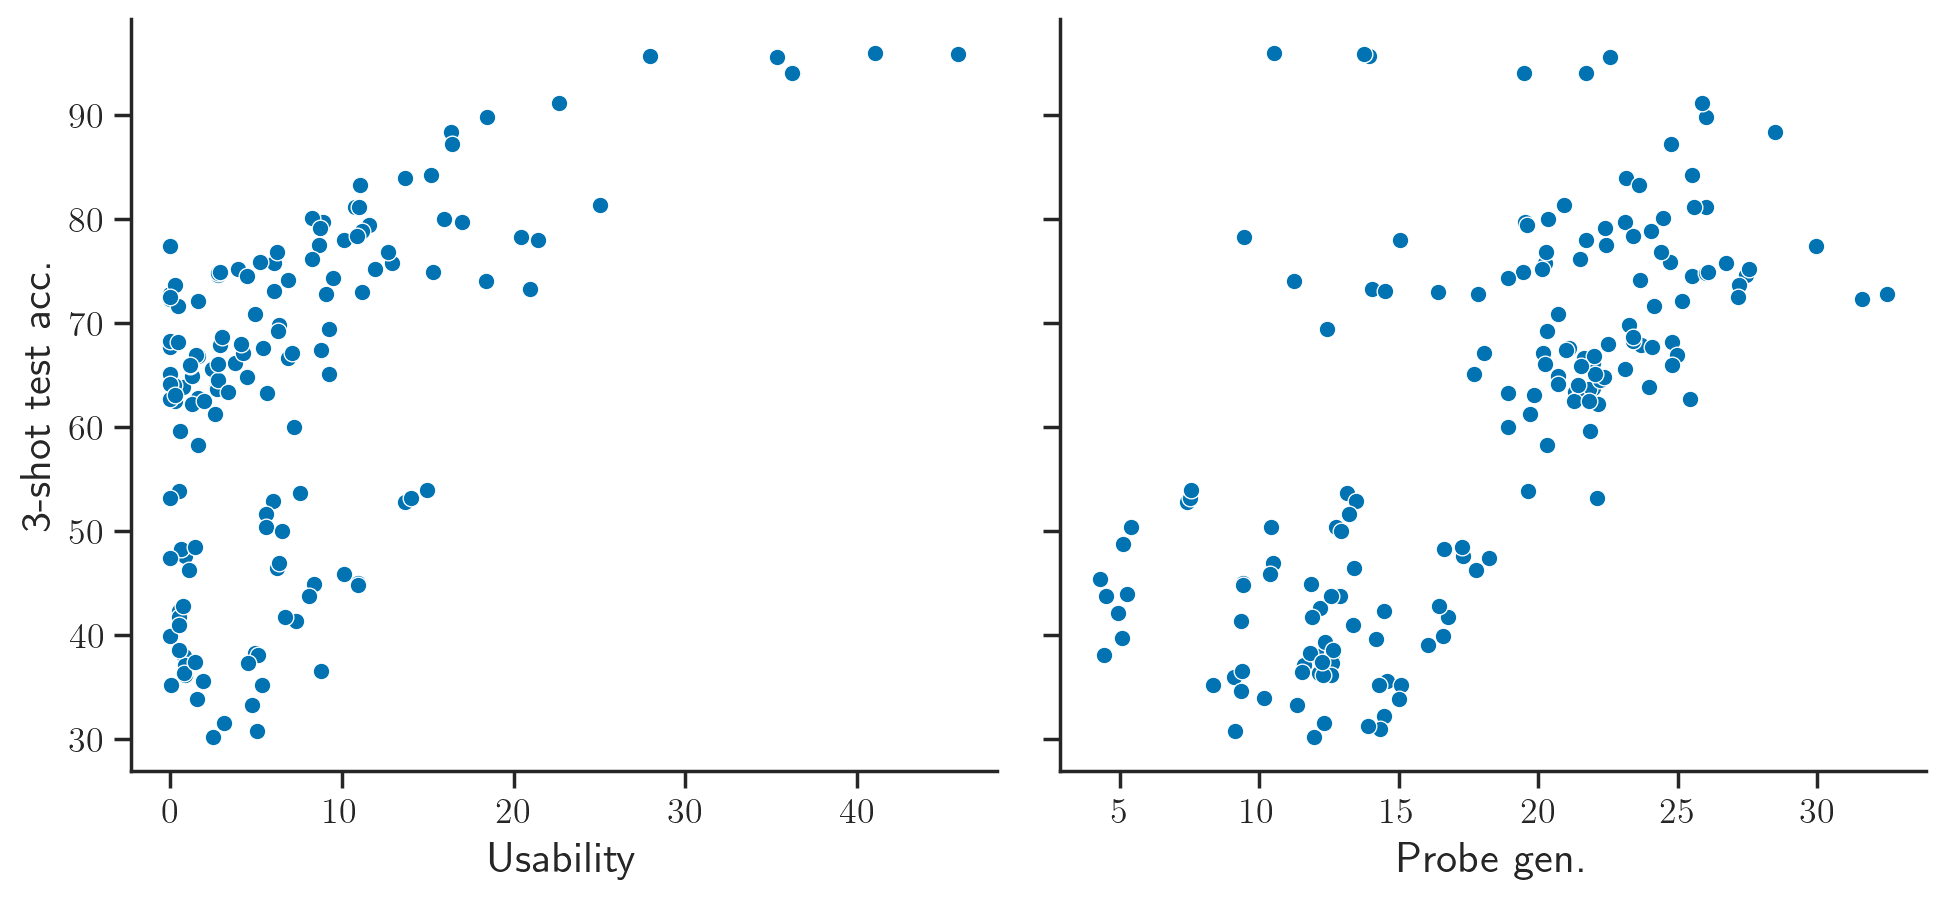

In [38]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train-nperclass-3_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel=r"3-shot test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

Note that usability is still correlated with performance.
This is not true if we consider the difference between 100 and few shot:

In [39]:
df_nona = df[~df[COMPONENTS].isna().any(axis=1)].copy()
for m in CORE_METRICS[1:]:
    print(m)
    
    for c in ["usability","probe_gen"]:
        print(c)
        compute_correlations(df_nona[c], 
                             df_nona[m] - df_nona["train_test"] , 
                             correlations=["Kendall"])
    print()

train-nperclass-30_test
usability
Kendall correlation: 0.334 pvalue = 2.72e-09
probe_gen
Kendall correlation: 0.446 pvalue = 1.68e-15

train-balsbst-ntrain0.01_test
usability
Kendall correlation: 0.304 pvalue = 5.60e-08
probe_gen
Kendall correlation: 0.456 pvalue = 3.07e-16

train-nperclass-5_test
usability
Kendall correlation: 0.212 pvalue = 1.53e-04
probe_gen
Kendall correlation: 0.466 pvalue = 7.03e-17

train-nperclass-3_test
usability
Kendall correlation: 0.129 pvalue = 2.09e-02
probe_gen
Kendall correlation: 0.471 pvalue = 3.42e-17



#### Scaling laws

In [40]:
data = melt(df_nona.reset_index(), components=CORE_METRICS, var_name="metrics")
data["n_samples"] = [get_sample_size(m) for m in data["metrics"]]
data = data[~data["value"].isna()]
data["n_params_probe"] = data["z_dim"]*1000
print(f"Standard deviation to explain: {data['value'].std():.2f}")

data.groupby("metrics")['value'].std().to_frame().T

Standard deviation to explain: 18.87


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
value                        15.994956                14.711812   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
value                 16.585257               16.749431    9.660997

In [41]:
test_kwargs = dict(#test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
                   test_size=2*len(data["enc"].unique()),
                    stratify="enc"
                  )

##### Baselines

First let us check the standard model independent scaling law
$$
\begin{aligned}
\mathrm{perf}(n) &= \mathrm{irr} + \frac{C}{n^{\alpha}} \\
\log(\mathrm{perf}(n) - \mathrm{irr}) &=  \gamma - \alpha \log(n) \\
\end{aligned}
$$


In [42]:
model,_ = fit_scaling_law(data, ["np.log(n_samples)"], target="value")
print(model.summary().tables[1])

R2 = 0.410. best rmse: 15.299. best delta eps: 11.257
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2595      0.080     65.419      0.000       5.102       5.417
np.log(n_samples)    -0.1755      0.008    -22.480      0.000      -0.191      -0.160


In [43]:
_ = scalinglaw(data, independent_vars = ["n_samples"], **test_kwargs) 

*Train* RMSE: 14.6618. R2: 0.4111
*Test* RMSE: 15.3237. R2: 0.3116


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         17.443894                12.927577   
r2                           -0.001967                -0.005936   
mse                           0.986552                 0.989445   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  16.306929               17.238171   10.124212  
r2                    -0.000066               -0.011939   -0.024834  
mse                    0.982521                0.995877    1.002555

param                C        Irr     alpha
value mean  275.460522  17.977886  0.224513
      sem          NaN        NaN       NaN

N param: 3


Now probe dependent
$$
\mathrm{perf}(n,p) = \mathrm{irr} + \frac{C}{n^{\alpha}} +  \frac{K}{p^{\beta}}
$$
where $p$ is the number of parameters

In [44]:

_ = scalinglaw(data, 
               f_pred = f_pred_param,
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 14.6618. R2: 0.4111
*Test* RMSE: 15.3237. R2: 0.3116


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         17.443908                12.927612   
r2                           -0.001969                -0.005942   
mse                           0.986554                 0.989451   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  16.306926               17.238165   10.124250  
r2                    -0.000066               -0.011939   -0.024841  
mse                    0.982521                0.995876    1.002562

param                C        Irr          K     alpha      beta
value mean  275.406044  17.974606  25.099204  0.224481  1.841821
      sem          NaN        NaN        NaN       NaN       NaN

N param: 5


We see that, interestingly, the number of parameters (or equivalently the z_dim) is not useful to predict performance.

Now encoder dependent
$$
\mathrm{perf}(n,p,e) = \mathrm{irr(e)} + \frac{C(e)}{n^{\alpha(e)}}  +  \frac{K}{p^{\beta}}
$$


In [45]:
_ = scalinglaw(data, 
               model_col="architecture",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 10.2964. R2: 0.7096
*Test* RMSE: 10.8027. R2: 0.6579


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         11.979501                10.146846   
r2                            0.527454                 0.380276   
mse                           0.465276                 0.609565   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  11.607772               10.787655    8.667278  
r2                     0.493263                0.603698    0.248902  
mse                    0.497846                0.390011    0.734770

param                C        Irr       K     alpha      beta
value mean  617.105832  10.640007  1000.0  0.325657  0.361945
      sem    98.319322   1.568777     NaN  0.028935       NaN

N param: 44


In [46]:
data["objective"] = data["objective"].replace("clip+eb","lossyless")
_ = scalinglaw(data, 
               model_col="objective",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 6.7924. R2: 0.8736
*Test* RMSE: 7.3469. R2: 0.8418


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          8.380864                 6.898835   
r2                            0.768717                 0.713524   
mse                           0.227725                 0.281779   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   8.586625                6.163874    6.072898  
r2                     0.722713                0.870616    0.631258  
mse                    0.272422                0.127330    0.360726

param                C        Irr         K     alpha      beta
value mean  386.061593  11.479378  17.60572  0.234240  0.138758
      sem    50.157024   1.716754       NaN  0.023353       NaN

N param: 86


We see that the gains are much better (unsurprisingly).
Now let us try to use the agg risk as the irreducible error.

Now as a lower bound on what we can achieve let us consider fitting a different scaling law for each of all the models

In [47]:
_ = scalinglaw(data, 
               model_col="enc",
               max_nfev=10000, 
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 0.6694. R2: 0.9988
*Test* RMSE: 2.4433. R2: 0.9825


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          1.390308                 1.355400   
r2                            0.993635                 0.988942   
mse                           0.006267                 0.010877   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   2.478965                1.631765    4.632983  
r2                     0.976889                0.990933    0.785389  
mse                    0.022706                0.008924    0.209946

param                C        Irr          K     alpha      beta
value mean  277.509843  15.233914  89.533734  0.225111  1.013754
      sem     6.471426   0.634741        NaN  0.004471       NaN

N param: 440


We see that the RMSE when fitting a scaling law for each of the model is really good, which basically shows that the log-log linear assumption is realatively good.

##### Using our risk decomposition

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(n,m) = \mathrm{usability}(n,m) + \mathrm{approx}(n,m) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n,m)$$ 
where $n$ is the number of samples and $m$ is the encoder. 

Now by standard scaling laws we also have (note that there is no irreducible error as this is taken into account in the approx /usability/enc_gen => gen gap is 0 if all data) :
$$ \mathrm{probe\_gen}(n,m) = \frac{C(m)}{n^{\alpha(m)}}$$ 

The issue is we do not want to fit $C(m)$ and $\alpha(m)$ for each model. It has been shown empirically that alpha typically takes similar values so we'll fix it to be the same for all models. For $C(m)$ we can use the fact that we know $\mathrm{probe\_gen}(N)$ where $N$ is ImageNet training size. We thus have:
$$ \mathrm{probe\_gen}(n,m)n^{\alpha}  =  C(m) = \mathrm{probe\_gen}(N,m)N^{\alpha}$$
so 

$$
\begin{aligned}
\mathrm{perf}(n,m) &= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +  \mathrm{probe\_gen}(n,m) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(N,m) \left(\frac{N}{n}\right)^{\alpha} 
\end{aligned}
$$


In [48]:
N = data["n_samples"].max() -  50000 # n trainig samples for probe gen

In [49]:
from IPython.utils import io

def f_pred_our1(params, data, model_var):
    return (data["enc_gen"] + data["train_train"]  + data["probe_gen"] * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our1, possible_params = [ "alpha"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_1param = scalinglaw(data, **kwargs) 

*Train* RMSE: 5.7415. R2: 0.9097
*Test* RMSE: 5.6978. R2: 0.9048


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          6.016651                 5.162200   
r2                            0.880800                 0.839599   
mse                           0.117366                 0.157771   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   7.436855                6.104835    0.123218  
r2                     0.792000                0.873083    0.999848  
mse                    0.204351                0.124902    0.000149

param          alpha
value mean  0.162125
      sem        NaN

N param: 1


Note that we thus get the following equation, which we see fits better all the models despite using a single parameter.

$$\mathrm{perf}   =  \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen} +   \mathrm{probe\_gen}*\frac{N}{\mathrm{n\_samples}}^{\color{blue}{0.16}}  $$

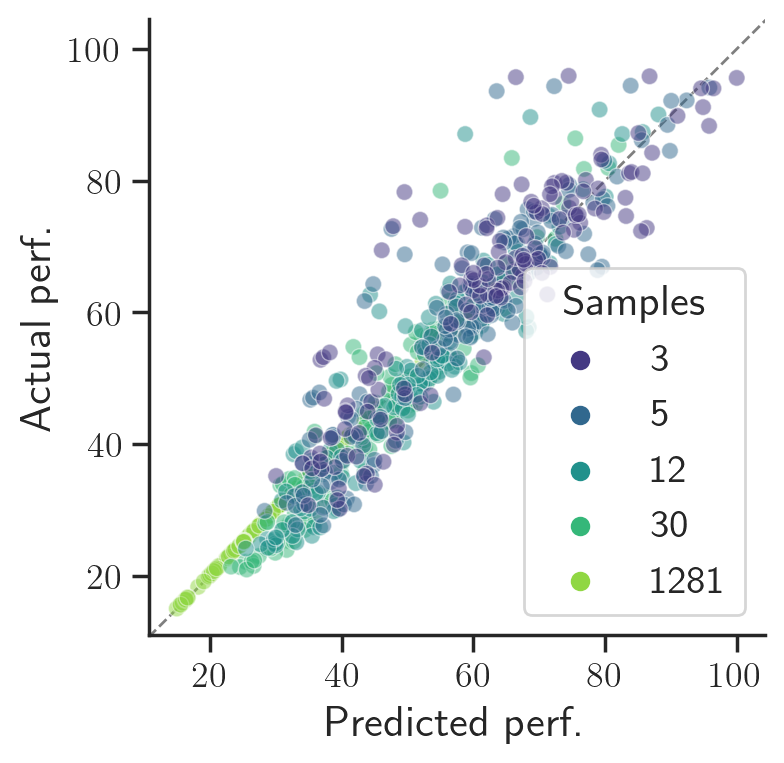

In [50]:
results = results_1param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    g=sns.scatterplot(tmp, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)

We can further improve the model by noticing that the importance of usability changes also depending on the number of samples.

In [51]:
def f_pred_our2b(params, data, model_var):
    return (data["enc_gen"] +data["approx"]+ (1-params["B"])*data["usability"]+ (params["B"] *data["usability"]  + data["probe_gen"]) * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_2param = scalinglaw(data, **kwargs) 

*Train* RMSE: 4.3157. R2: 0.9490
*Test* RMSE: 4.3691. R2: 0.9440


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          4.933819                 3.854139   
r2                            0.919845                 0.910589   
mse                           0.078922                 0.087945   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   5.567828                4.572950    0.147850  
r2                     0.883411                0.928786    0.999781  
mse                    0.114543                0.070084    0.000214

param              B     alpha
value mean  0.514245  0.147246
      sem        NaN       NaN

N param: 2


We indeed see that the performance improves

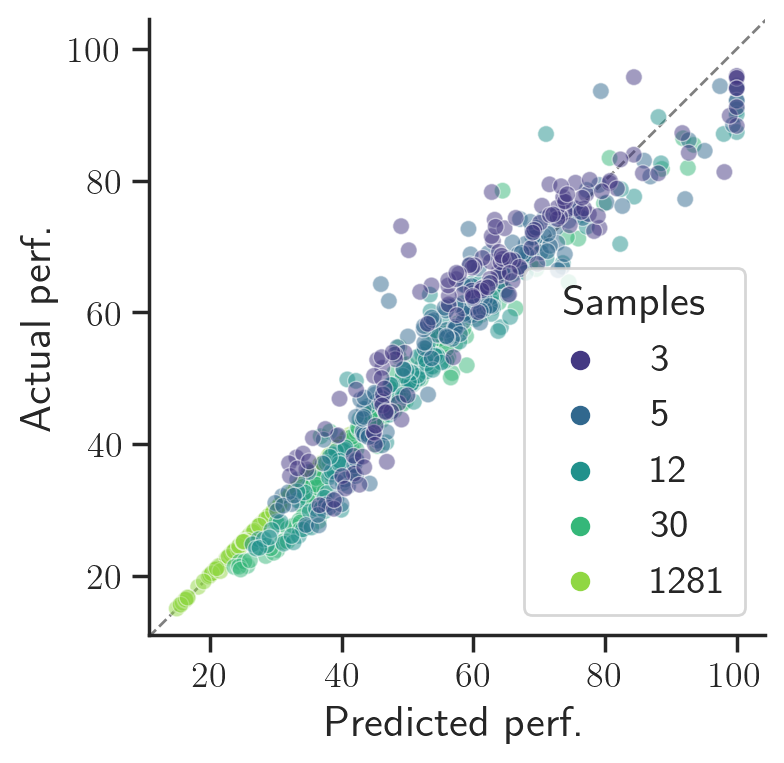

In [52]:
results = results_2param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    g=sns.scatterplot(tmp, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)
    
plt.savefig("figures/evaluation_scalinglaw.pdf", bbox_inches='tight', pad_inches=0.1)

What about if you specifically hold out some number of samples?

In [53]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
               **kwargs) 

*Train* RMSE: 4.2633. R2: 0.9538
*Test* RMSE: 4.4798. R2: 0.9311


metrics  train-nperclass-30_test  train-nperclass-5_test
rmse                    3.814427                5.054579
r2                      0.932309                0.908303
mse                     0.067224                0.091069

param              B    alpha
value mean  0.541762  0.14777
      sem        NaN      NaN

N param: 2


One important advantage of our method is that we can actually predict the performance of completely new models which is not possible if you need to fit a scaling law for each model. 
For example let's predict the performance of all models from 2022 or all contrastive methods.

In [54]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["ssl_mode"].isin(["contrastive"]),
               **kwargs) 

*Train* RMSE: 4.7680. R2: 0.9367
*Test* RMSE: 3.6025. R2: 0.9629


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          2.986991                 2.675954   
r2                            0.962588                 0.963124   
mse                           0.036756                 0.036218   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   5.654546                4.088006    0.136242  
r2                     0.869225                0.935273    0.999760  
mse                    0.128480                0.063592    0.000236

param              B   alpha
value mean  0.562017  0.1438
      sem        NaN     NaN

N param: 2


In [55]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["year"].isin([2022]),
               **kwargs) 

*Train* RMSE: 4.3676. R2: 0.9450
*Test* RMSE: 4.4149. R2: 0.9223


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          4.994130                 4.590273   
r2                            0.854790                 0.831302   
mse                           0.141669                 0.164480   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   5.097172                5.046404    0.193869  
r2                     0.899670                0.889933    0.999086  
mse                    0.097883                0.107383    0.000892

param              B     alpha
value mean  0.515825  0.149631
      sem        NaN       NaN

N param: 2


### Statistics

Checking effect of statistics on performance in few shot and many shot + comapre / analuse effect with decomposition

In [56]:
NOAUG_STATISTICS = ['train_vars', 'train_alignment', 'train_uniformity', "train_nc1norm"]
FIXEDAUG_STATISTICS = ['trainaug_vars', 'trainaug_alignment', 'train_uniformity', "trainaug_nc1norm"]
TEST_STATISTICS = [s.replace("train","test") for s in CORE_STATISTICS]
TEST_FIXEDAUG_STATISTICS = [s.replace("train","test") for s in FIXEDAUG_STATISTICS]
TEST_NOAUG_STATISTICS = [s.replace("train","test") for s in NOAUG_STATISTICS]
MINI_STATISTICS = ['train_rank', 'train_uniformity', 'trainrealaug_alignment']

In [57]:
%%capture
df_norm, _ = load_df(pred = 'torch_linear_hypopt_unit')
df_norm = df_norm.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")

In [58]:
df2 = df.join(df_norm["agg_risk"].to_frame(), rsuffix="_norm")

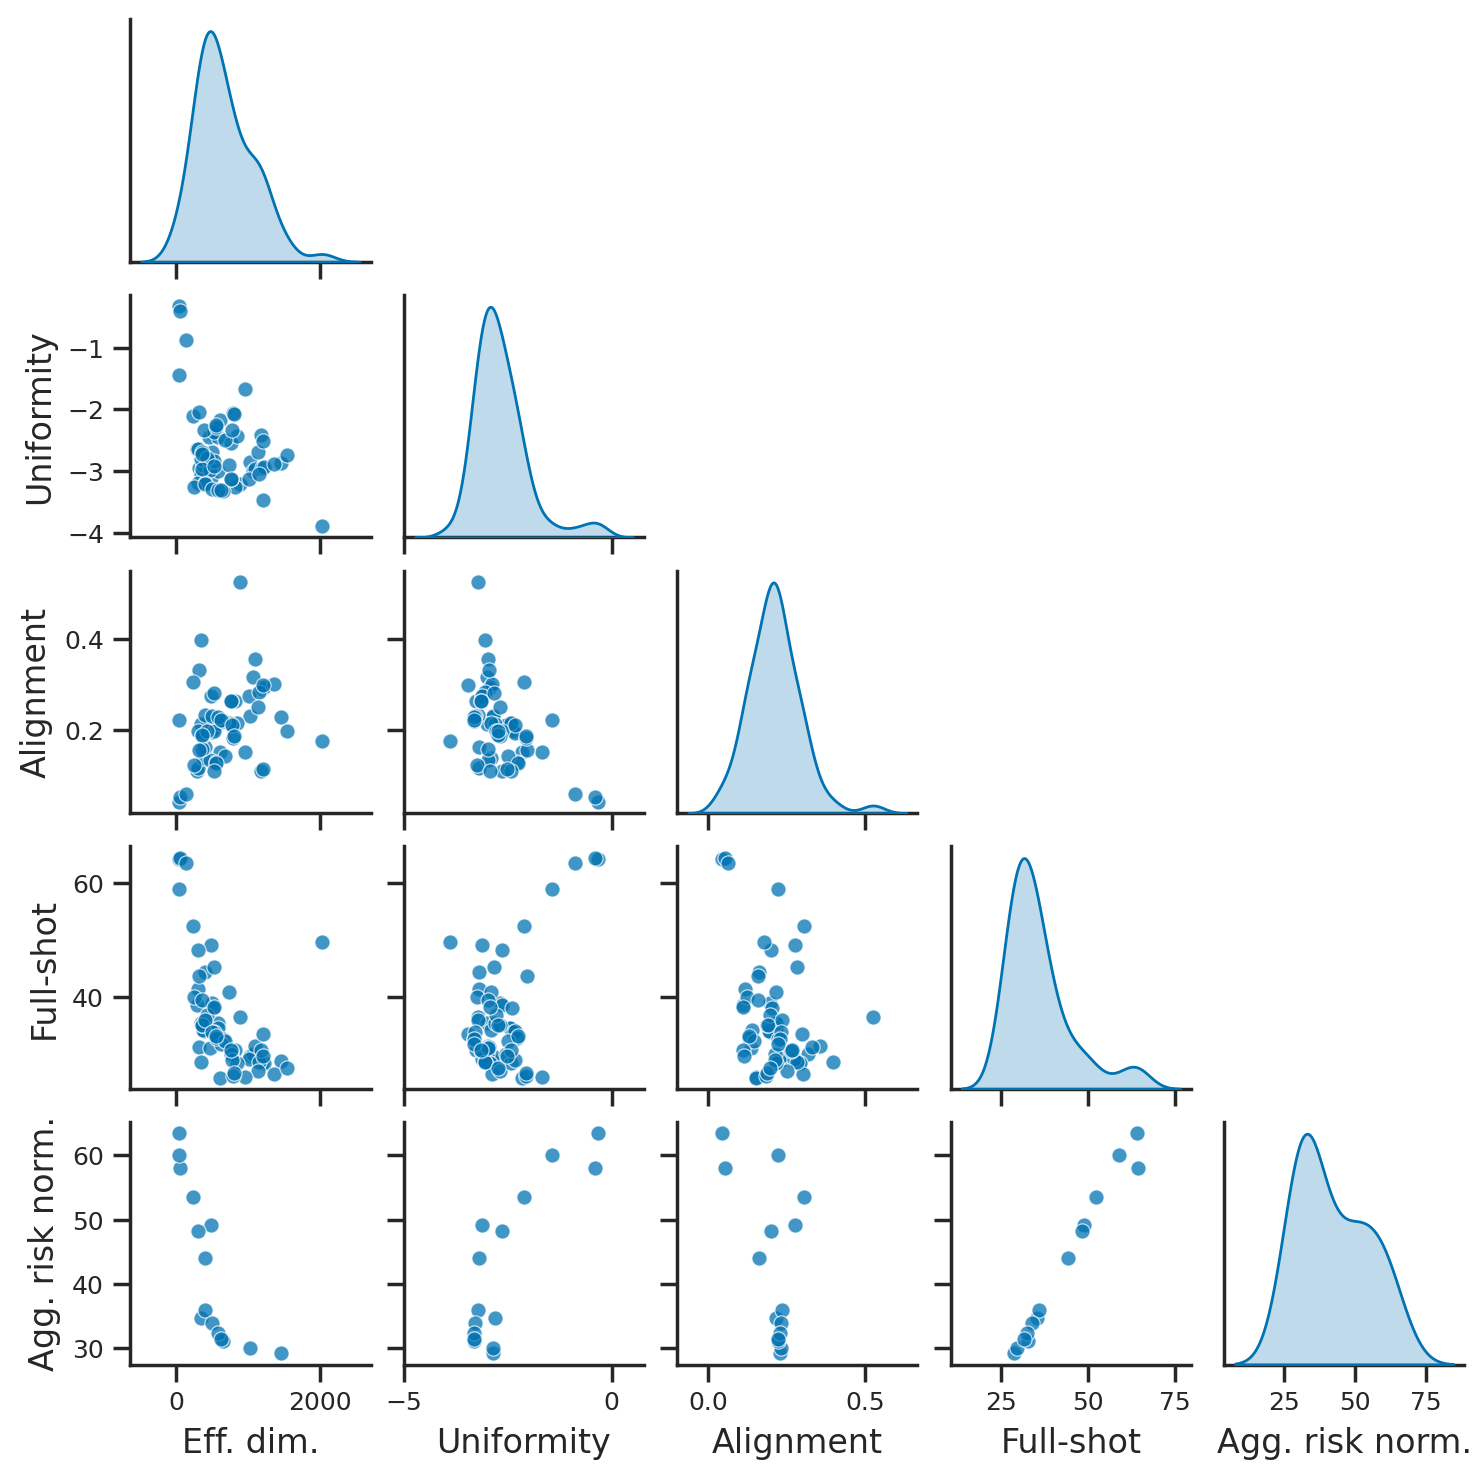

In [59]:
with plot_config(is_use_tex=False, font_scale=1, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 9, "xtick.labelsize": 9}):
    g = sns.pairplot(df2.query("architecture_exact == 'resnet50'").query("trainrealaug_vars < 0.5")[MINI_STATISTICS+["agg_risk","agg_risk_norm"]+["family"]].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             #hue="Family",
             corner=True)
    
    log_columns = [ "Rank"]

    for ax in g.axes.flat:
        if ax is not None :
            if ax.get_xlabel() in log_columns:
                ax.set(xscale="log")
            if ax.get_ylabel() in log_columns:
                ax.set(yscale="log")
            
        
    #sns.move_legend(g, "lower center", bbox_to_anchor=(.65, .65), ncol=1, frameon=True)
    
    plt.savefig("figures/statistics/statistics.pdf", bbox_inches='tight', pad_inches=0.2)

In [60]:
df.architecture = df.architecture.astype(str)
model = smf.ols(formula="train_test ~ np.log(train_rank) + train_uniformity + trainrealaug_alignment ", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# np.log(train_vars) or train_alignment has huge effect

R-squared 0.5809698274567809


<class 'statsmodels.iolib.table.SimpleTable'>

In [61]:
model.summary2().tables[1]["P>|t|"]

Intercept                 1.965978e-23
np.log(train_rank)        4.157007e-11
train_uniformity          7.407224e-01
trainrealaug_alignment    5.937421e-01
Name: P>|t|, dtype: float64

In [62]:
df.architecture = df.architecture.astype(str)
model = smf.ols(formula="train_test ~  train_uniformity + trainrealaug_alignment ", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# np.log(train_vars) or train_alignment has huge effect

R-squared 0.18567964817627802


<class 'statsmodels.iolib.table.SimpleTable'>

Note that surprisingly we have that alignment is not useful to predict performance (although alignment inside an actual class is --- see below). This is very surprising

In [63]:
model = smf.ols(formula="train_test ~ np.log(train_rank) + train_uniformity + trainrealaug_alignment + train_alignment", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# + np.log(trainrealaug_nc1norm) is pretty useful
# + np.log(train_vars) or train_alignment are really useful but that's cheating

R-squared 0.7151869181777976


<class 'statsmodels.iolib.table.SimpleTable'>

In [64]:
model.summary2().tables[1]["P>|t|"]

Intercept                 5.937713e-28
np.log(train_rank)        1.661521e-15
train_uniformity          1.751682e-05
trainrealaug_alignment    6.525668e-01
train_alignment           6.003786e-07
Name: P>|t|, dtype: float64

### Effect of hyperparameters

#### General
Let us train some models that can help us predict which features are important. To do this we will train a xgboost model with a subset of meaningful features and then analyse the SHAP value of each of the parameters.

First, let us try a Xgboost using all parameters.

In [65]:
# resnet can be seen like a model with patch_size = kernel of first conv
# resnet can be seen as having of kernel_size
inp = melted.copy()
inp["finetuning_data"] = inp["finetuning_data"].fillna("Na")
inp.projection2_arch = inp.projection2_arch.fillna(inp.projection1_arch).fillna("Na")
melted_stats["finetuning_data"] = melted_stats["finetuning_data"].fillna("Na")
melted_stats.projection2_arch = melted_stats.projection2_arch.fillna(melted_stats.projection1_arch).fillna("Na")

df_pre = preprocess_features(df)

In [66]:
to_fit = COMPONENTS + ['train-nperclass-3_test']
xgbs = dict()
studys = dict()
Xs = dict() 
ys = dict() 
rmses = dict()

In [67]:
print("RMSE to explain")
df_pre[to_fit].var()**0.5

RMSE to explain


approx                     0.303913
usability                  8.423126
probe_gen                  6.318368
enc_gen                    1.130767
agg_risk                   9.703223
train-nperclass-3_test    17.561773
dtype: float64

Let's train a model with all potential features, this tunes parameters using cross validation

In [68]:
prfx="all"
features_to_keep=['objective','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler", "projection_nparameters_hidden",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other", "n_negatives", "pred_dim","ssl_mode","is_ema","family","architecture_exact","n_parameters",
                 "is_stopgrad", "is_aug_invariant", "is_official", "is_industry", "n_classes", "projection_hid_width", "projection_hid_depth"
                 ] + AUGMENTATIONS

xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  
                                                                         features_to_keep, 
                                                                         prfx=prfx, 
                                                                         is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)

approx: best rmse 30-fold CV 0.0628786847528566
usability: best rmse 30-fold CV 4.479039393135901
probe_gen: best rmse 30-fold CV 2.3504761570011583
enc_gen: best rmse 30-fold CV 0.8864622156796899
agg_risk: best rmse 30-fold CV 3.45924898434805
train-nperclass-3_test: best rmse 30-fold CV 4.353786566131175


In [69]:
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

Variance explained


approx                    95.719378
usability                 71.723663
probe_gen                 86.161089
enc_gen                   38.542595
agg_risk                  87.290407
train-nperclass-3_test    93.853929
dtype: object

We see that we typically explain more than $70\%$ of the variance which is pretty good.
Let's look at the most important parameters

approx
usability
probe_gen
enc_gen
agg_risk
train-nperclass-3_test


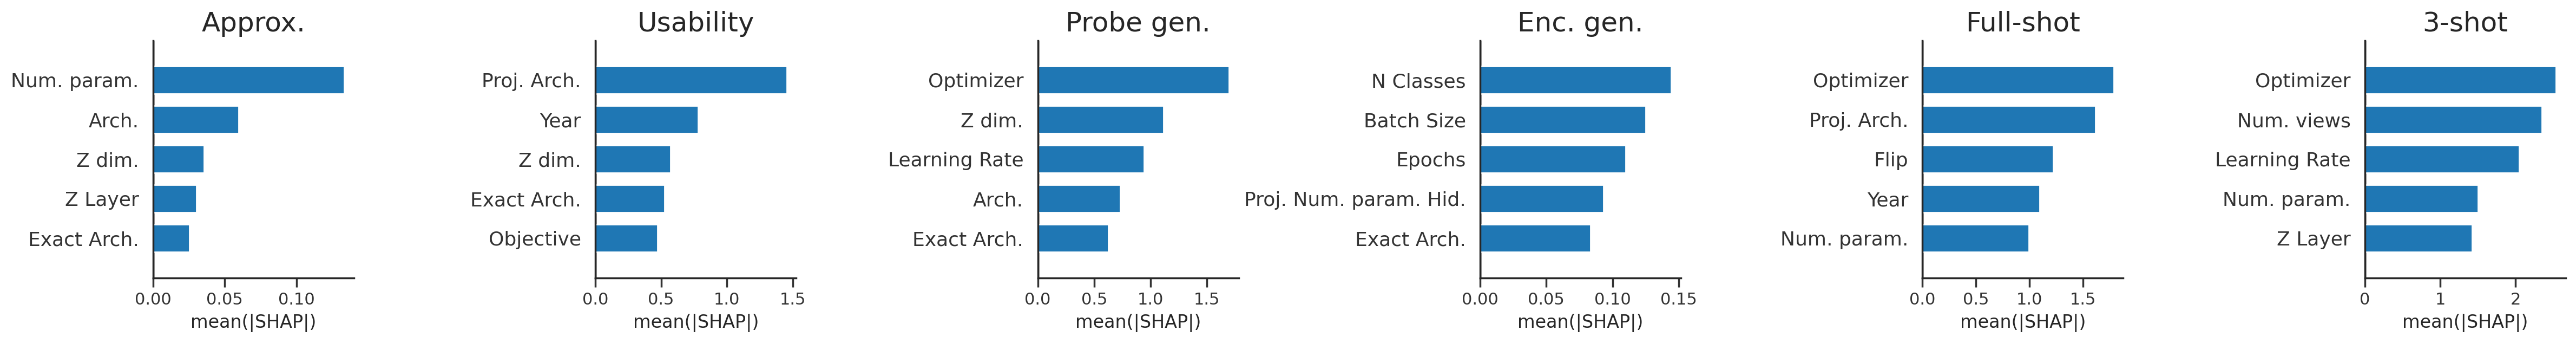

In [70]:
prfx="all"
components = to_fit
with plot_config():
    plt.figure(figsize=(4*len(components), 3.5))
    for i,o in enumerate(components):
        print(o)
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], pretty_renamer=PRETTY_RENAMER, n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])

This might not be as meaningful as it will use for example the year to predict performance (which is not something we can act upon). Let's use a fewer and actionable parameters

In [71]:
variance_explained = dict()

In [72]:
prfx="sel"
features_to_keep= ["objective","architecture",'patch_size',"epochs",'batch_size','pretraining_data',"n_augmentations",
                   "n_negatives","pred_dim", "n_classes",'projection2_arch',"projection_same","z_layer",
                   'finetuning_data', "nviews", 'z_dim', "scheduler", "optimizer", "family", "ssl_mode",
                   "n_parameters", "is_aug_invariant","projection_nparameters_hidden",'projection1_arch',
                    "is_official", "learning_rate", "is_stop_grad"
                  ] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
variance_explained["Pre-filtering"] = 100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100
variance_explained["Pre-filtering"]

approx: best rmse 30-fold CV 0.060022614534021704
usability: best rmse 30-fold CV 4.950305221598318
probe_gen: best rmse 30-fold CV 2.329432633961692
enc_gen: best rmse 30-fold CV 0.8498331943263316
agg_risk: best rmse 30-fold CV 3.722951596680405
train-nperclass-3_test: best rmse 30-fold CV 4.748891752998779

Variance explained


approx                    96.099414
usability                 65.460398
probe_gen                 86.407776
enc_gen                    43.51656
agg_risk                  85.278815
train-nperclass-3_test    92.687804
dtype: object

In [73]:
prfx="min"
features_to_keep= ["objective","architecture",'patch_size',"epochs",'pretraining_data','projection2_arch', 
                  "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "n_augmentations","optimizer",
                   "projection_nparameters_hidden"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
variance_explained["Post-filtering"] = 100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100
variance_explained["Post-filtering"]

approx: best rmse 30-fold CV 0.09807652343614882
usability: best rmse 30-fold CV 4.751866662746119
probe_gen: best rmse 30-fold CV 2.2549996447807734
enc_gen: best rmse 30-fold CV 0.8659516076802516
agg_risk: best rmse 30-fold CV 3.624240090582622
train-nperclass-3_test: best rmse 30-fold CV 4.815690603419632

Variance explained


approx                    89.585698
usability                 68.174014
probe_gen                  87.26253
enc_gen                   41.353648
agg_risk                   86.04911
train-nperclass-3_test    92.480648
dtype: object

we see that we can still perform as well using much fewer params and more meaningfull ones. We can even remove objective and architecture if we keep the coarse "family" and "ssl_mode"

In [74]:
caption = "Percentage of explained test variance for our XGBoost models before and after filtering. Each column corresponds to a different model predicting the given metric."
table_xgboost_eval = pd.DataFrame(variance_explained).T.rename(columns=PRETTY_RENAMER)
print(table_xgboost_eval.style.format(precision=2, na_rep="").to_latex(
                                   hrules=True, 
                                   label="appx:tab:xgboost_eval",
                                    caption=caption,
                                    position="h",
                            position_float="centering"
                            ).replace("lllllll","lrrrrrr"))

\begin{table}[h]
\centering
\caption{Percentage of explained test variance for our XGBoost models before and after filtering. Each column corresponds to a different model predicting the given metric.}
\label{appx:tab:xgboost_eval}
\begin{tabular}{lrrrrrr}
\toprule
 & Approx. & Usability & Probe gen. & Enc. gen. & Full-shot & 3-shot \\
\midrule
Pre-filtering & 96.10 & 65.46 & 86.41 & 43.52 & 85.28 & 92.69 \\
Post-filtering & 89.59 & 68.17 & 87.26 & 41.35 & 86.05 & 92.48 \\
\bottomrule
\end{tabular}
\end{table}



In [75]:
xgbs.keys()

dict_keys(['all', 'sel', 'min'])

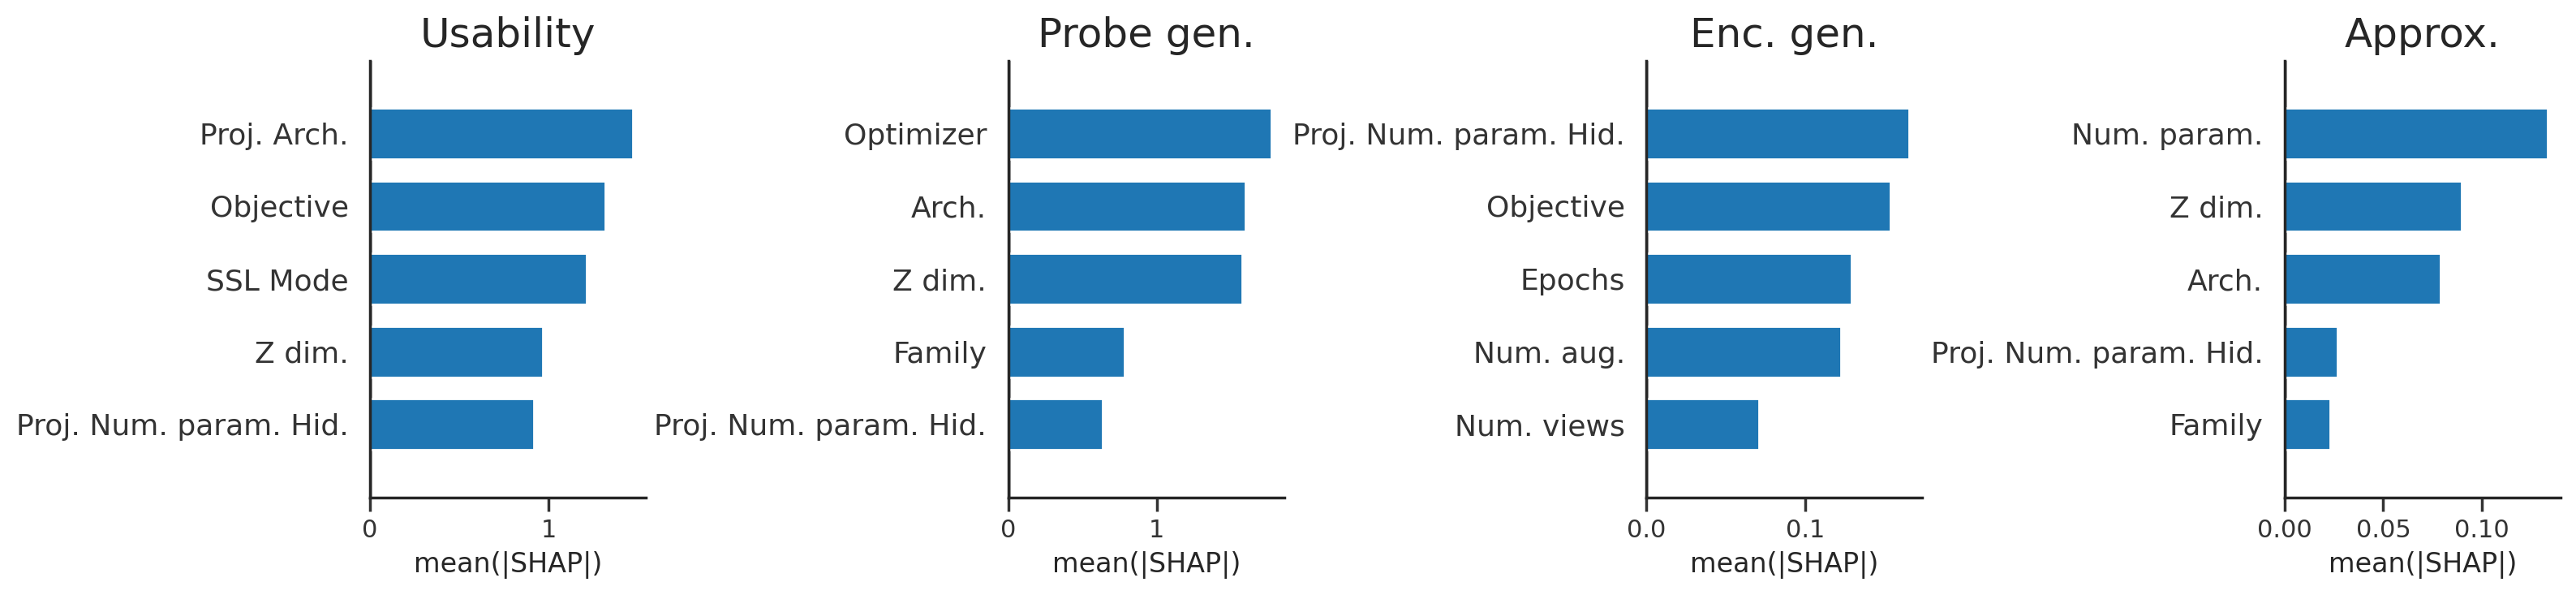

In [76]:
prfx="min"
components = ["usability","probe_gen","enc_gen","approx"]
with plot_config():
    plt.figure(figsize=(4*len(components), 4))
    for i,o in enumerate(components):
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], 
                                  pretty_renamer=PRETTY_RENAMER, 
                                  n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])
plt.show()
save_fig(ax, f"figures/all_hparams/param_importance_min.pdf")

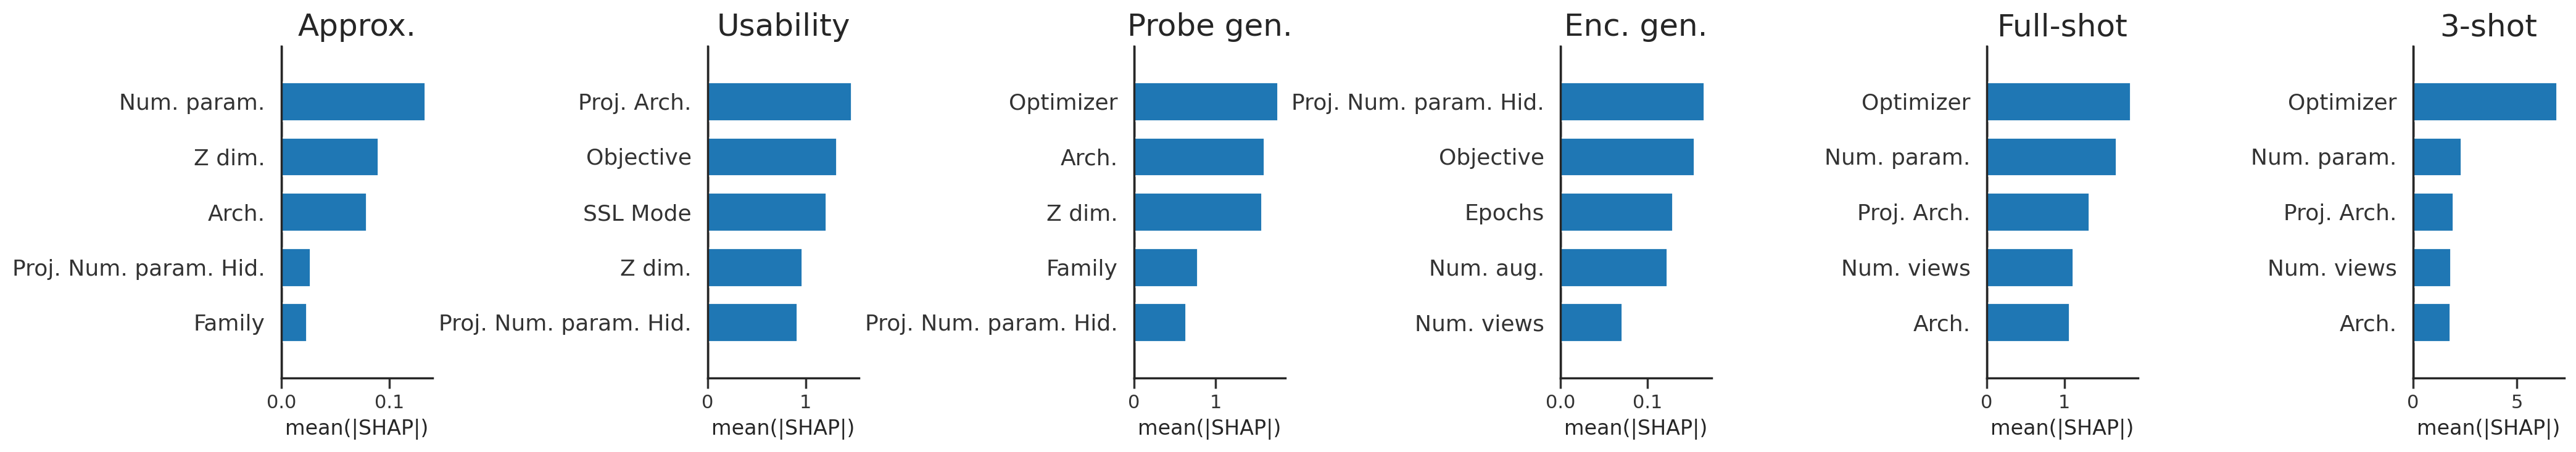

In [77]:
prfx="min"
components = to_fit
with plot_config():
    plt.figure(figsize=(3.5*len(components), 4))
    for i,o in enumerate(components):
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], 
                                  pretty_renamer=PRETTY_RENAMER, n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])


This gives us a pretty good idea of what parameters are important for each component, and many of those are pretty intuitive. 

**Approximation error:** we see everything that has to do with the architecture (arch, zdim, patch_size, parameters) as we'd expect

**Usability** we see the Z_dim, objective, and projection as suggested by ISSL. Num parameters is not clear

**Probe gen.**: we see the zdim (by tradeoff), optimization hparam, and the architecture

**Eng gen.**: we see the objective, projection, optimization, augmentation. 

**Agg risk**: projection, architecture, objective

In the main paper we want to mostly focus on usability and probe gen, and will thus analyze: **Z_dim, arch, ssl_mode, projection,optimizer, epochs, n_augmentations, nviews**


One issue with the model above is that the objective and architecture gives a lot of information about the exact model and will be harder to analyze. It is thus useful to train another model with the coarser parameters SSL_MODE (contrastive / generative/ ...) and FAMILY (resnet / VIT...)

In [78]:
prfx="nano"
features_to_keep= ['patch_size',"epochs",'pretraining_data','projection2_arch', 
                 'finetuning_data', "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "optimizer","projection_nparameters_hidden",
                   "n_augmentations"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

approx: best rmse 30-fold CV 0.11160216877281487
usability: best rmse 30-fold CV 4.627325283399257
probe_gen: best rmse 30-fold CV 2.341362571456969
enc_gen: best rmse 30-fold CV 0.8871557826429707
agg_risk: best rmse 30-fold CV 3.565223495060627
train-nperclass-3_test: best rmse 30-fold CV 5.208923071549484

Variance explained


approx                    86.515175
usability                 69.820403
probe_gen                 86.268197
enc_gen                   38.446389
agg_risk                  86.499759
train-nperclass-3_test    91.202502
dtype: object

Now that we have a good idea of what is the most important, let's analyze each of them in more detail.

In [79]:
components_to_plot=['usability', 'probe_gen']
metrics_to_plot=to_fit[-2:]

In [80]:
import copy
df_shaps = {}
df_shap = {}
df_shaps_tofit = {}
df_shap_tofit={}
df_shap_metrics={}
df_shaps_metrics={}
shap_values = {}
curr_df = convert_type_cols(df, is_use_bool=True)
                
for x in ["min","all","nano","sel"]:
    df_shaps[x] = dict()
    shap_values[x] = dict()
    df_shaps_tofit[x] = dict()
    df_shaps_metrics[x] = dict()
    
    for o in to_fit:
        df_shaps_tofit[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_tofit[x][o]["component"] = o
        
    for o in metrics_to_plot:
        df_shaps_metrics[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_metrics[x][o]["component"] = o
        
    for o in components_to_plot:

        df_shaps[x][o], shap_values[x][o] = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                                        normalize_by=df[o].mean(), 
                                                        df=curr_df.dropna(subset=[o]))
        df_shaps[x][o]["component"] = o
        
    
    
    df_shap[x] = pd.concat(df_shaps[x])
    df_shap_tofit[x] = pd.concat(df_shaps_tofit[x])
    df_shap_metrics[x] = pd.concat(df_shaps_metrics[x])

In [81]:
all_hparam_plots = dict()

#### Dimensionality

(<seaborn.axisgrid.FacetGrid at 0x7f8d1135a200>, {})

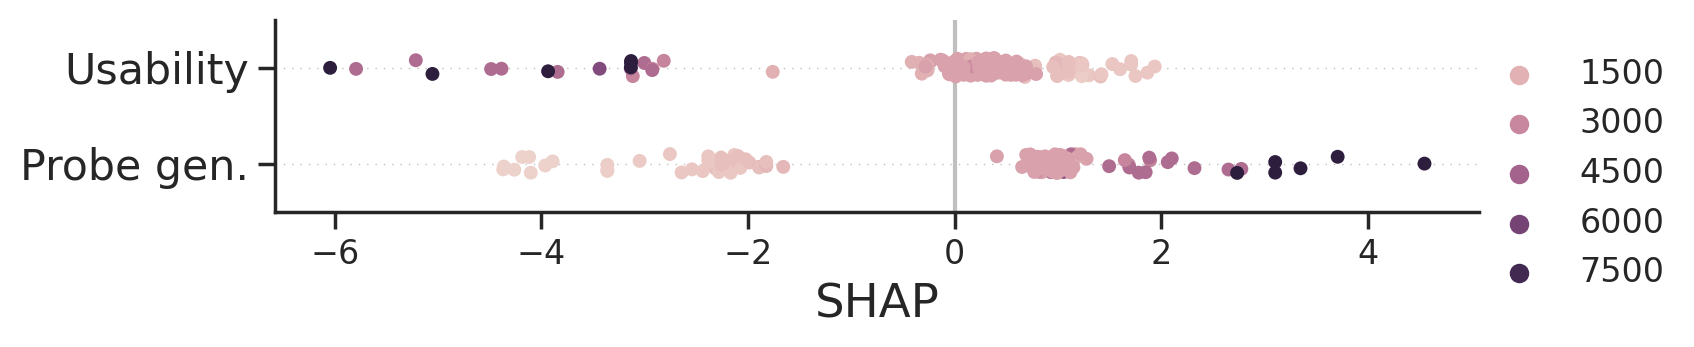

In [82]:
plot_shap_components("z_dim", df_shap["min"])

We have just seen that dimenionslity is key for both the usability and the probe gen. Let's investiagte this more carefully. The dimensionality itself cannot have any impact it must be the effective dimensionality 

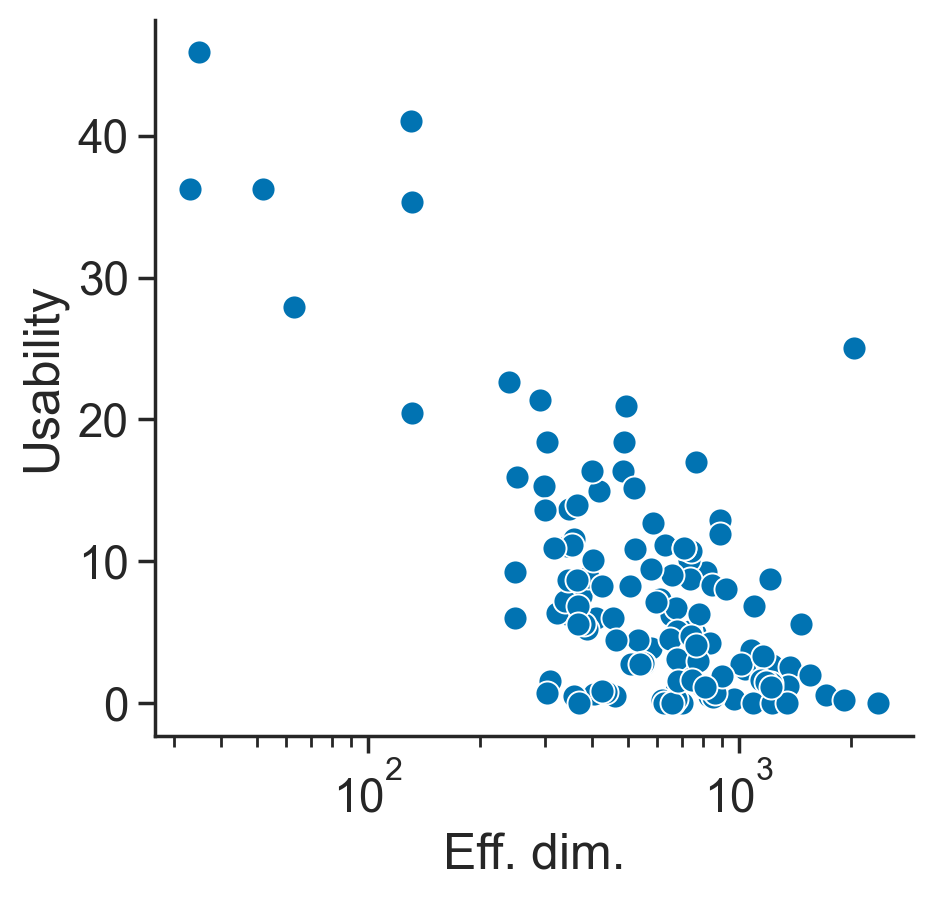

<Figure size 640x480 with 0 Axes>

In [83]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted.query("component == 'usability'")), 
                  x=PRETTY_RENAMER["train_rank"],
                  y="Value", 
                  s=75,
                  col="Component", 
                  facet_kws={'sharey': False})
    g.set_titles('')
    g.set(xscale="log", ylabel="Usability")
    #g.set(yscale="log")
    plt.show()
save_fig(g, f"figures/dimensionality/dim_effective.pdf")

In [84]:
treatment = "train_rank" 
g,to_condition = causal_graph("z_dim")
ols_summary(inp, treatment, objectives=components_to_plot, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.        t         P>|t|    [0.025  \
np.log(train_rank) -6.418511  1.104714 -5.81011  6.275222e-08 -8.608019   

                      0.975]  
np.log(train_rank) -4.229004


probe_gen
rmse: nan, delta: 0


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(train_rank)  2.363763  0.756784  3.12343  0.002249  0.865124  3.862402

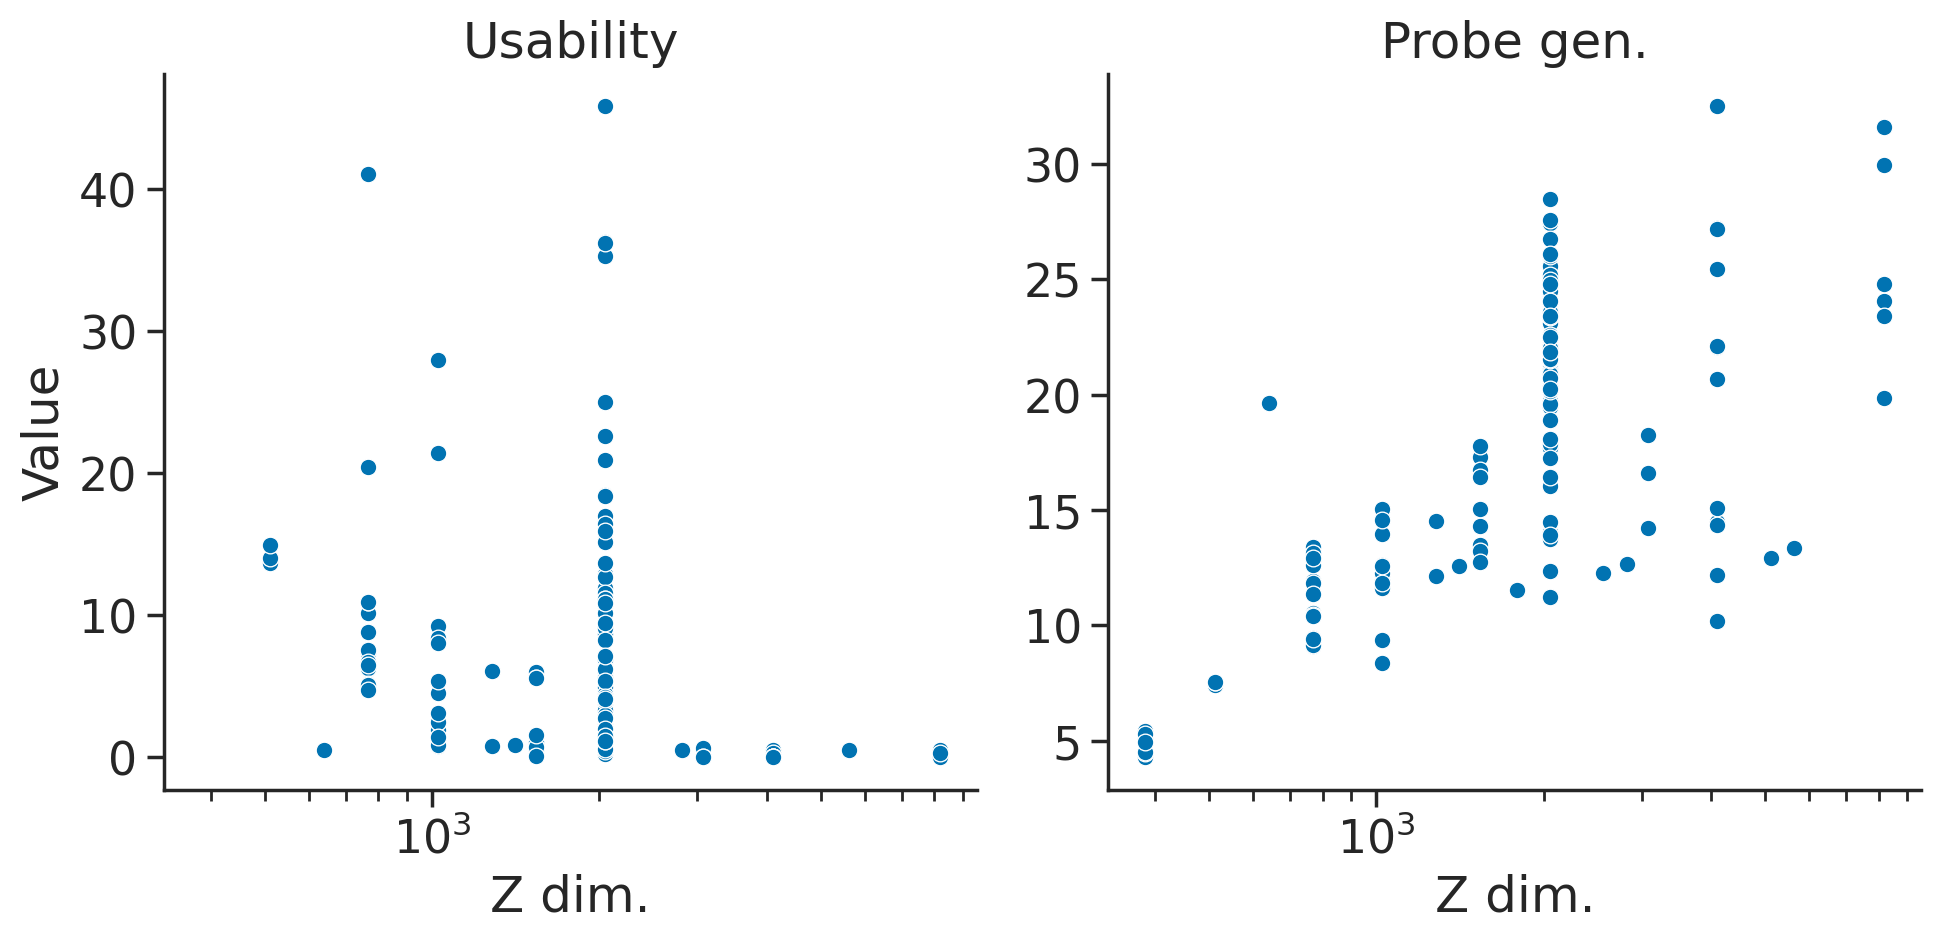

In [85]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted.query("component.isin(@components_to_plot)")), 
                  x=PRETTY_RENAMER["z_dim"],
                  y="Value", 
                  col="Component", 
                  facet_kws={'sharey': False})
    g.set_titles('{col_name}')
    g.set(xscale="log")
    #g.set(yscale="log")

In [86]:
treatment = "z_dim" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(z_dim) -4.037646  1.155544 -3.494152  0.000665 -6.325349 -1.749942


probe_gen
rmse: 2.4392378297844055, delta: 0


Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
np.log(z_dim)  3.444064  0.531779  6.476491  1.387086e-09  2.392962  4.495166

Let's now try to use only the z_dim

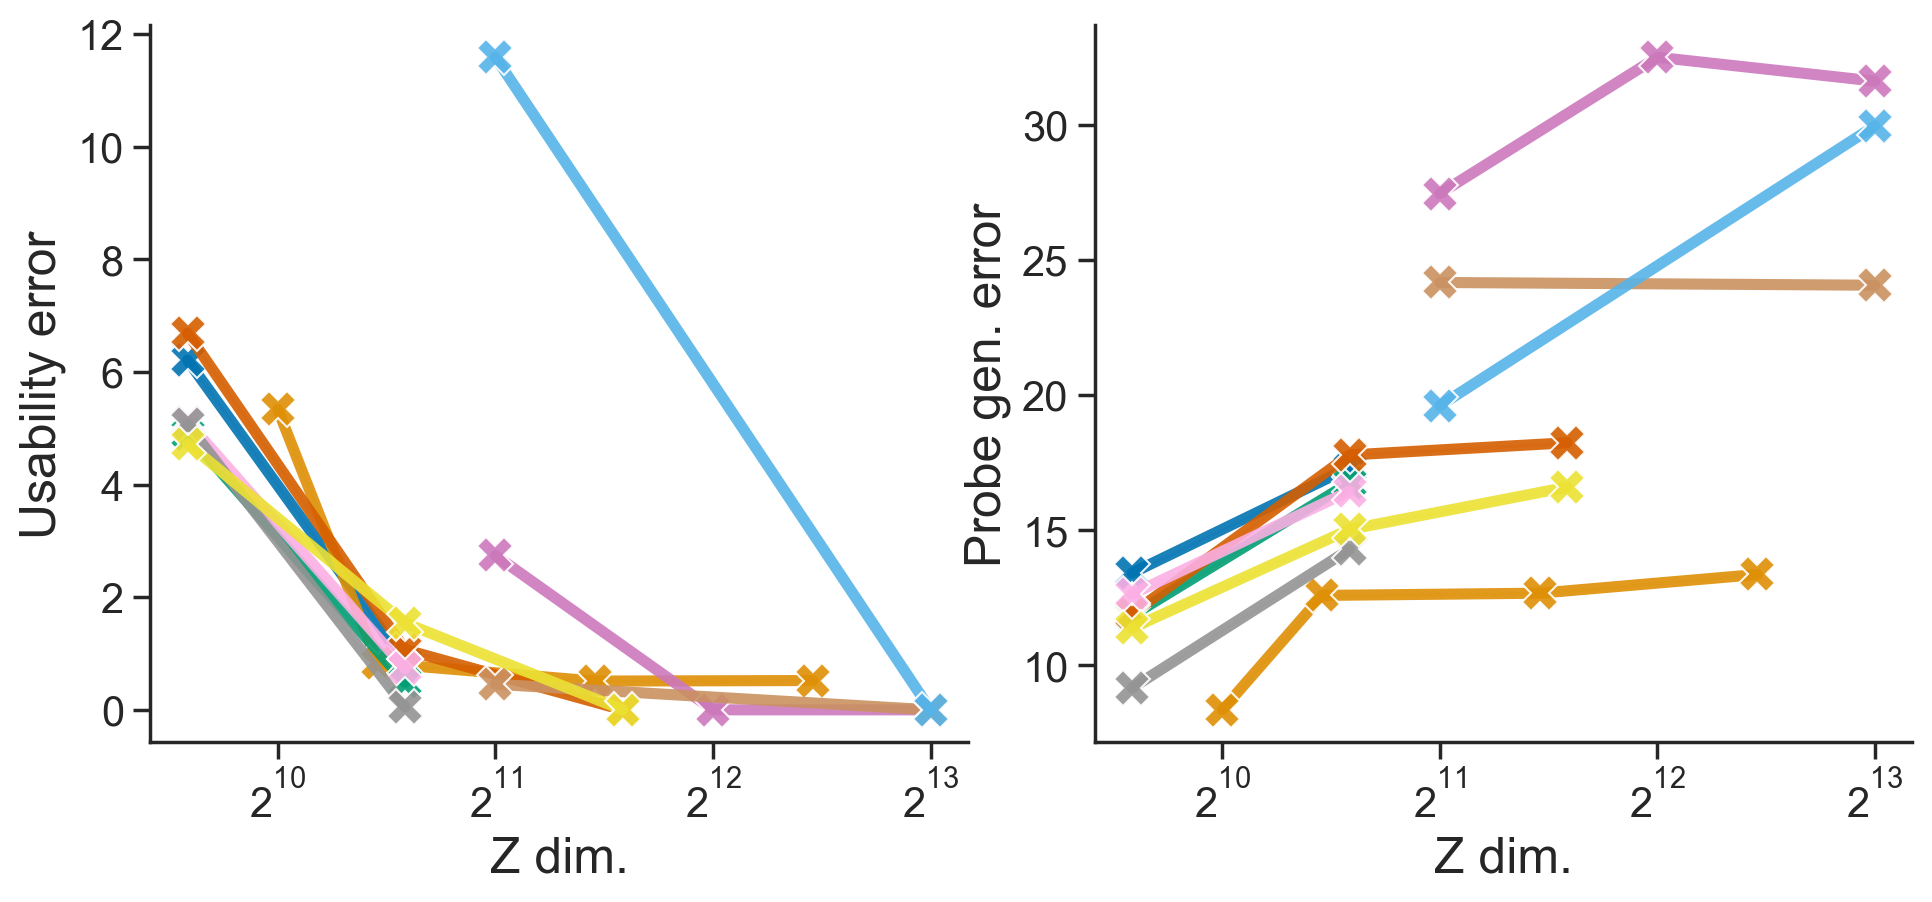

<Figure size 640x480 with 0 Axes>

In [87]:
df_zlayer = get_only_vary(df.dropna(subset=["usability"]), ["z_dim","z_layer"], core_params, drop_cols=["pretraining_data"])
melted_zlayer = melt(df_zlayer, components=to_fit)
#df_zlayer = df_zlayer[df_zlayer.family == "vit"]

with plot_config(rc={"xtick.labelsize": 15,"ytick.labelsize": 15},):
    g = sns.relplot(data=prettify_df(melted_zlayer.query("component.isin(@components_to_plot)")), 
                    x=PRETTY_RENAMER["z_dim"], y="Value", hue="Non Vary", col="Component", 
                    kind="line", marker="X", markersize=13, linewidth=4, alpha=0.9,#aspect=1.3,
                    facet_kws={'sharey': False}, legend=False, )
    #plt.setp(g._legend.get_texts(), fontsize=12)

    g.set_titles("")
    
    plt.xscale('log', base=2)
    
    axes = g.axes.flatten()
    axes[0].set_ylabel("Usability error")
    axes[1].set_ylabel("Probe gen. error")
    
    
    #g.set_xticklabels(rotation=30)
    plt.show()
    save_fig(g, f"figures/dimensionality/dim_controlled.pdf")

In [88]:
ols_summary(melted_zlayer, "z_dim", condition=['non_vary', 'np.log({treatment})'], 
            f_outcome="", objectives=COMPONENTS, is_short=True)

usability
rmse: 1.4558179320280735, delta: 0


Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
np.log(z_dim) -3.877821  0.485048 -7.994722  3.981977e-09 -4.865831 -2.889812


probe_gen
rmse: 1.378556209651058, delta: 0


Coef.  Std.Err.         t         P>|t|    [0.025   0.975]
np.log(z_dim)  3.821554  0.459306  8.320285  1.661130e-09  2.885979  4.75713

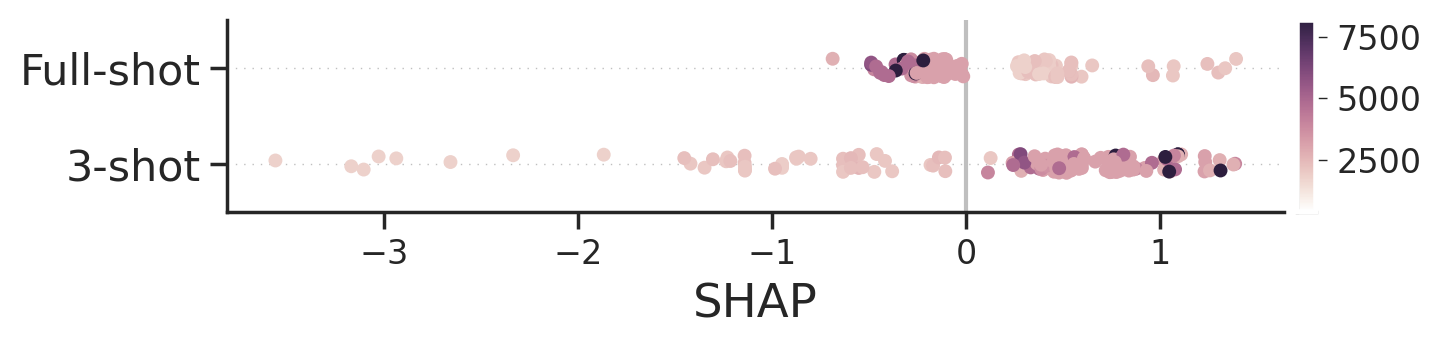

In [89]:
g, other=plot_shap_components("z_dim", df_shap_metrics["min"], is_colorbar=True)
plt.show()
save_fig(g, f"figures/dimensionality/dim_setting.pdf")

We saw that z dim has a juge impact on usability, probe ge, and performance in high and few shot. We thus expect 

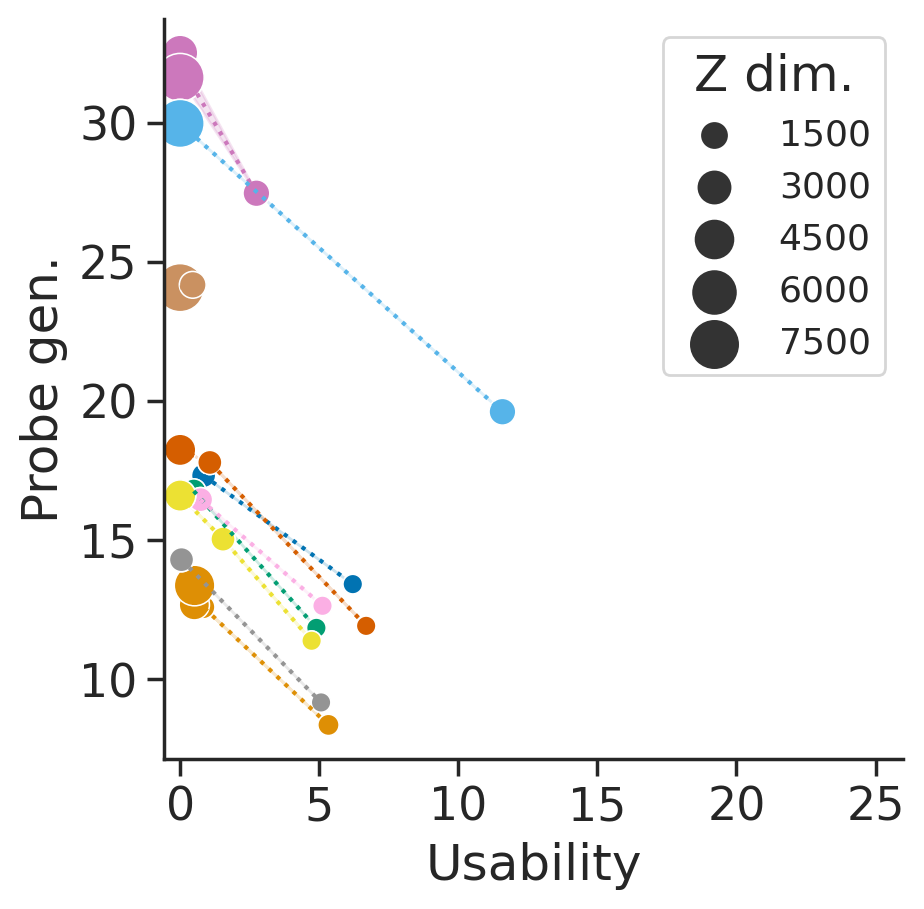

In [90]:
curr_df = df.copy()
curr_df["name"] = [n.split("_extract")[0].split("_last")[0] for n in curr_df.index]

df_zlayer = get_only_vary(curr_df.dropna(subset=["usability","probe_gen"]), 
                          ["z_dim","z_layer","name"], core_params+["name"])

with plot_config(rc={"legend.fontsize": 13}):

    g=sns.lineplot(data=prettify_df(df_zlayer), 
                      x=PRETTY_RENAMER["usability"], 
                      y=PRETTY_RENAMER["probe_gen"], 
                      legend=False,
                      linestyle=':',
                      hue=PRETTY_RENAMER["non_vary"],
                 )
    g=sns.scatterplot(data=prettify_df(df_zlayer), 
                      x=PRETTY_RENAMER["usability"], 
                      y=PRETTY_RENAMER["probe_gen"],  
                      size=PRETTY_RENAMER["z_dim"],
                      legend=True,
                      hue=PRETTY_RENAMER["non_vary"],
                      #style=PRETTY_RENAMER["family"],
                      #hue_norm=SymLogNorm(linthresh=1,base=2),
                      sizes=(50, 300)
                 )
    
    h,l = g.get_legend_handles_labels()
    
    plt.axis('square')
    title = 'Z dim.'
    plt.legend(h[l.index(title)+1:],l[l.index(title)+1:], fancybox=True, title=title)#,ncol=3, loc='upper center', 

plt.savefig("figures/dimensionality/tradeoff_dim_component.pdf", bbox_inches='tight', pad_inches=0.1)



We see that usability is more highly correlated with full perfomance and clearly related to z_dim. While probe gen becomes more highly correlated with 3 shot performacne and also clearly related to z dim

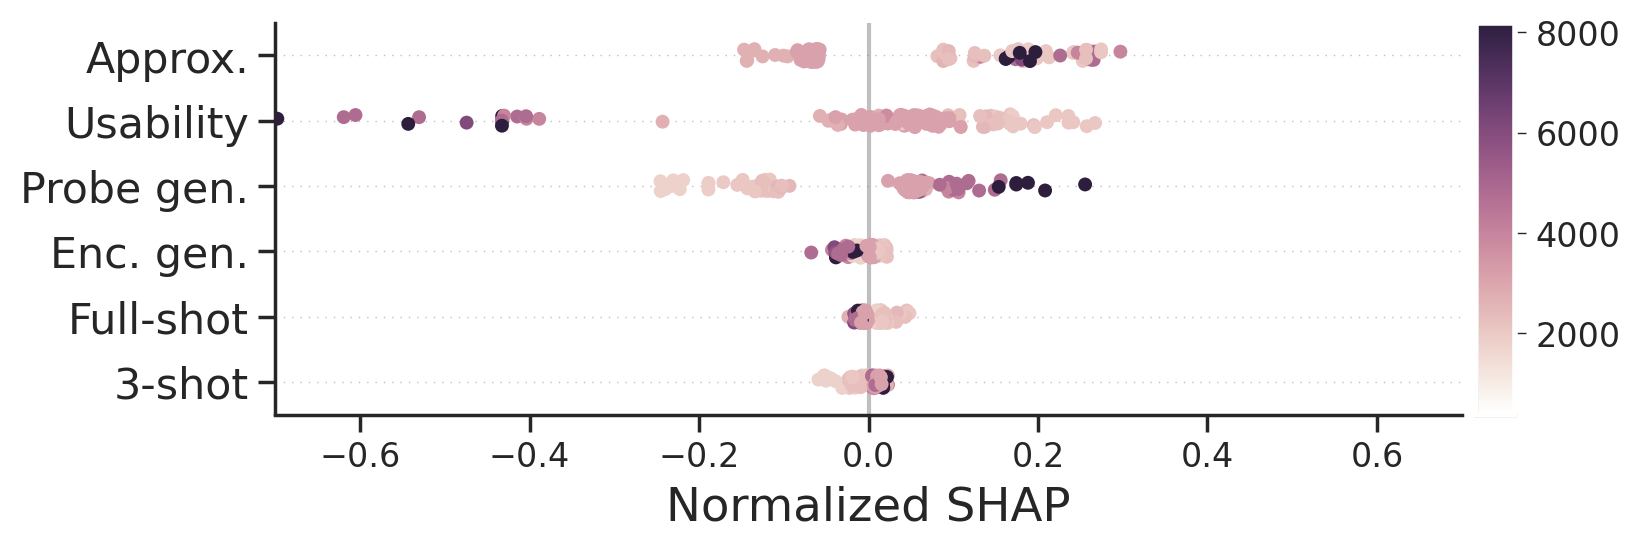

In [91]:
col = "z_dim"
g ,other= plot_shap_components(col, df_shap_tofit["min"],aspect=3, height=3, is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

### Augmentations
#### Standard data augmentations

**Important**: need to make sure that you are removing the confounder "year", so check both `min` and `all`

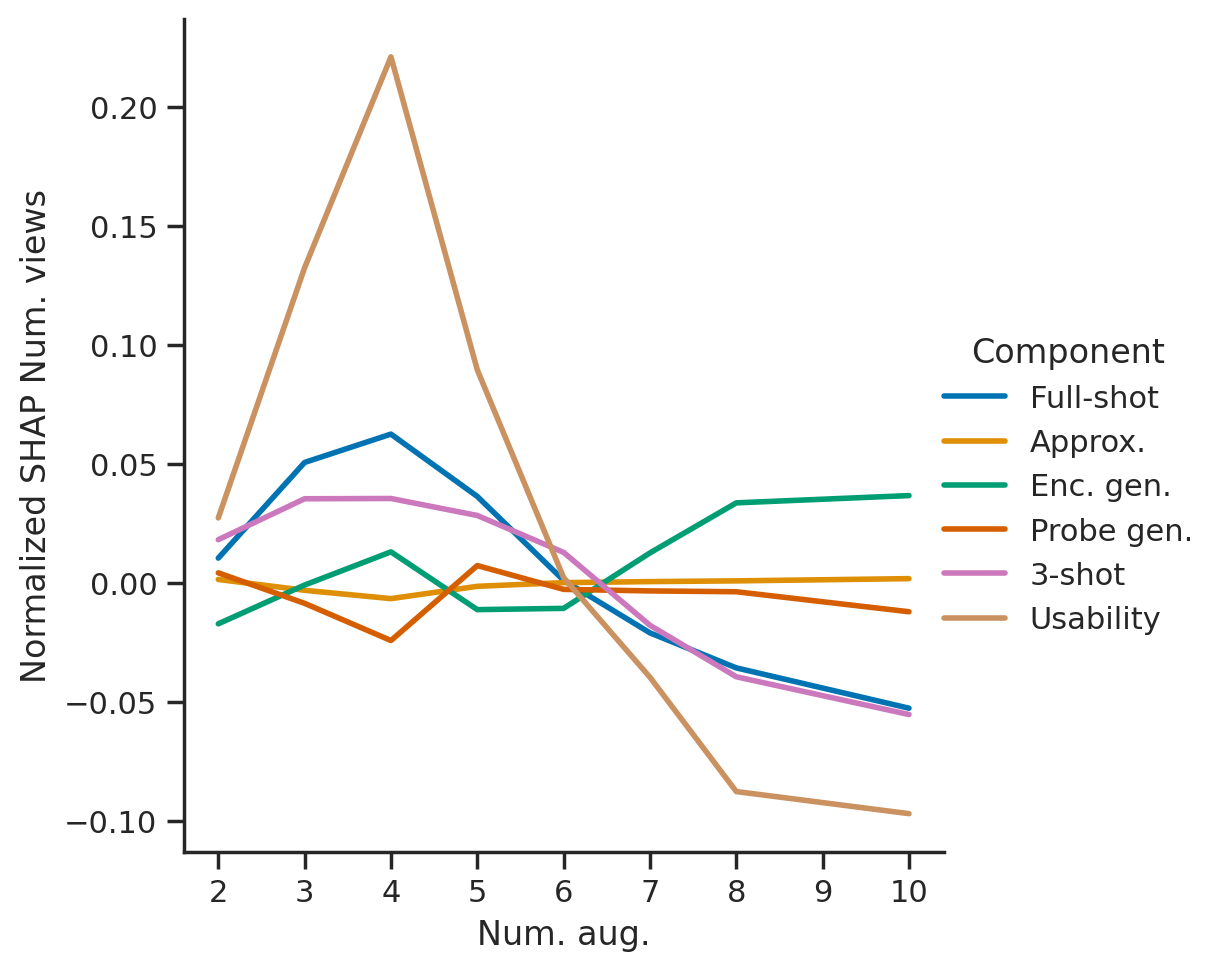

In [92]:
curr_df = df_shap_tofit["min"].groupby(["n_augmentations","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["n_augmentations"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

Looking at the plot above we see that usability changes a lot with the number fo augmentations. To make sure it doesn't depend on the number of years, let's check the SHAP values including years

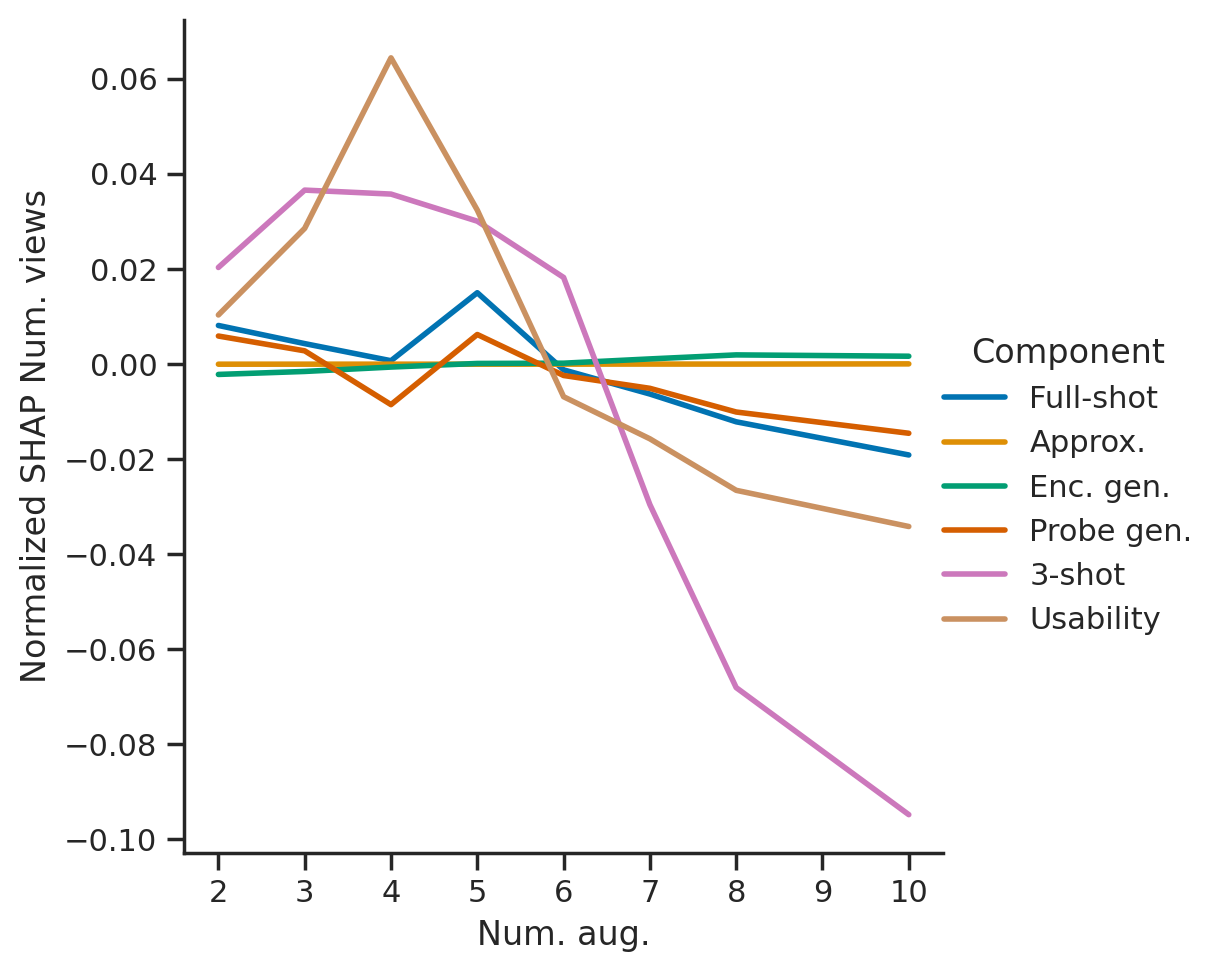

In [93]:
curr_df = df_shap_tofit["all"].groupby(["n_augmentations","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["n_augmentations"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

Still we see a significant impact on usability, but probe gen now also seems to matter

(<seaborn.axisgrid.FacetGrid at 0x7f8d27af64d0>,
 {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f8d10880d30>})

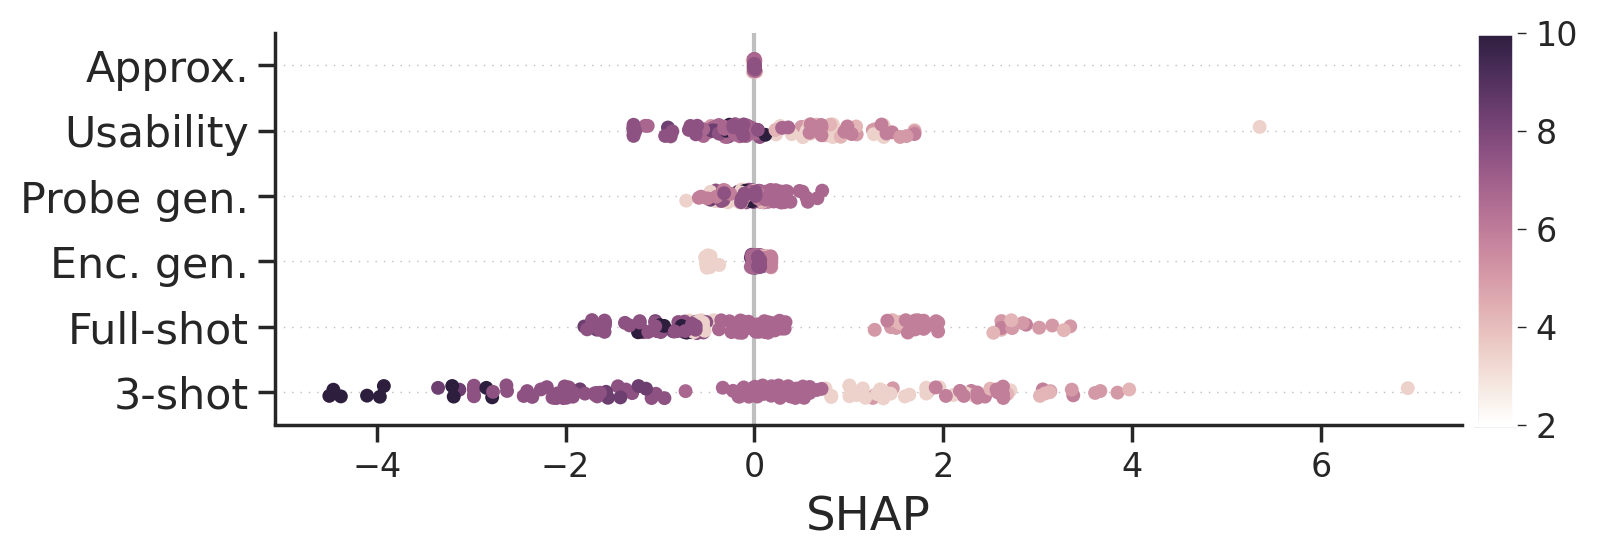

In [94]:
plot_shap_components("n_augmentations", df_shap_tofit["min"], aspect=3, height=3, is_colorbar=True)


In [95]:


treatment = "n_augmentations" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=to_fit, condition=to_condition+["np.log({treatment})"], is_short=True, alpha=0.1)


usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
np.log(n_augmentations) -5.275526  2.570633 -2.052228  0.042305 -10.364772   

                           0.975]  
np.log(n_augmentations) -0.186279


agg_risk
rmse: 3.3167934195188327, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_augmentations) -6.208773  2.006915 -3.093691  0.002375 -10.17559   

                           0.975]  
np.log(n_augmentations) -2.241955


train-nperclass-3_test
rmse: 4.987508124610812, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
np.log(n_augmentations) -11.611734  3.017825 -3.847716  0.000179 -17.576692   

                           0.975]  
np.log(n_augmentations) -5.646775

ATTENTION: if you plot stack line plot you will see very monotonic trends but that's because the publication year is a confounder

 Now let's look at the improvement from each augmentation separately. This takes into account all the different models


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


[Text(1, 0.25, 'False'), Text(1, 0.75, 'True')]

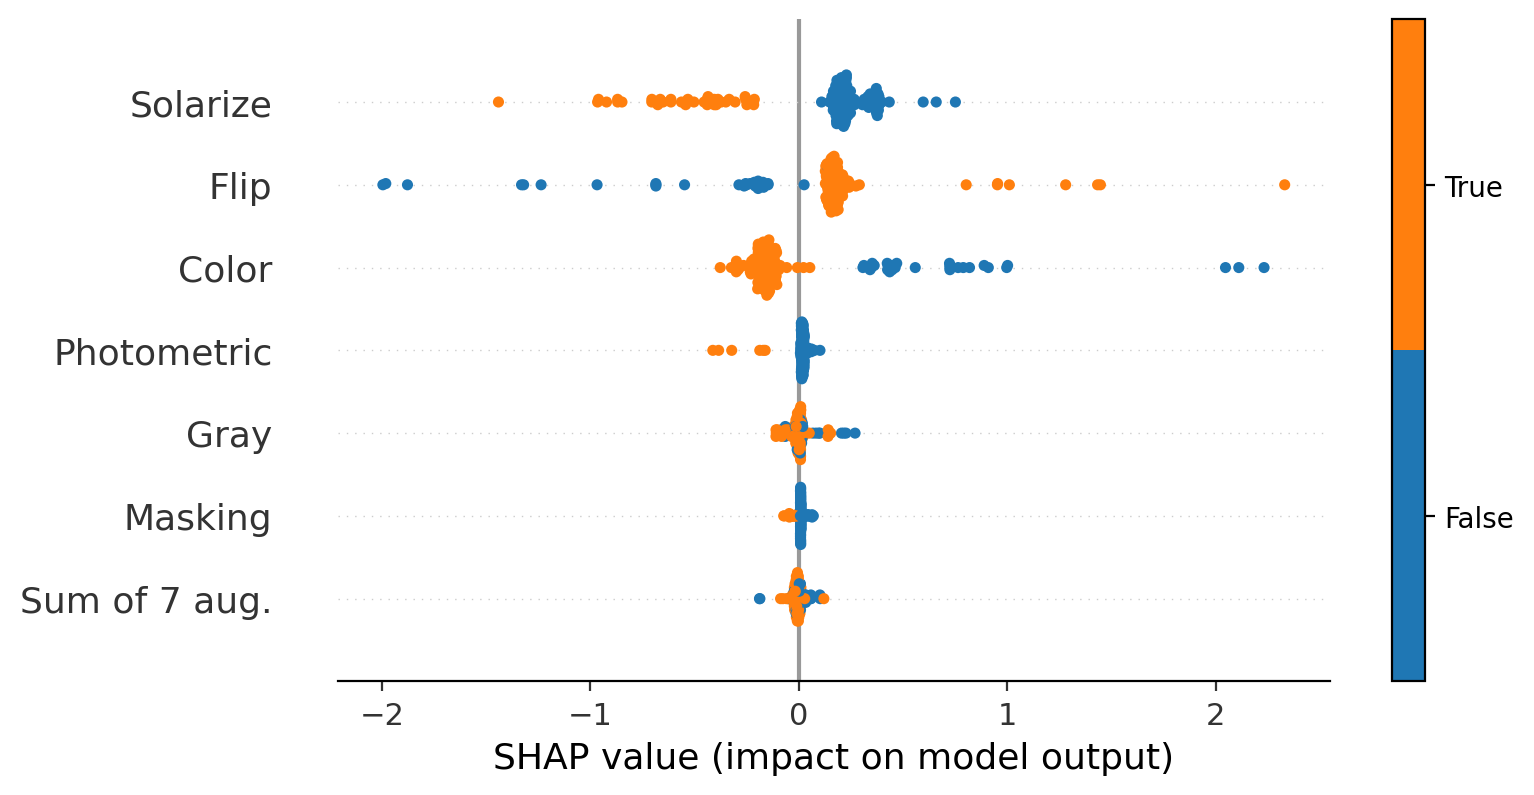

In [96]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(["tab:blue", "tab:orange"])
shap.plots.beeswarm(shap_values["all"]["usability"][:,[PRETTY_RENAMER[c] for c in AUGMENTATIONS if c not in ["is_aug_anygeometric","is_aug_anycolor"]]], 
                    color_bar=False, max_display=7, show=False, color=cmap)
ax=plt.gca()
ax.set_yticklabels([t.get_text().replace("other features","aug.") for i,t in enumerate(ax.get_yticklabels()) ])
cbar=plt.colorbar(ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['False','True'])  # horizontal colorbar

Flipping seems to be an outlier.

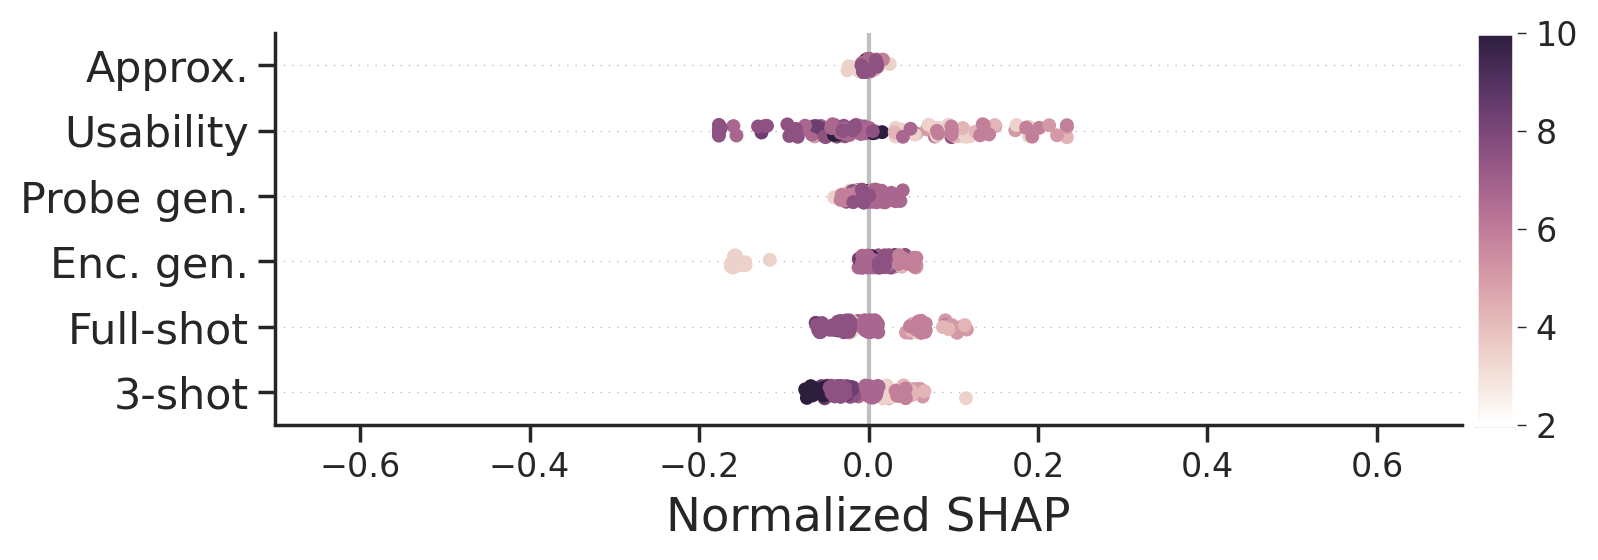

In [97]:

col = "n_augmentations"
g, other= plot_shap_components(col, df_shap_tofit["min"], is_normalize=True, aspect=3, height=3, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")


#### Number of views

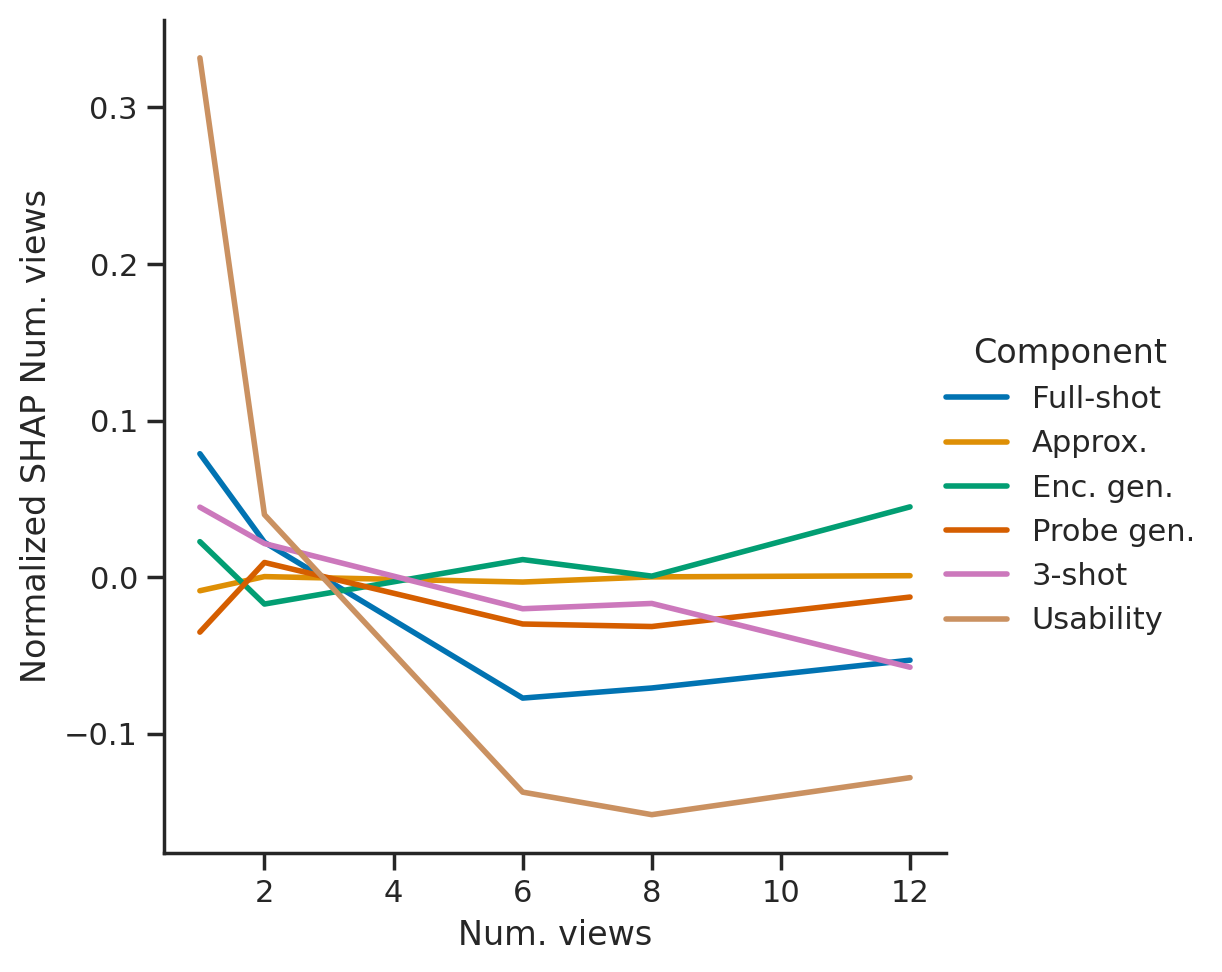

In [98]:
curr_df = df_shap_tofit["min"].groupby(["nviews","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["nviews"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

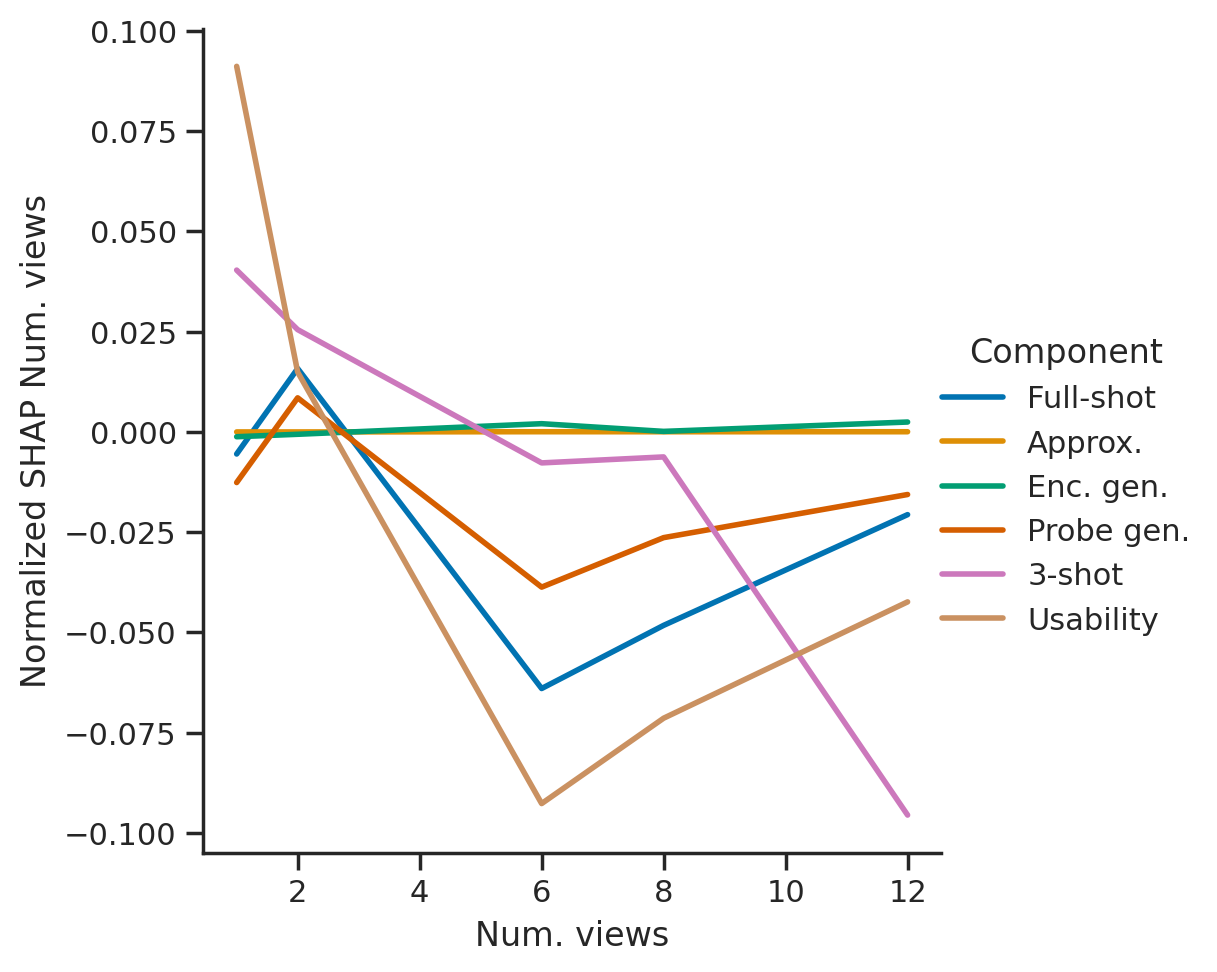

In [99]:
curr_df = df_shap_tofit["all"].groupby(["nviews","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["nviews"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

We see a huge impact on usability but it decreases when conditioning on the year. This shows that the year is a confounder and we should be careful as to how we interpret usability without considering the year. 

In [100]:
#plot_shap_components("nviews", df_shap_tofit["min"], aspect=3, height=3, is_colorbar=True)

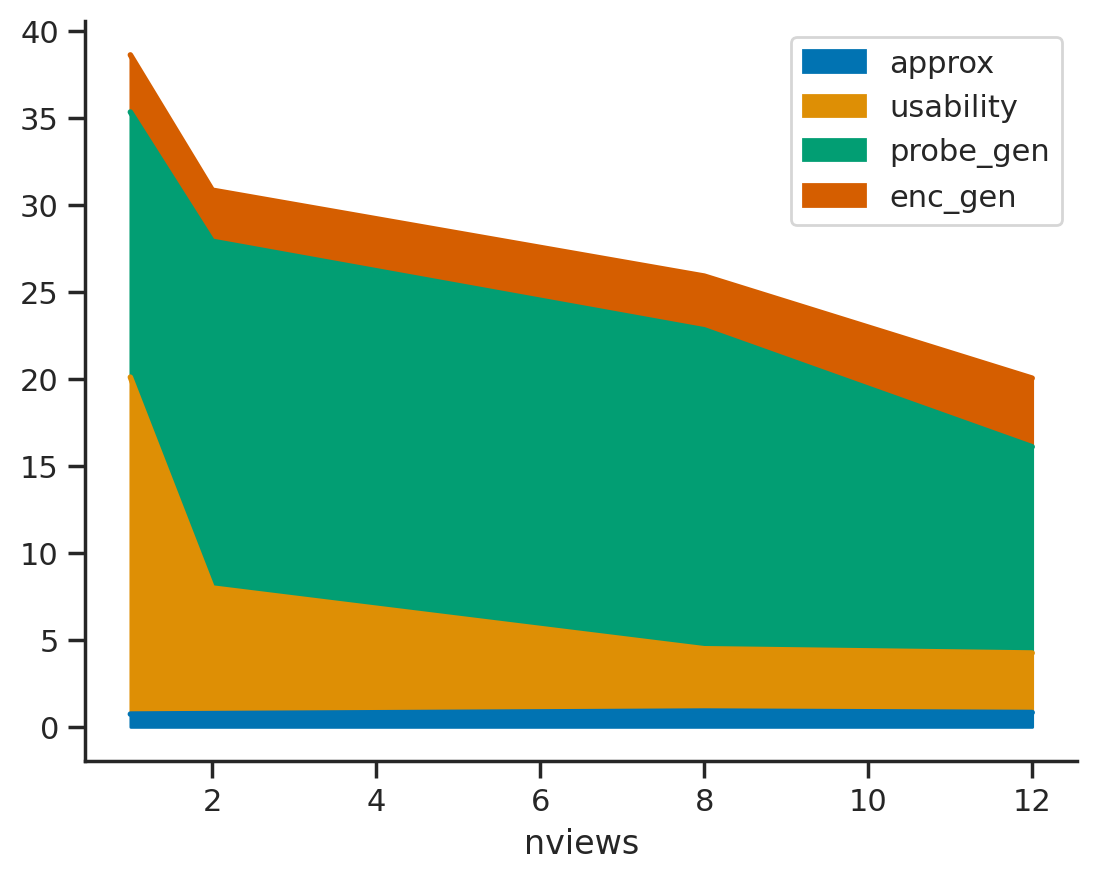

In [101]:
min_counts = 5
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["nviews"]])
    counts = curr_df["nviews"].value_counts()
    select = curr_df["nviews"].isin(counts[counts >= min_counts].index)
    ax=curr_df[select].groupby("nviews").mean().plot.area()
    
    

This is a nice plot looks a lot like the one where x axis is year. So probably due to the confounder, let's thus check a model that removes that confounder

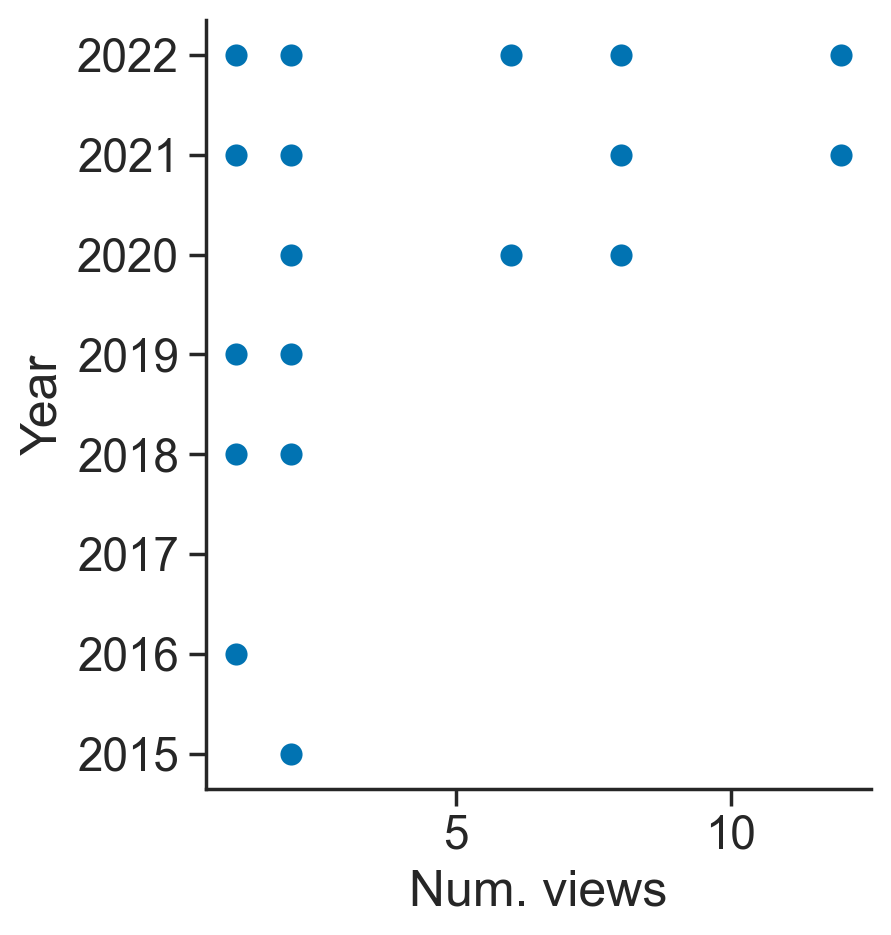

<Figure size 640x480 with 0 Axes>

In [102]:
with plot_config():
    g=sns.relplot(data=prettify_df(df), 
                  x=PRETTY_RENAMER["nviews"],
                  y=PRETTY_RENAMER["year"], 
                  s=75,
                  facet_kws={'sharey': False})
    #g.set(yscale="log")
    plt.show()

In [103]:
treatment = "nviews" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=to_fit, condition=to_condition+["np.log({treatment})"], is_short=True)


probe_gen
rmse: 2.4392378297844064, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025   0.975]
np.log(nviews) -1.340272  0.633132 -2.116893  0.035988 -2.591704 -0.08884


agg_risk
rmse: 3.3176757722098627, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(nviews) -2.001411   0.86114 -2.324141  0.021517 -3.703519 -0.299303

We see that th effect is not as big as one could think looking at the plot => likely due to the confounding years

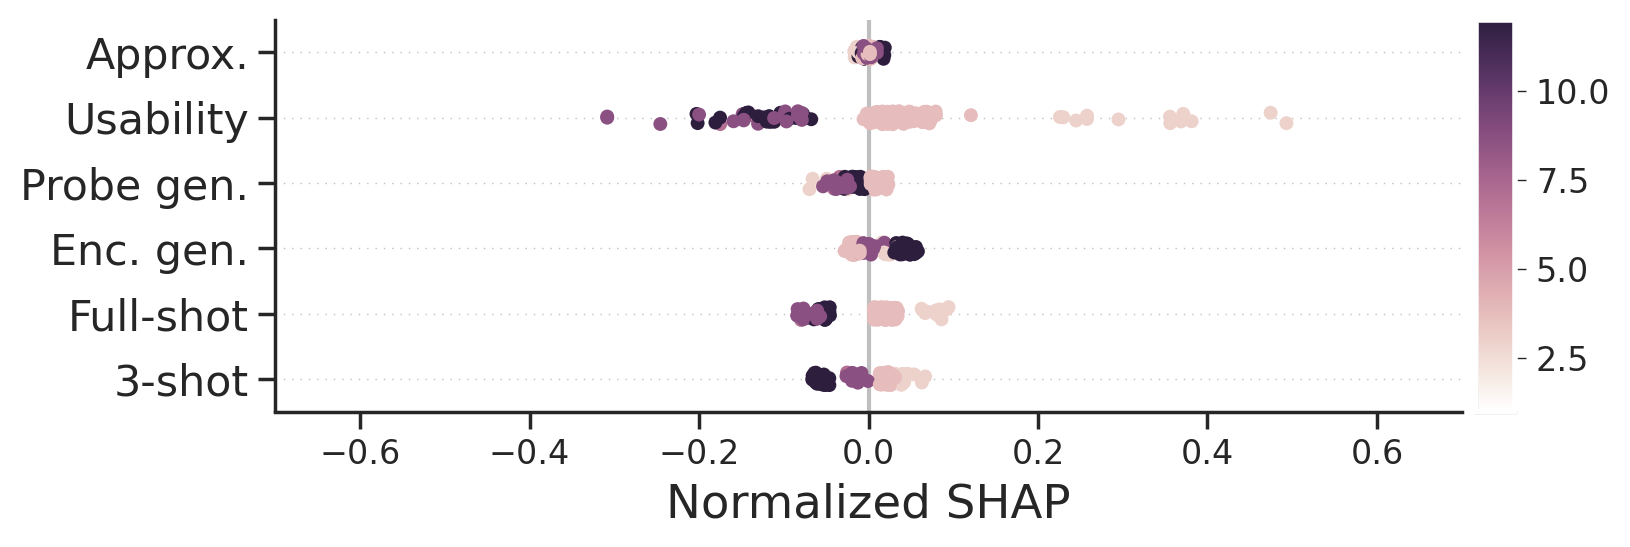

In [104]:

##
col = "nviews"
g,other= plot_shap_components(col, df_shap_tofit["min"], is_normalize=True, aspect=3, height=3, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")


### Effect of type of method

Now let's consider the effect of the type of method

**Hypothesis** ISSL showed that contrastive, distillation and clustering all optimize nearly the right objective and can be made correct with minor differences, so we hypothesize that usability for them must be good.

In [105]:
modes_to_plot = ["generative", "clustering", "contrastive", "transform"]

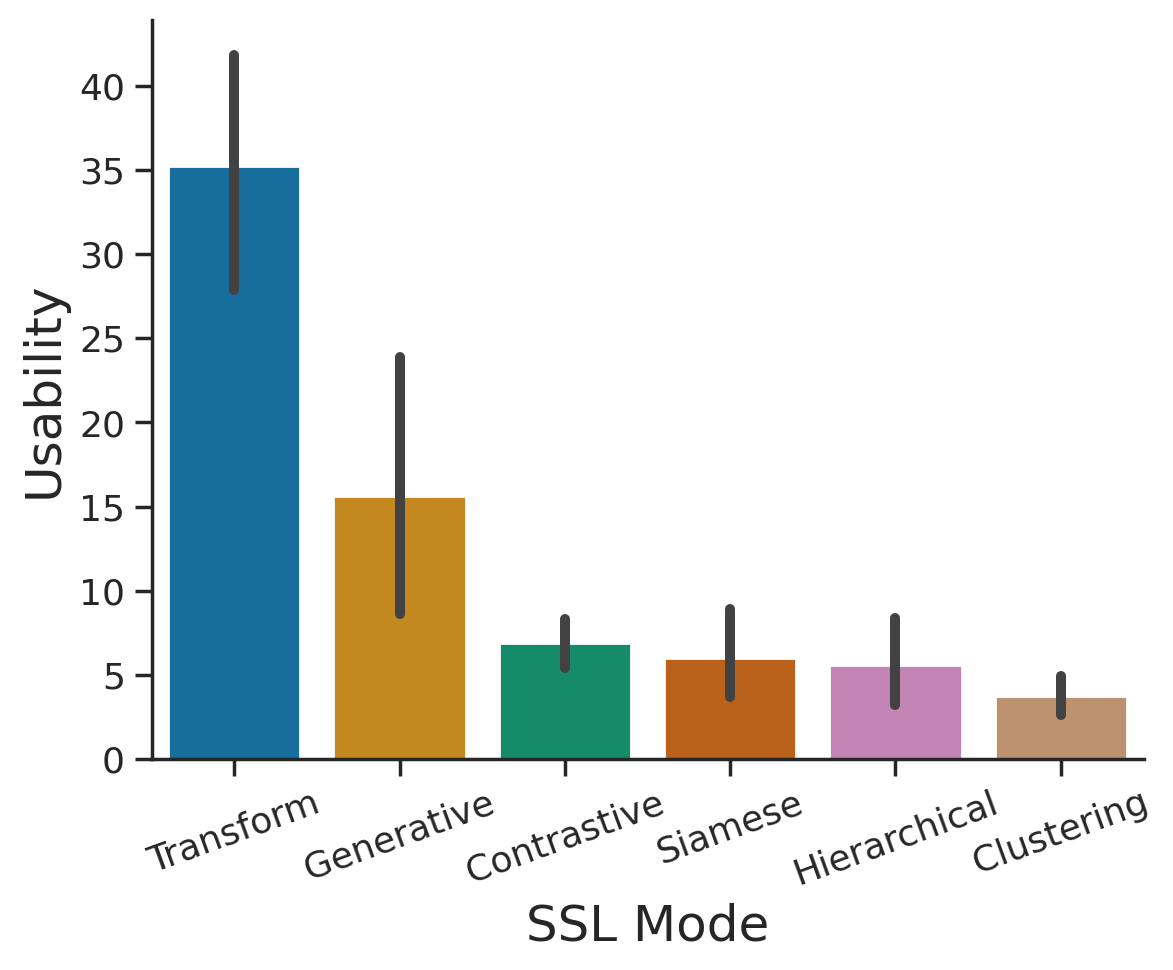

In [107]:
# ssl_mode_cat = ['transform',
#  'generative',
#  'contrastive',
#  'siamese',
#  'hierarchical',
#  'clustering']

# with plot_config(rc={'lines.linewidth': 2, 'font.family': 'sans-serif', "xtick.labelsize": 13, "ytick.labelsize": 13}):
#     curr_df = df.copy()
#     curr_df.ssl_mode = curr_df.ssl_mode.astype("category").cat.reorder_categories(ssl_mode_cat)
#     ax=sns.barplot(data=prettify_df(curr_df), y="Usability",  x="SSL Mode")
#     plt.setp(ax.get_xticklabels(), rotation=20) #ha="right"
#     #plt.tight_layout()
# plt.show()
# save_fig(ax, f"figures/objective/obj_usability_global.pdf")

In [108]:
treatment = "ssl_mode" 
g,to_condition = causal_graph(treatment)
to_condition = [c for c in to_condition if c ]
ols_summary(inp, treatment, objectives=components_to_plot, 
            condition=to_condition+["{treatment}"], is_short=True)

usability
rmse: nan, delta: 0


Coef.    Std.Err.         t     P>|t|  \
ssl_mode[T.contrastive]     0.660474    1.430609  0.461674  0.645144   
ssl_mode[T.generative]    974.762469  251.844188  3.870498  0.000177   
ssl_mode[T.hierarchical]    3.885946    2.125193  1.828514  0.069935   
ssl_mode[T.siamese]         0.777640    1.814391  0.428595  0.668980   
ssl_mode[T.transform]       9.560547    3.793397  2.520313  0.013027   

                              [0.025       0.975]  
ssl_mode[T.contrastive]    -2.171793     3.492742  
ssl_mode[T.generative]    476.170473  1473.354465  
ssl_mode[T.hierarchical]   -0.321434     8.093325  
ssl_mode[T.siamese]        -2.814425     4.369704  
ssl_mode[T.transform]       2.050517    17.070577


probe_gen
rmse: 2.439237829784405, delta: 0


Coef.    Std.Err.         t     P>|t|  \
ssl_mode[T.contrastive]   -1.701438    0.819035 -2.077370  0.039544   
ssl_mode[T.generative]   -60.964561  142.400299 -0.428121  0.669203   
ssl_mode[T.hierarchical]  -1.274052    1.093418 -1.165201  0.245864   
ssl_mode[T.siamese]       -0.855447    1.038477 -0.823751  0.411443   
ssl_mode[T.transform]     -4.674226    2.181414 -2.142751  0.033814   

                              [0.025      0.975]  
ssl_mode[T.contrastive]    -3.320322   -0.082554  
ssl_mode[T.generative]   -342.429441  220.500318  
ssl_mode[T.hierarchical]   -3.435275    0.887171  
ssl_mode[T.siamese]        -2.908075    1.197182  
ssl_mode[T.transform]      -8.985954   -0.362498

We see that it really only impacts usability

In [109]:
vary = ["ssl_mode", "architecture", "nviews", "epochs", "z_dim"] #,"batch_size"
df_mode = melt(get_only_vary(df, ["ssl_mode"], vary), components=COMPONENTS)

In [110]:
df_mode.ssl_mode.unique()

<StringArray>
['clustering', 'transform', 'contrastive', 'siamese', 'hierarchical']
Length: 5, dtype: string

In [111]:
ols_summary(df_mode, "ssl_mode", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
ssl_mode[T.contrastive]    4.400753  1.995457  2.205386  0.031625   0.401767   
ssl_mode[T.hierarchical]   2.037133  2.385529  0.853954  0.396834  -2.743573   
ssl_mode[T.siamese]        0.895769  2.535830  0.353245  0.725255  -4.186147   
ssl_mode[T.transform]     24.697094  5.804250  4.255002  0.000082  13.065116   

                             0.975]  
ssl_mode[T.contrastive]    8.399738  
ssl_mode[T.hierarchical]   6.817839  
ssl_mode[T.siamese]        5.977685  
ssl_mode[T.transform]     36.329071


probe_gen
rmse: 1.7798895347577126, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
ssl_mode[T.contrastive]   -2.834790  0.840727 -3.371831  0.001323  -4.517081   
ssl_mode[T.hierarchical]  -1.973516  0.927212 -2.128442  0.037487  -3.828863   
ssl_mode[T.siamese]       -2.275218  1.072106 -2.122194  0.038030  -4.420498   
ssl_mode[T.transform]    -11.861096  2.474113 -4.794081  0.000011 -16.811784   

                            0.975]  
ssl_mode[T.contrastive]  -1.152499  
ssl_mode[T.hierarchical] -0.118170  
ssl_mode[T.siamese]      -0.129938  
ssl_mode[T.transform]    -6.910408

We indeed have that contrastive and transform are significantly worst than 

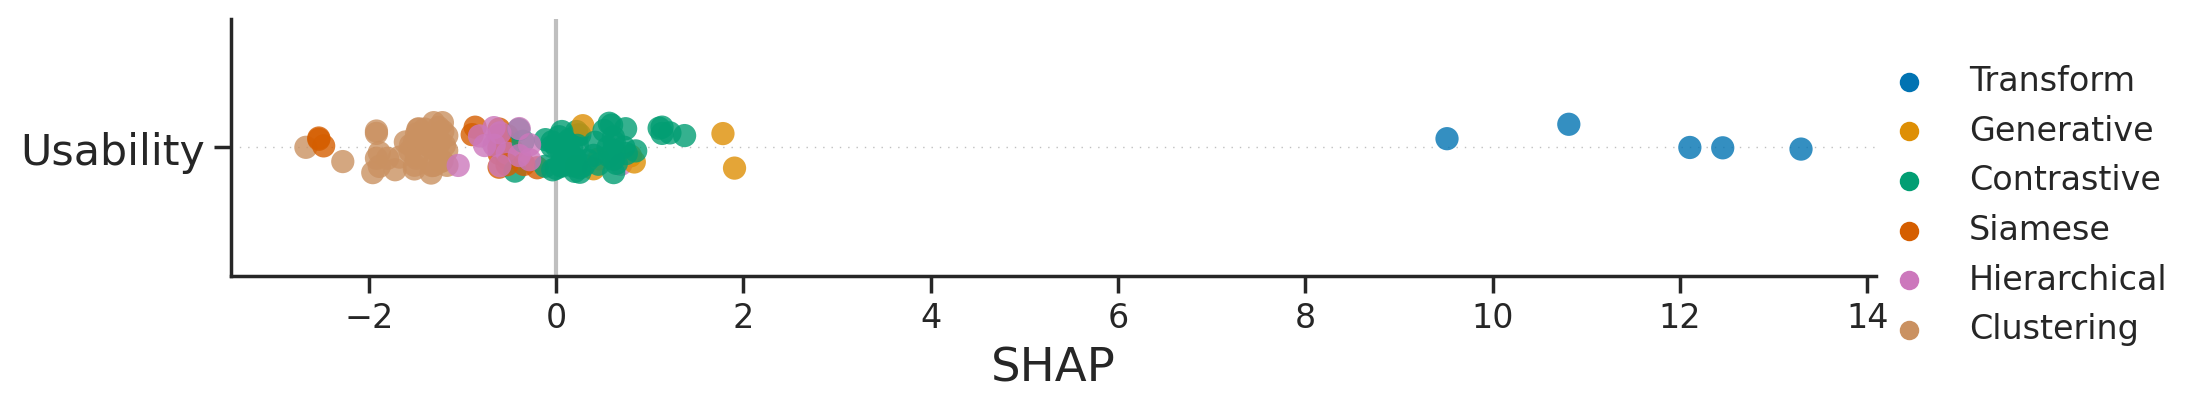

In [112]:
usability_only = df_shap["nano"].iloc[df_shap["nano"].index.get_level_values(None) == "usability"].copy()
usability_only.ssl_mode = usability_only.ssl_mode.astype("category").cat.reorder_categories(ssl_mode_cat)
g,other=plot_shap_components("ssl_mode", usability_only, height=2.5, aspect=4, s=70, alpha=0.8)
plt.show()
save_fig(g, f"figures/objective/obj_usability_shap.pdf")

We see that clustering has a huge beneficial impact on usability while transform has a terrible one (had to gut it because it's more than 10).
The advantage of clustering is that we can decrease the number of cluster (not automatic) 

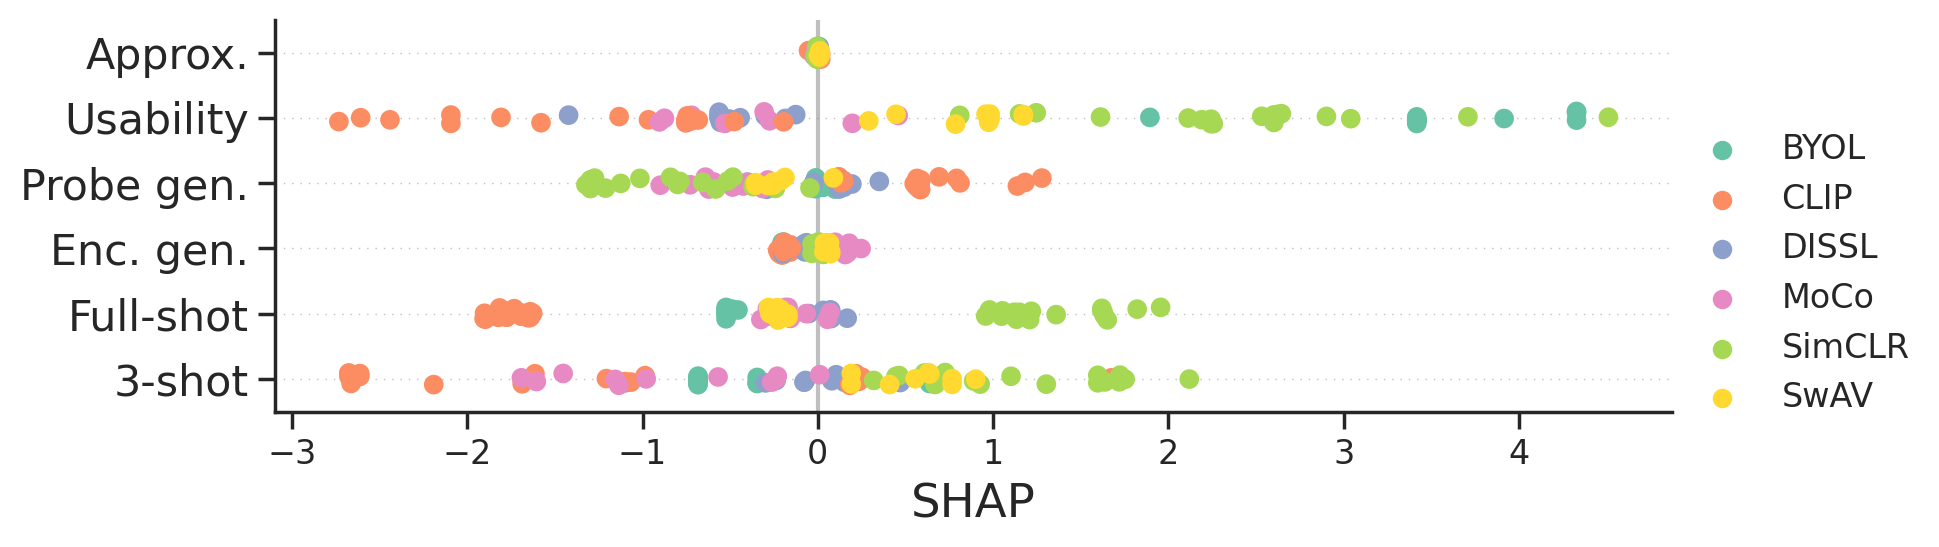

In [113]:
min_n_models = 7
curr_df = df_shap_tofit["min"].query("component == 'usability'").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
values_counts = curr_df.objective.value_counts()
objective_to_keep=curr_df.groupby("objective").mean(numeric_only=True).shap_objective[values_counts>min_n_models].index

palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
usability_only = df_shap_tofit["min"].query("objective.isin(@objective_to_keep)").copy()
usability_only.objective = usability_only.objective.cat.remove_unused_categories()
g,other=plot_shap_components("objective", usability_only, 
                       height=3, aspect=3, s=50, palette=palette)
plt.show(g)
save_fig(g, f"figures/objective/all_objectives.pdf")


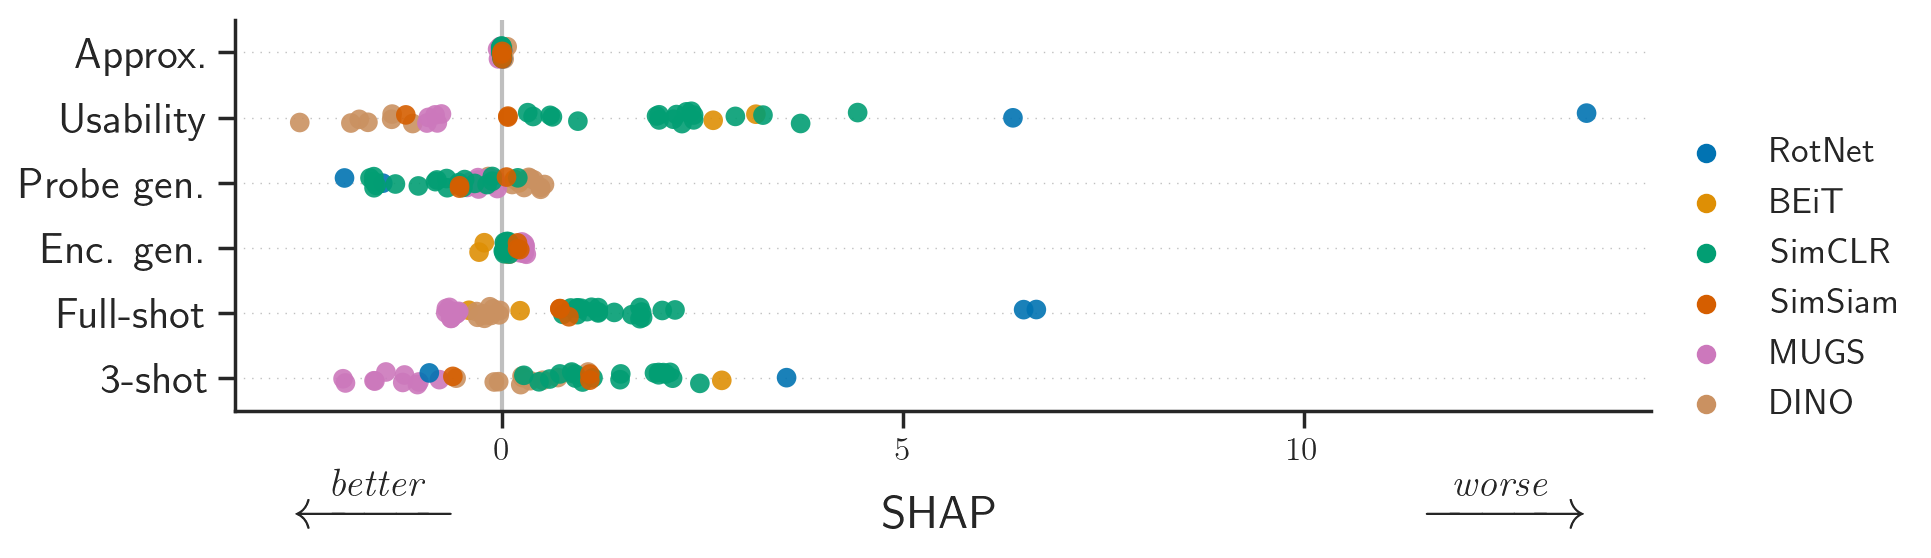

<Figure size 640x480 with 0 Axes>

In [114]:
objective_to_keep=["rotnet","beit","simclr","simsiam", "mugs","dino"]


#palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
curr_df = df_shap_tofit["min"].query("objective.isin(@objective_to_keep)").query("version == 1").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
curr_df.objective = curr_df.objective.cat.remove_unused_categories().cat.reorder_categories(objective_to_keep)

rc={'lines.linewidth': 2, "xtick.labelsize": 12, "legend.fontsize": 13,  "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}
with plot_config(font_scale=1.4, is_use_tex=True, rc=rc ):

    g,other=plot_shap_components("objective", curr_df,  aspect=3, height=3, s=50, alpha=0.9, 
                                 rc=rc,config_kwargs=dict(is_use_tex=True) )
    
    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{5cm} SHAP \hspace*{5cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}")
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(4))

    
    plt.show(g)
    save_fig(g, f"figures/objective/representative_objectives.pdf")


We see that CLIP is the best followed by beitM

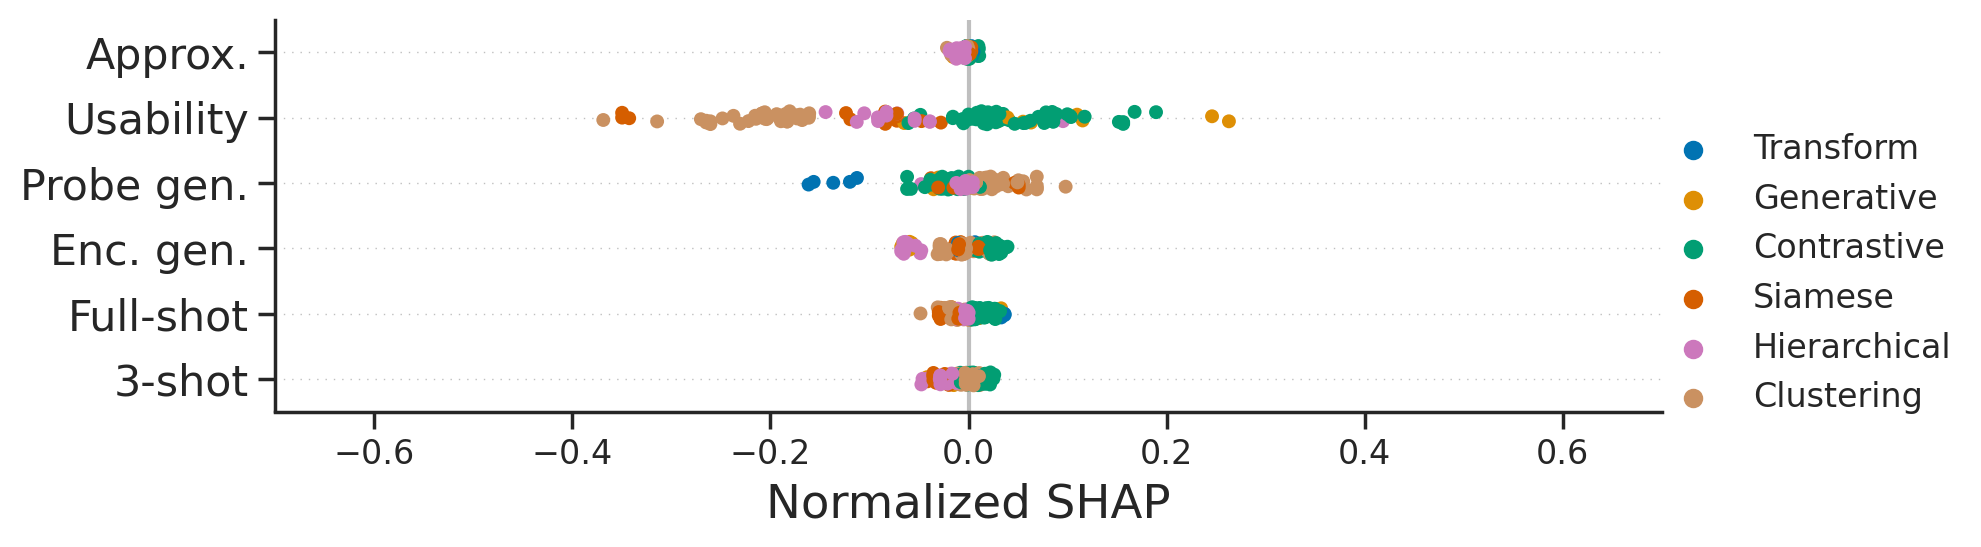

In [115]:
col = "ssl_mode"

curr_df = df_shap_tofit["nano"].copy()
curr_df.ssl_mode = curr_df.ssl_mode.astype("category").cat.reorder_categories(ssl_mode_cat)

g,other=plot_shap_components(col, curr_df, height=3, aspect=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

ADD TRANSORM points

### Effect of projection 

(<seaborn.axisgrid.FacetGrid at 0x7f8d327686a0>, {})

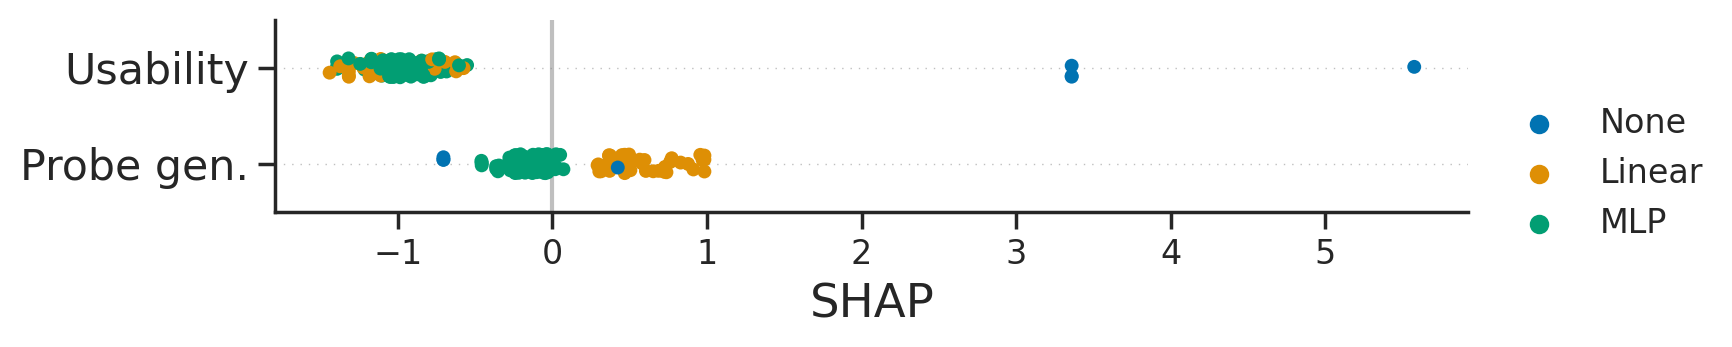

In [116]:
plot_shap_components("projection2_arch", df_shap["min"], 
                     height=2, aspect=4)

In [117]:
treatment = "projection2_arch" 
g,to_condition = causal_graph(treatment)
ols_summary(inp[inp[treatment] != "Na"], treatment, objectives=components_to_plot, 
            condition=to_condition+["{treatment}"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
projection2_arch[T.linear] -7.525100  2.448187 -3.073743  0.002650 -12.375401   
projection2_arch[T.mlp]    -8.620521  2.633914 -3.272893  0.001413 -13.838780   

                              0.975]  
projection2_arch[T.linear] -2.674799  
projection2_arch[T.mlp]    -3.402262

We see that using an MLP projection is one of the rare things that help both usability and probe gen. 
Specifically, we have that using some projection head impacts significantly usability, while MLP specifically improves probe gen. From the point of view of all 

People typically say that this avoids collapsing: let's check

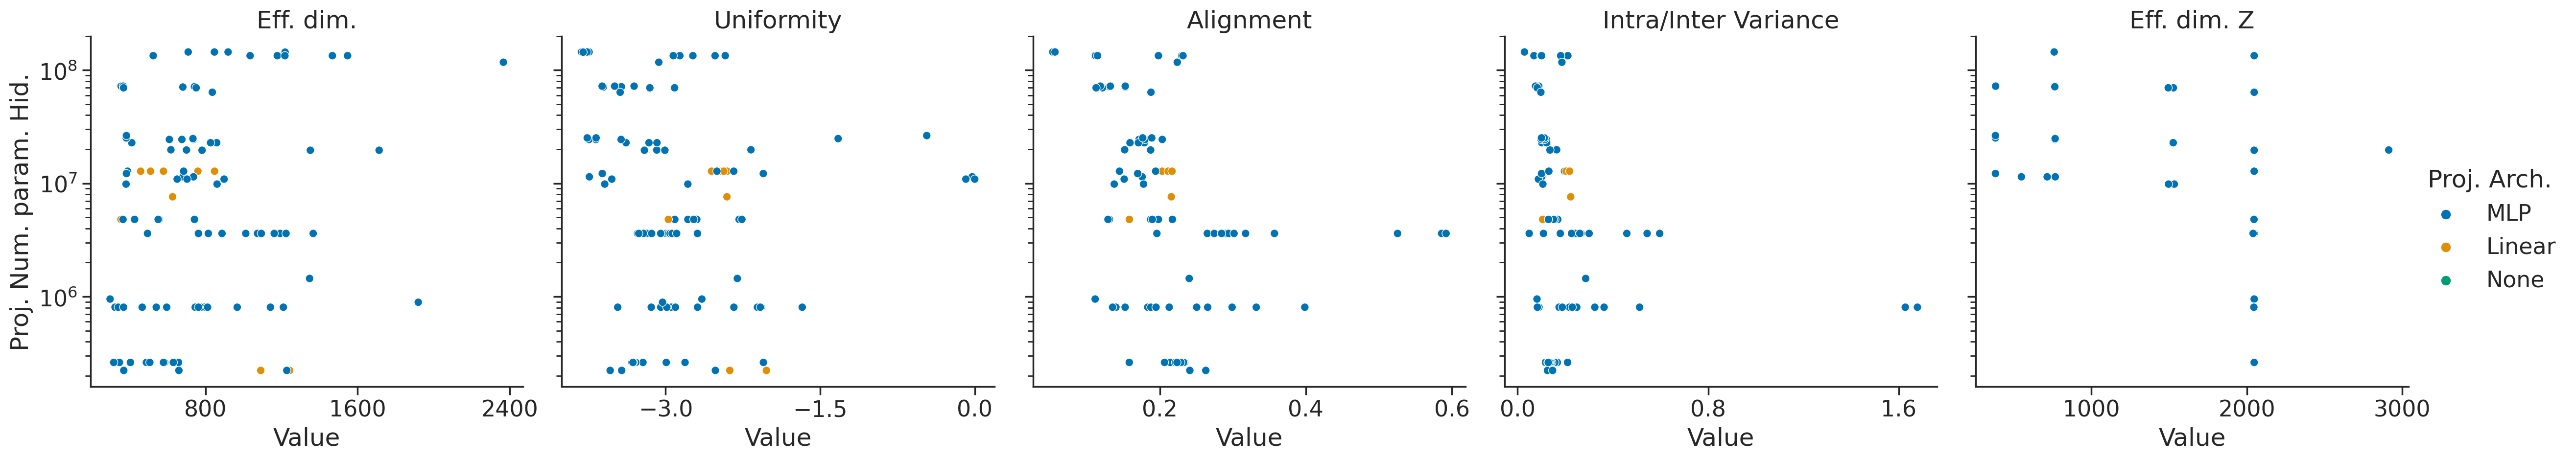

In [118]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted_ministats), 
                  x=PRETTY_RENAMER["value"],
                  y=PRETTY_RENAMER["projection_nparameters_hidden"], 
                  hue=PRETTY_RENAMER["projection2_arch"], 
                  col=PRETTY_RENAMER["component"],
                  facet_kws={'sharey': True,'sharex': False}
                 )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    g.set(yscale="log")
    for ax in g.axes.flatten():
        ax.xaxis.set_major_locator(plt.MaxNLocator(3, min_n_ticks=3))

In [119]:
treatment = "projection_nparameters_hidden" 
g,to_condition = causal_graph(treatment)
ols_summary(melted_stats.dropna(subset=[treatment]), 
            treatment, objectives=CORE_STATISTICS, 
            condition=to_condition+["np.log({treatment})"], 
            is_short=True)

train_rank
rmse: nan, delta: 0


Coef.   Std.Err.         t  \
np.log(projection_nparameters_hidden)  51.140152  16.512885  3.096985   

                                          P>|t|     [0.025     0.975]  
np.log(projection_nparameters_hidden)  0.002631  18.319005  83.961299


train_uniformity
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden) -0.136301  0.061438 -2.218518  0.029123   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden) -0.258415 -0.014187


trainrealaug_alignment
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden) -0.020198  0.006324 -3.193782  0.002117   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden) -0.032814 -0.007582


train_rank_Z
rmse: nan, delta: 0


Coef.   Std.Err.         t  \
np.log(projection_nparameters_hidden)  27.650424  12.043988  2.295786   

                                          P>|t|    [0.025     0.975]  
np.log(projection_nparameters_hidden)  0.024687  3.629447  51.671402

We see that it has some correlation with effective dimensionality but not that much. 
So I don't really know what is the impact of a larger projection head, but clearly there's an impact. Eg below we see that more parameters are better when it's few shot

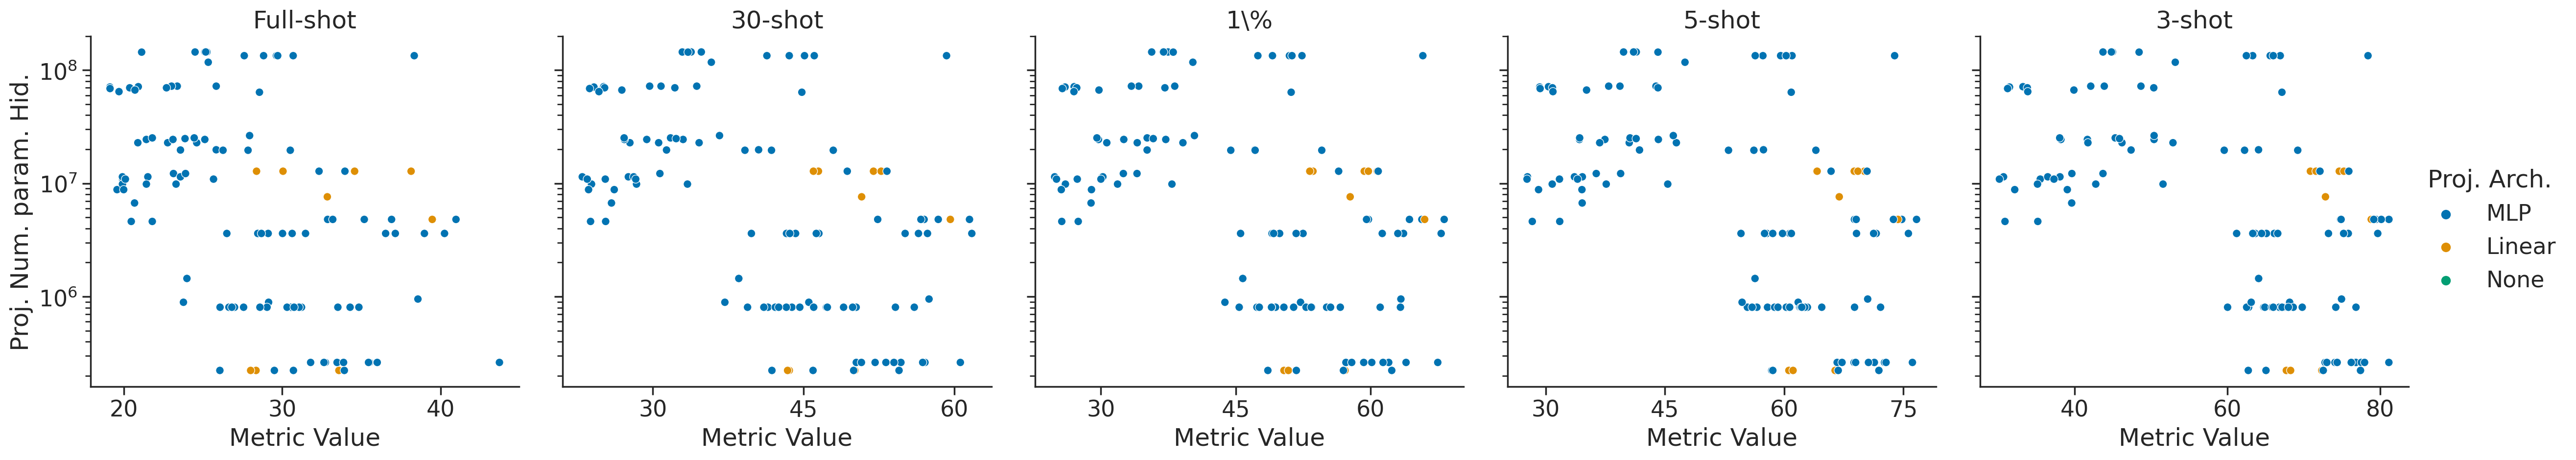

In [120]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted_metrics), 
                  x=PRETTY_RENAMER["metric_value"],
                  y=PRETTY_RENAMER["projection_nparameters_hidden"], 
                  hue=PRETTY_RENAMER["projection2_arch"], 
                  col=PRETTY_RENAMER["metric"],
                  facet_kws={'sharey': True,'sharex': False}
                 )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    g.set(yscale="log")
    for ax in g.axes.flatten():
        ax.xaxis.set_major_locator(plt.MaxNLocator(3, min_n_ticks=3))

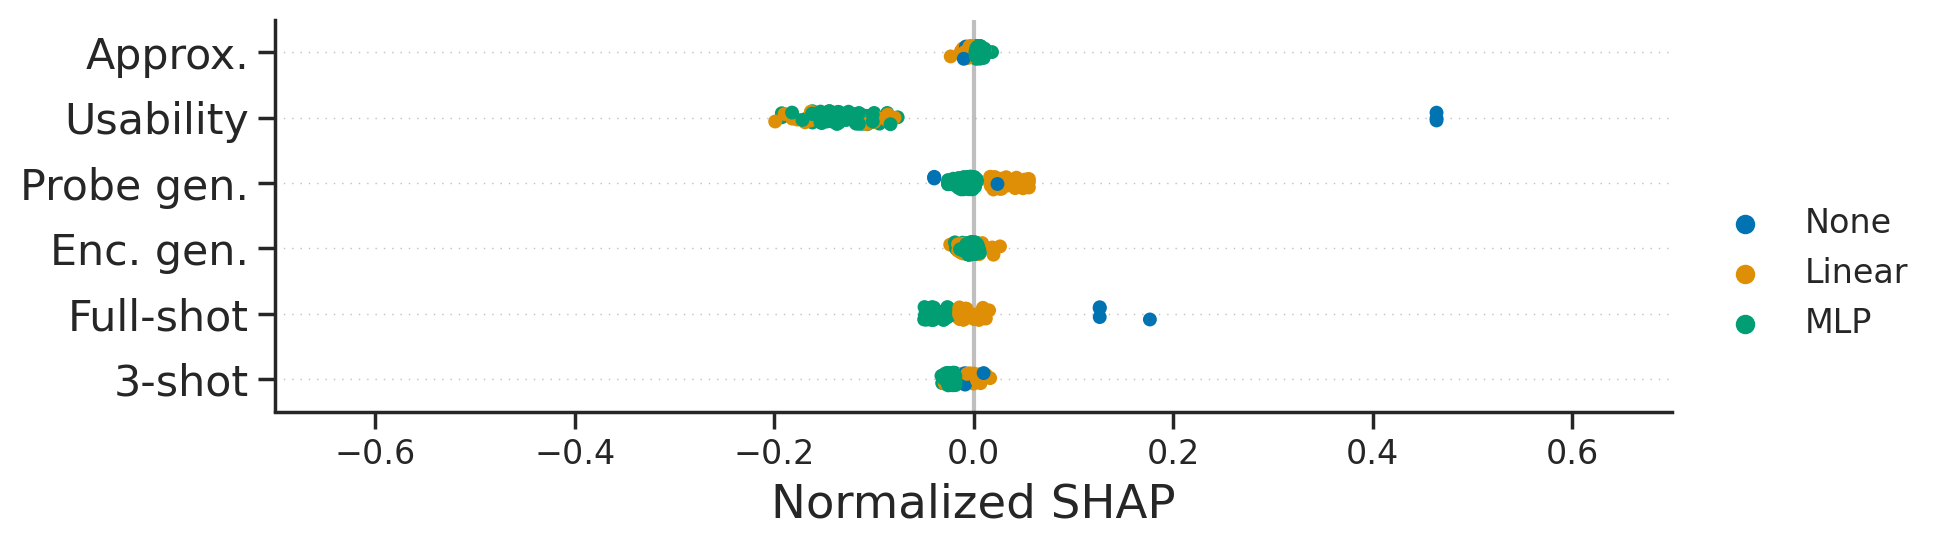

In [121]:
col = "projection2_arch"
g,_=plot_shap_components(col, df_shap_tofit["min"], 
                     height=3, aspect=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

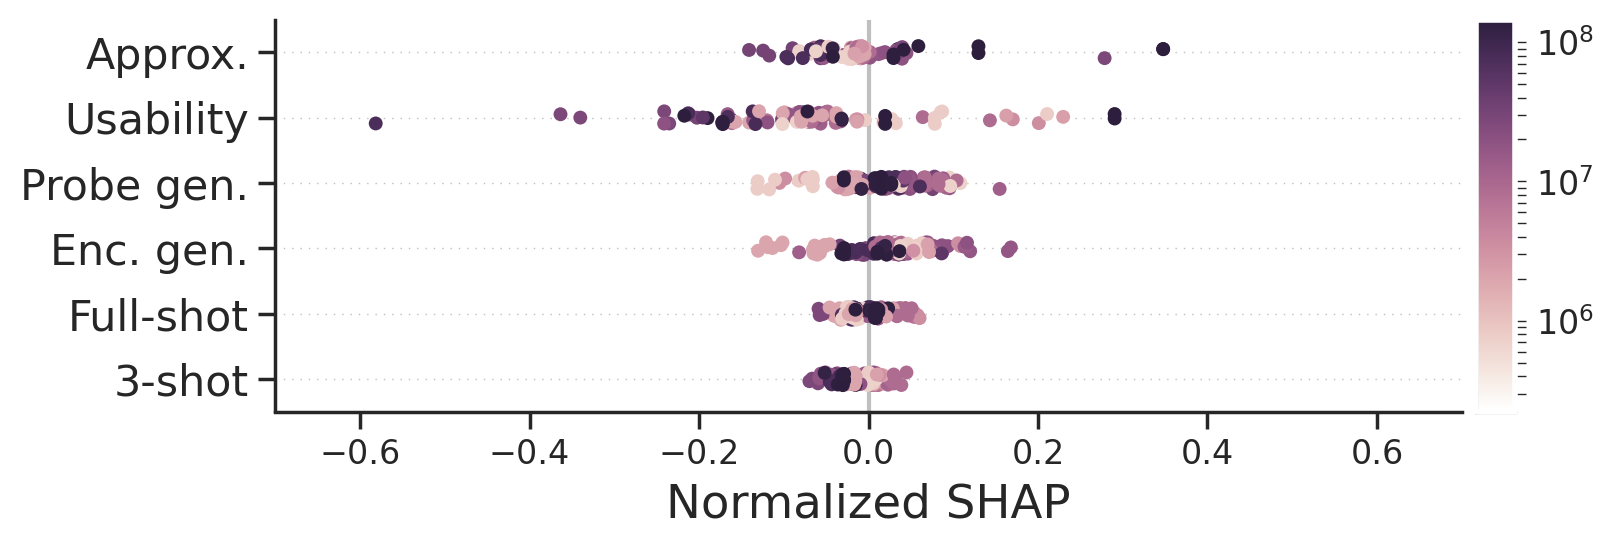

In [124]:
col = "projection_nparameters_hidden"
g,other=plot_shap_components(col, df_shap_tofit["min"], 
                     height=3, aspect=3, hue_norm=LogNorm(), is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g

# other["colorbar"].formatter.set_powerlimits((0, 0))
# other["colorbar"].ax.yaxis.offsetText.set_fontsize(12)
# other["colorbar"].ax.yaxis.offsetText.set(ha="center")
# g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [168]:
treatment = "projection_nparameters_hidden" 
g,to_condition = causal_graph("")
ols_summary(inp[~inp[treatment].isna()], treatment, objectives=components_to_plot, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden) -0.686123   0.28361 -2.419249  0.017711   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden) -1.250112 -0.122133


probe_gen
rmse: 2.3215359030879315, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden)  0.678338  0.219982  3.083603  0.002644   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden)  0.241899  1.114776

We see that probe gen actually worsen's as the projection head becomes larger, even though using an MLP is better. This is especially strange given that performance in gew shot seems better so I wouldn't read too much in it (+ not hightly significant)

In [169]:
ols_summary(df_proj, "projection2_arch", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

usability
rmse: 0.791546178475124, delta: 0


Coef.  Std.Err.          t         P>|t|  \
projection2_arch[T.linear]  -9.586450  0.698078 -13.732633  6.704357e-10   
projection2_arch[T.mlp]    -12.947848  0.698078 -18.547849  9.377589e-12   

                               [0.025     0.975]  
projection2_arch[T.linear] -11.074369  -8.098532  
projection2_arch[T.mlp]    -14.435766 -11.459929


probe_gen
rmse: 0.48151641002713885, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
projection2_arch[T.linear] -0.473261  0.424658 -1.114452  0.282624 -1.378397   
projection2_arch[T.mlp]    -1.386441  0.424658 -3.264844  0.005222 -2.291577   

                              0.975]  
projection2_arch[T.linear]  0.431876  
projection2_arch[T.mlp]    -0.481305

In [175]:
treatment = "projection2_arch" 
g,to_condition = causal_graph(treatment)
ols_summary(melted_stats.dropna(subset=[treatment]).query("projection2_arch != 'Na'"), 
            treatment, objectives=CORE_STATISTICS, 
            condition=to_condition+["{treatment}"], 
            is_short=True)

train_rank
rmse: nan, delta: 0


Coef.   Std.Err.         t         P>|t|  \
projection2_arch[T.linear] -1076.943418  167.62553 -6.424698  3.480387e-09   
projection2_arch[T.mlp]    -1053.944980  178.54766 -5.902878  4.029269e-08   

                                 [0.025      0.975]  
projection2_arch[T.linear] -1409.137873 -744.748963  
projection2_arch[T.mlp]    -1407.784534 -700.105427

In [178]:
treatment = "projection2_arch" 
g,to_condition = causal_graph(treatment)
ols_summary(melted_stats.dropna(subset=[treatment]).query("projection2_arch != 'Na'").query("projection2_arch != 'identity'"), 
            treatment, objectives=CORE_STATISTICS, 
            condition=to_condition+["{treatment}"], 
            is_short=True)

### Architecture

#### Family

(<seaborn.axisgrid.FacetGrid at 0x7f8d08227f40>, {})

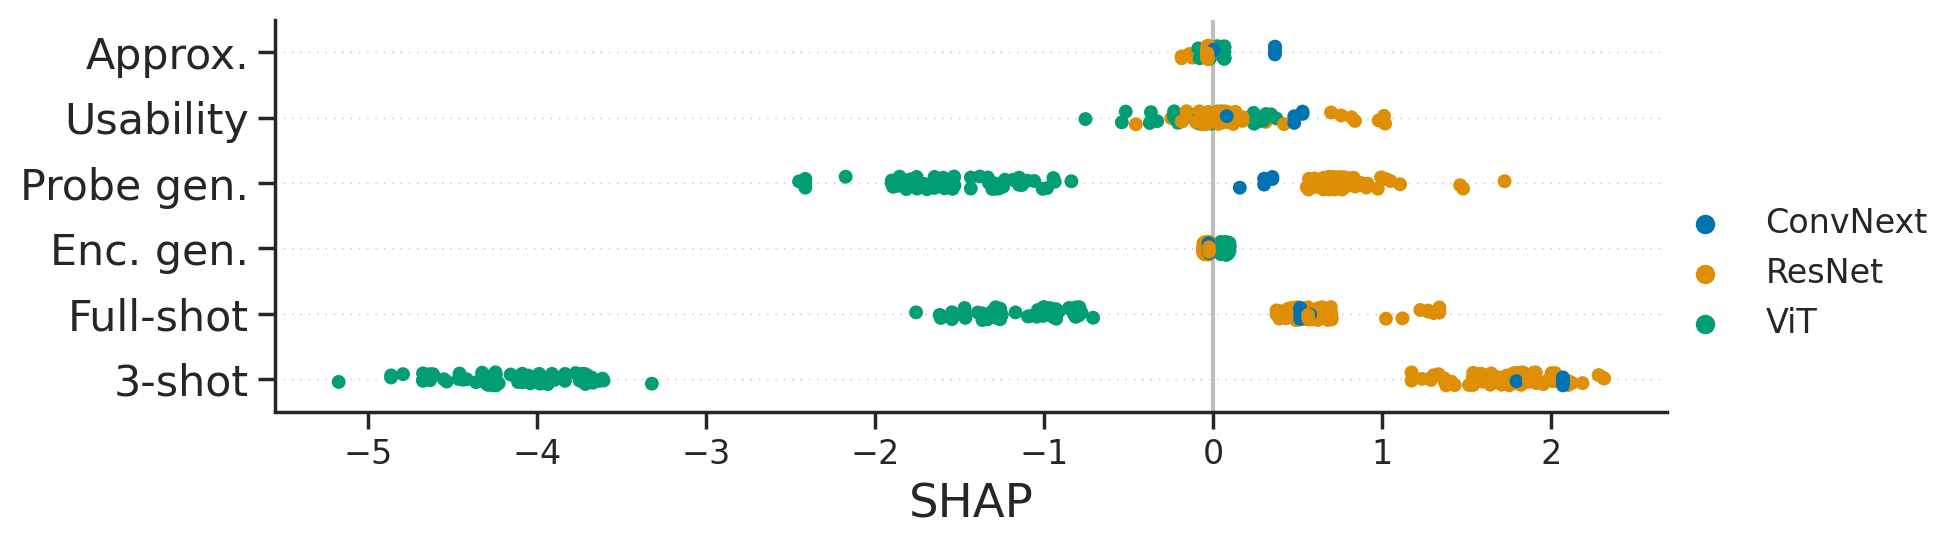

In [128]:
plot_shap_components("family", df_shap_tofit["nano"], height=3, aspect=3)

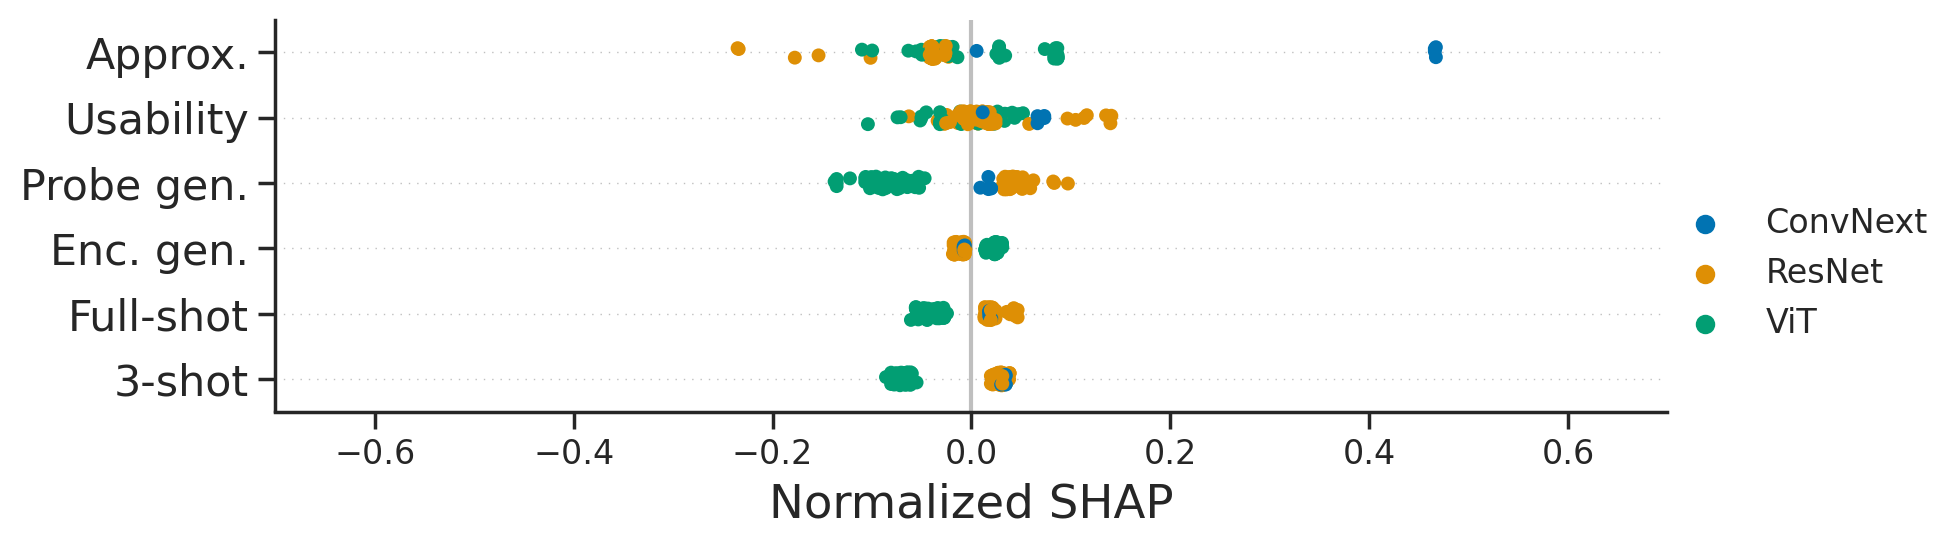

In [131]:
col = "family"
g,other=plot_shap_components(col, df_shap_tofit["nano"], is_normalize=True, aspect=3, height=3)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

#### N parameters

(<seaborn.axisgrid.FacetGrid at 0x7f8d119e2cb0>,
 {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f8d119e1c90>})

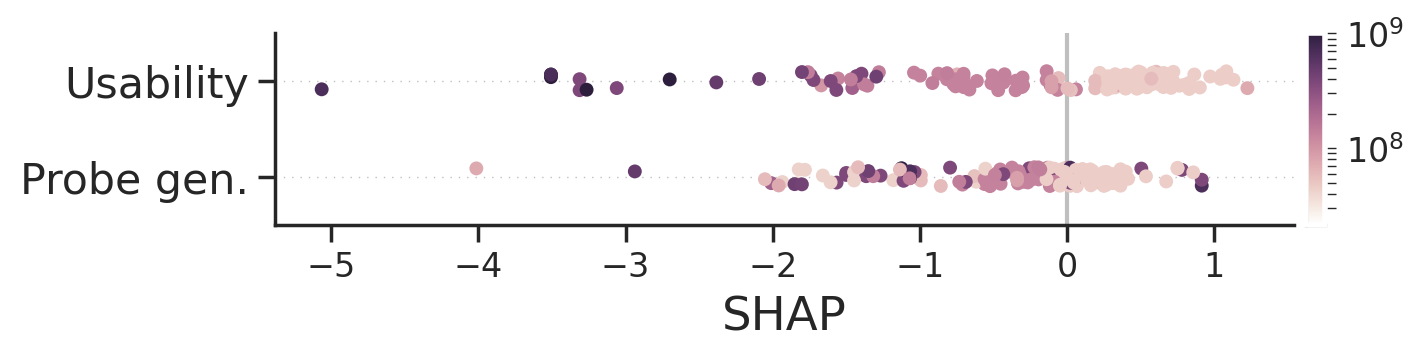

In [132]:
plot_shap_components("n_parameters", df_shap["nano"],hue_norm=LogNorm(), is_colorbar=True)

Larger is better for everything, but in particular approximation if you normalize it

In [133]:
treatment = "n_parameters" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=to_fit, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t         P>|t|    [0.025  \
np.log(n_parameters) -0.284162  0.028895 -9.834205  3.964790e-17 -0.341368   

                        0.975]  
np.log(n_parameters) -0.226956


agg_risk
rmse: 3.317675772209814, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_parameters) -1.516316  0.546023 -2.777018  0.006216 -2.595572   

                       0.975]  
np.log(n_parameters) -0.43706


train-nperclass-3_test
rmse: 4.994274938370124, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_parameters) -3.654937  0.821958 -4.446622  0.000017 -5.279598   

                        0.975]  
np.log(n_parameters) -2.030275

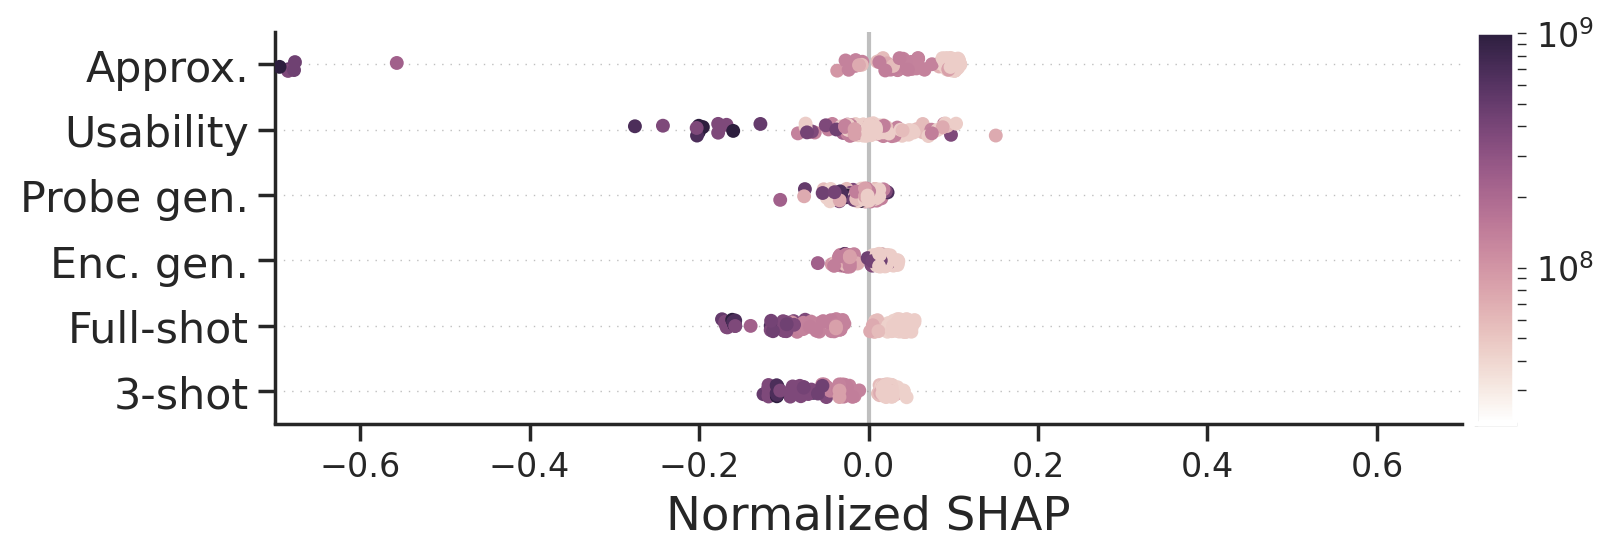

In [134]:
col="n_parameters"
g,other=plot_shap_components(col, df_shap_tofit["min"], 
                     aspect=3, height=3, hue_norm=LogNorm(), is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
# other["colorbar"].formatter.set_powerlimits((0, 0))
# other["colorbar"].ax.yaxis.offsetText.set_fontsize(12)
# other["colorbar"].ax.yaxis.offsetText.set(ha="center")
# g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

#### Patch size

(<seaborn.axisgrid.FacetGrid at 0x7f8d25f0a4a0>,
 {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f8d011ad570>})

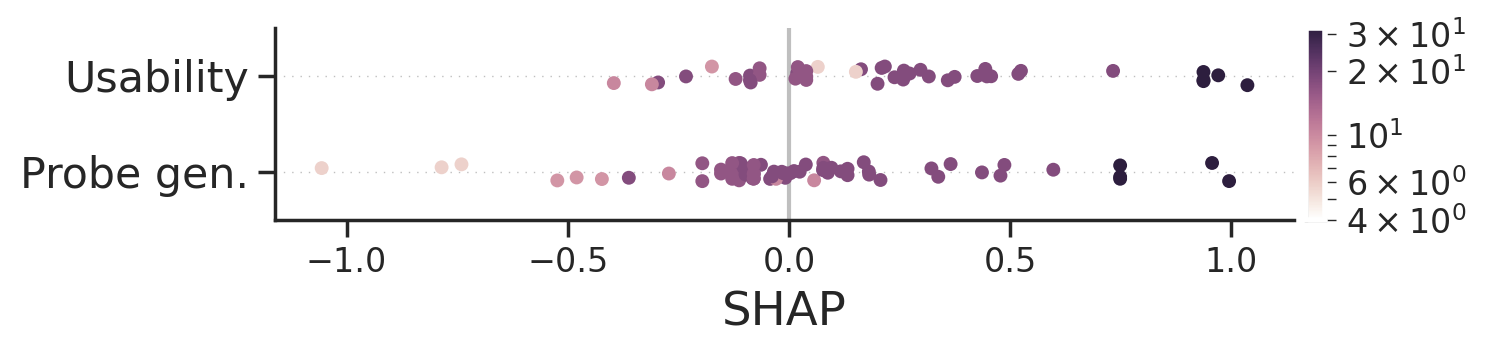

In [135]:
plot_shap_components("patch_size", 
                     df_shap["nano"].query("family == 'vit'"), 
                     hue_norm=LogNorm(), is_colorbar=True)


Again improves everything

In [136]:
treatment = "patch_size" 
g,to_condition = causal_graph(treatment)
ols_summary(inp.query("family == 'vit'"), treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(patch_size)  0.325891  0.138547  2.352212  0.025663  0.042531  0.609251


agg_risk
rmse: 2.6453960430827155, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(patch_size)  3.85422  1.405882  2.741496  0.008366  1.033112  6.675328

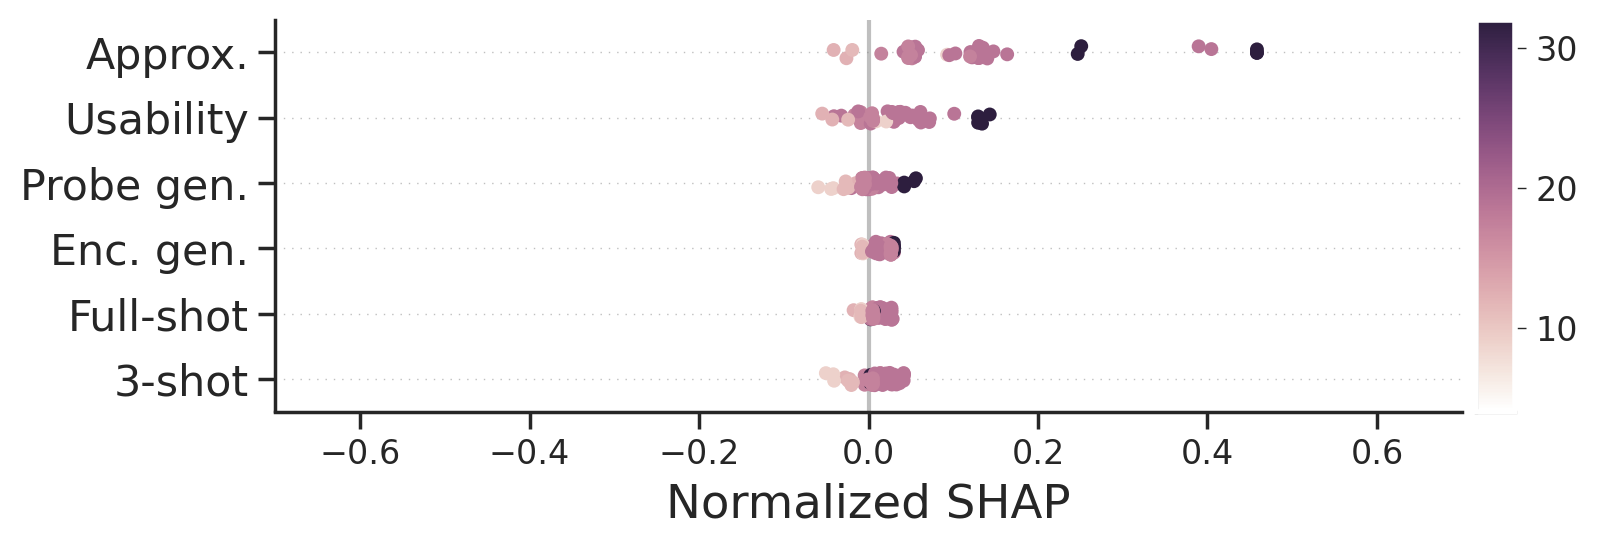

In [138]:
col = "patch_size"
g,other=plot_shap_components(col, 
                     df_shap_tofit["nano"].query("family == 'vit'"), 
                     is_normalize=True,
                     aspect=3, height=3, 
                     #hue_norm=LogNorm(), 
                     is_colorbar=True)
g.set(xlim=[-0.7,0.7])

all_hparam_plots[col] = g

plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

### Data

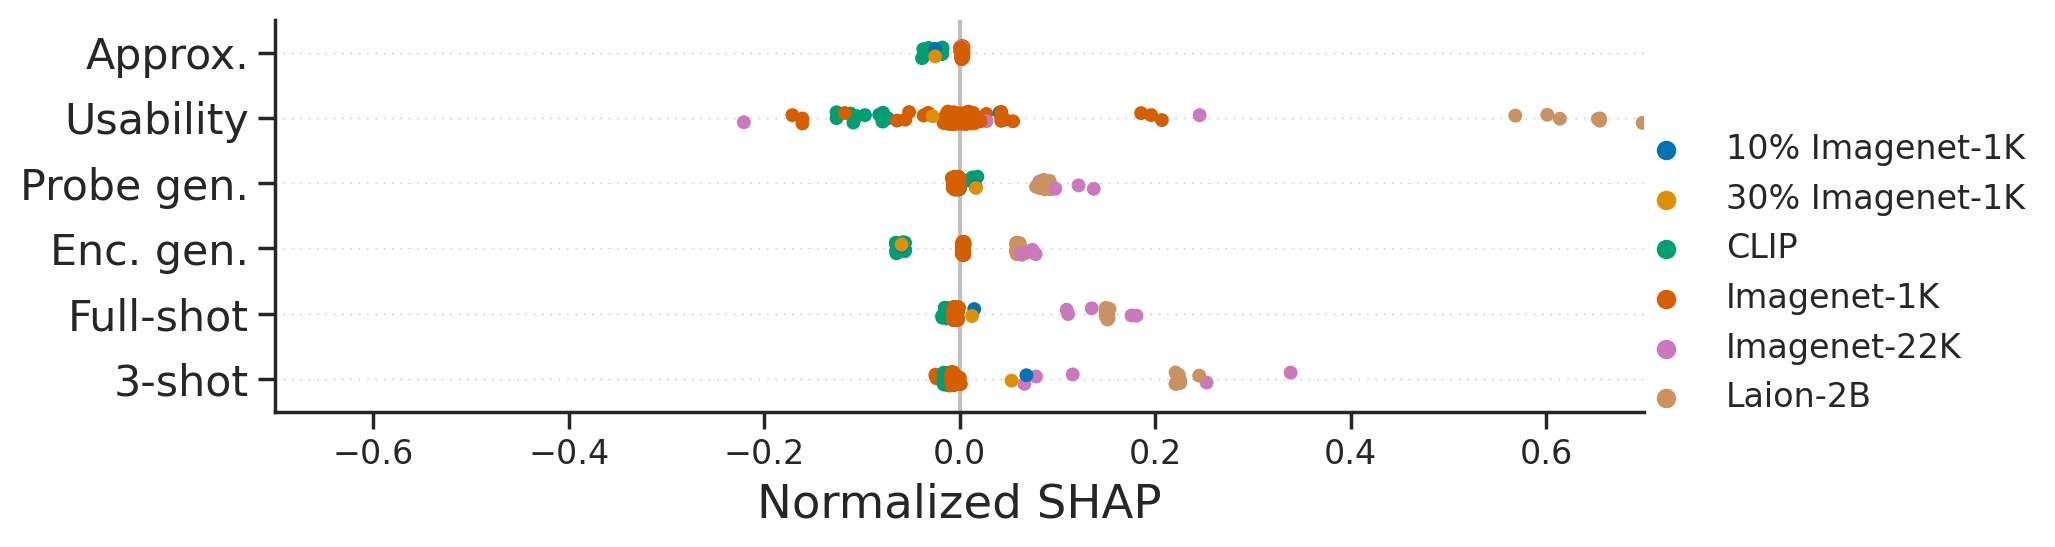

In [139]:
col = "pretraining_data"
g,other=plot_shap_components(col, 
                     df_shap_tofit["min"], 
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [140]:

#
treatment = "pretraining_data" 
g,to_condition = causal_graph(treatment)
ols_summary(inp.query("pretraining_data.isin(['ImageNet-1K','ImageNet-22K'])"), 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)


approx
rmse: nan, delta: 0


Coef.  Std.Err.         t    P>|t|  \
pretraining_data[T.ImageNet-22K] -0.218268  0.094272 -2.315301  0.02256   

                                    [0.025    0.975]  
pretraining_data[T.ImageNet-22K] -0.405213 -0.031323


usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
pretraining_data[T.ImageNet-22K]  7.383598  2.535563  2.912015  0.004395   

                                    [0.025     0.975]  
pretraining_data[T.ImageNet-22K]  2.355481  12.411714


agg_risk
rmse: 3.454128219049392, delta: 0


Coef.  Std.Err.         t     P>|t|  \
pretraining_data[T.ImageNet-22K]  8.955521  2.023395  4.425987  0.000021   

                                    [0.025     0.975]  
pretraining_data[T.ImageNet-22K]  4.949339  12.961702

In [141]:
# with plot_config():
#     g=sns.catplot(data=melted, x="pretraining_data", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#     g.set_xticklabels(rotation=30)

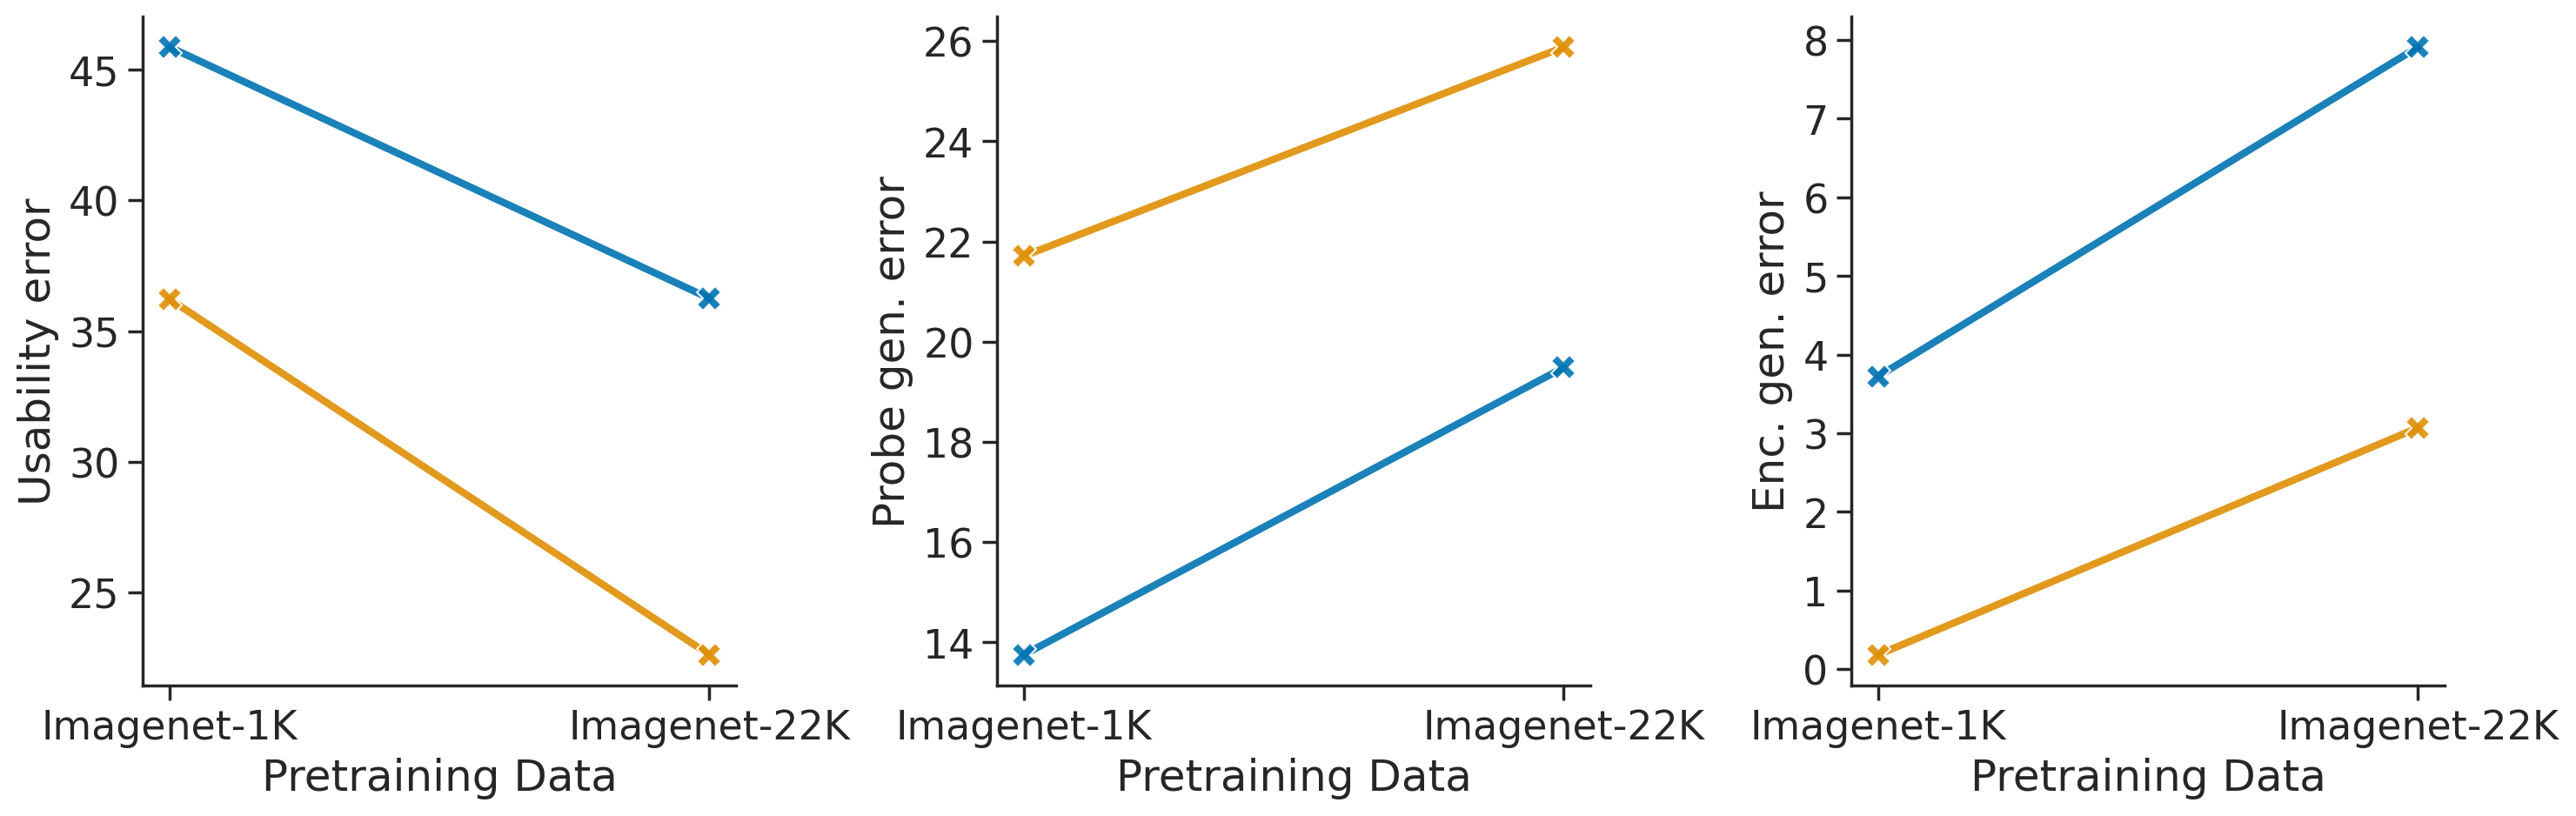

In [142]:
df_data = melt(get_only_vary(df, ["pretraining_data"], core_params),  components=COMPONENTS)

with plot_config():
    g = sns.relplot(data=prettify_df(df_data.query("component.isin(['usability','probe_gen','enc_gen'])")), 
                    x=PRETTY_RENAMER["pretraining_data"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    marker="X",
                    markersize=10,
                    alpha=0.9,
                    linewidth=3,
                    legend=False,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    #g.set_titles('{col_name}')
    g.set_titles('')
    axes = g.axes.flatten()
    axes[0].set_ylabel("Usability error")
    axes[1].set_ylabel("Probe gen. error")
    axes[2].set_ylabel("Enc. gen. error")
    
    
    #g.set(xscale="log")
    #plt.setp(g._legend.get_texts(), fontsize=12)
    plt.tight_layout()


plt.show()
save_fig(g, f"figures/data/data_controlled.pdf")

In [143]:




    
ols_summary(df_data, "pretraining_data", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.


### Epochs

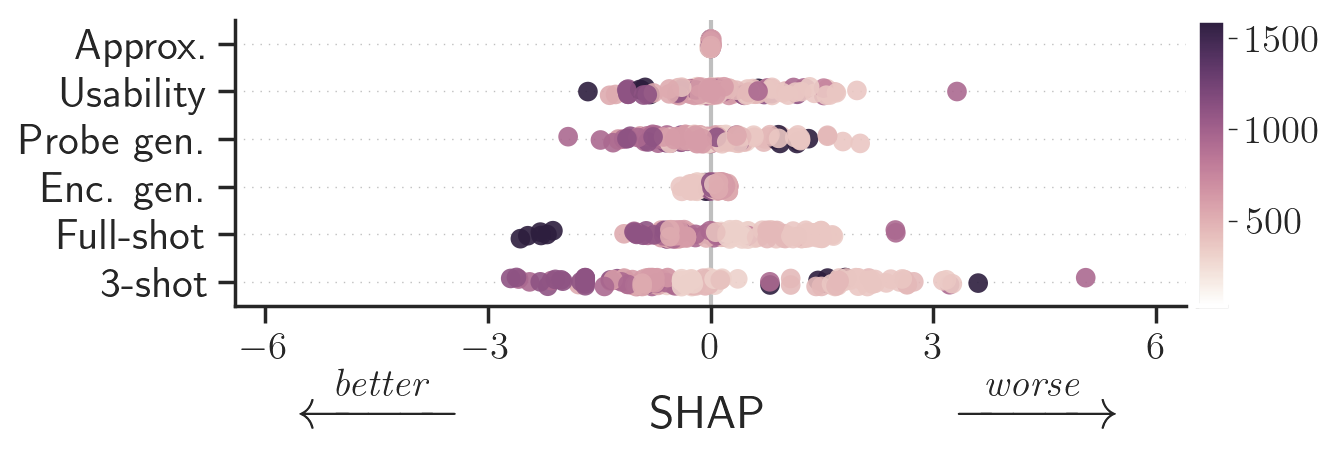

<Figure size 640x480 with 0 Axes>

In [144]:
import matplotlib as mpl

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
    g, other=plot_shap_components("epochs", df_shap_tofit["min"], config_kwargs=dict(is_use_tex=True), 
                           rc=rc, s=50, aspect=3, height=2.5, is_colorbar=True, alpha=0.9)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{2cm} SHAP \hspace*{2cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
#    save_fig(g, "figures/nviews/main_shap.pdf")

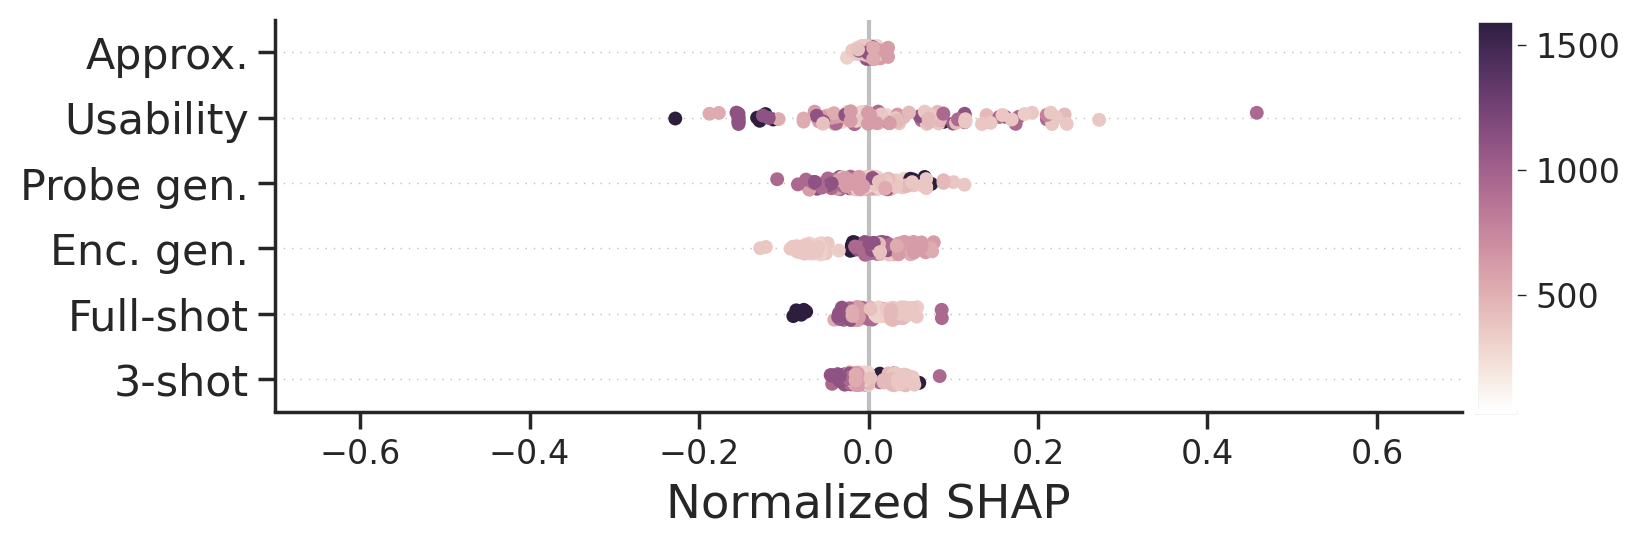

In [145]:
col = "epochs"
g,other=plot_shap_components(col, 
                     df_shap_tofit["min"],  
                     aspect=3, height=3, is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

Seems to improve a little of everythin besides enc gen!

In [146]:
treatment = "epochs" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=to_fit, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

probe_gen
rmse: 2.4392378297844064, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  0.975]
np.log(epochs) -1.273381  0.363548 -3.502644  0.000614 -1.991961 -0.5548


agg_risk
rmse: 3.3176757722098507, delta: 0


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(epochs) -0.985454  0.494472 -1.99294  0.048158 -1.962815 -0.008092


train-nperclass-3_test
rmse: 4.994274938370169, delta: 0


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(epochs) -1.499609  0.744356 -2.01464  0.045804 -2.970884 -0.028334

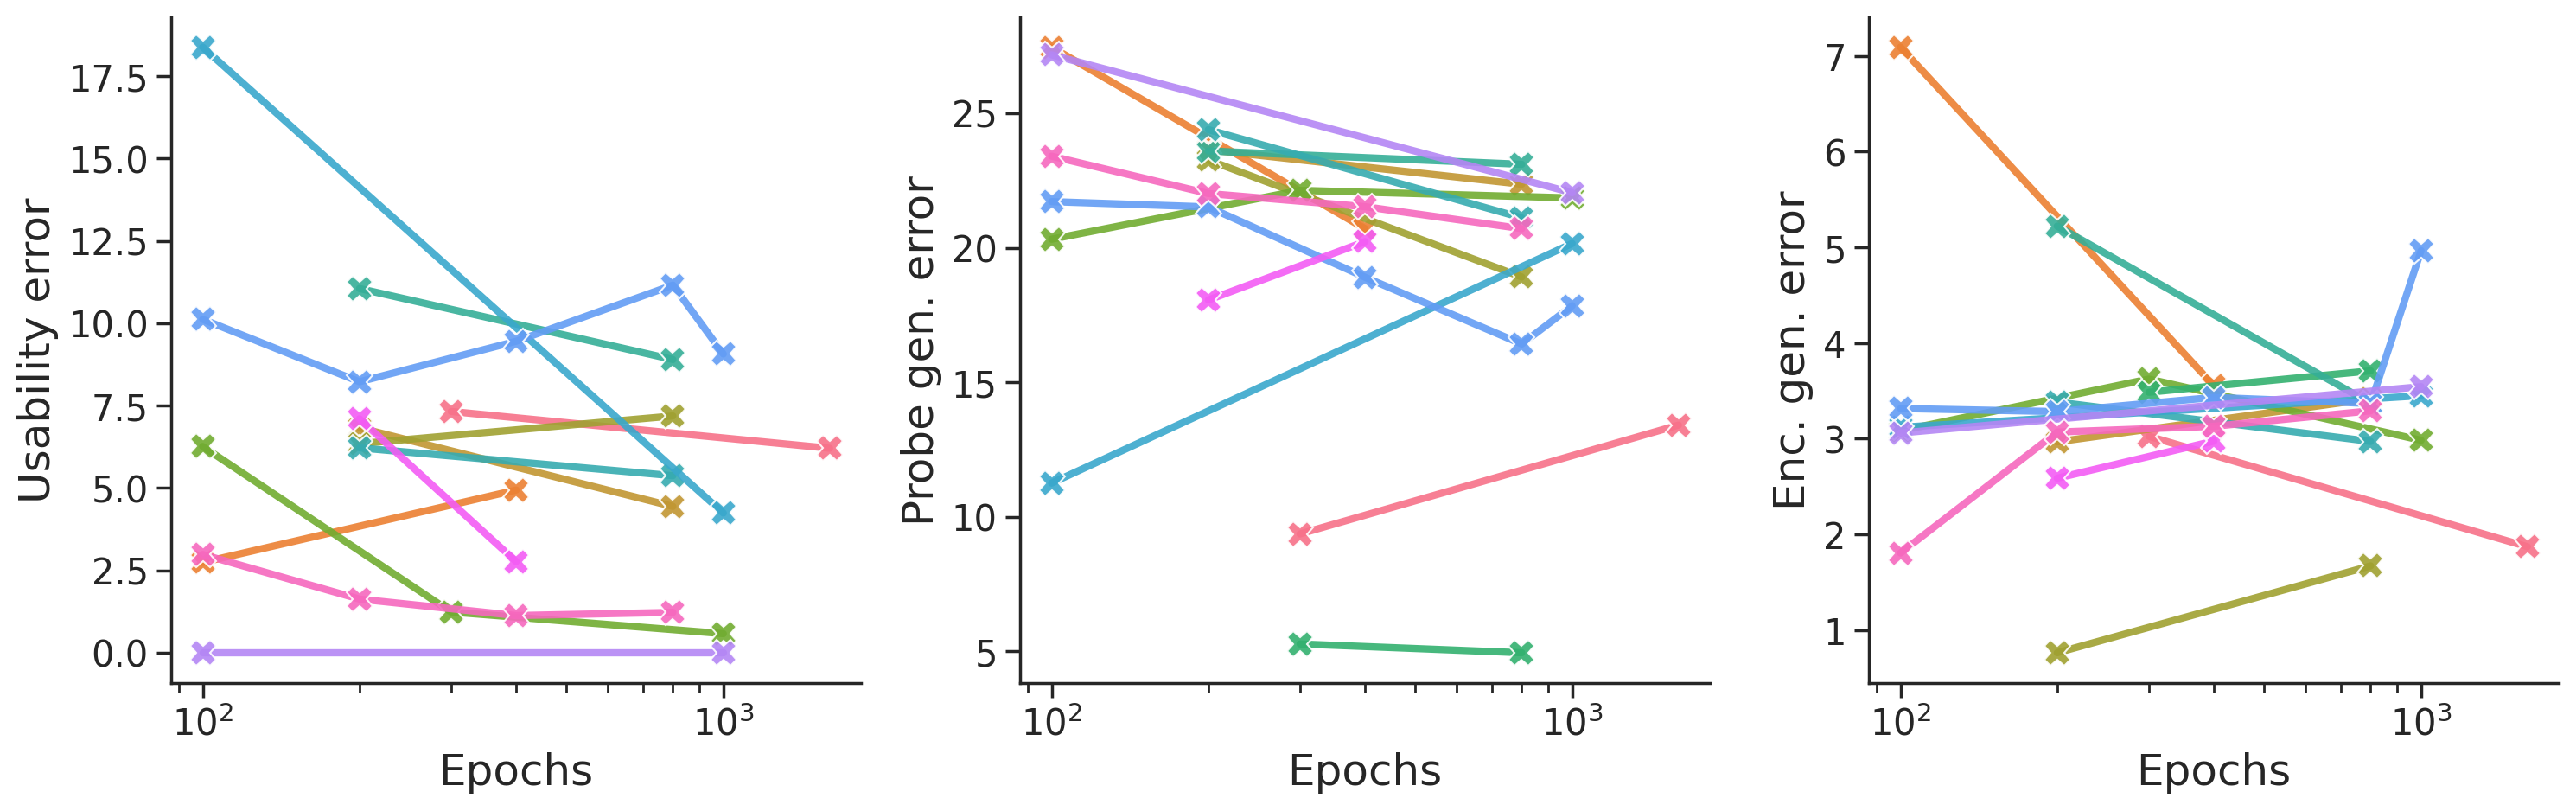

In [181]:
df_epochs = melt(get_only_vary(df, ["epochs"], core_params),  components=to_fit)
df_epochs["epochs"] = df_epochs["epochs"].astype(int)

with plot_config(rc={"xtick.labelsize": 15,"ytick.labelsize": 15},):
    g = sns.relplot(data=prettify_df(df_epochs.query('component.isin(["usability","probe_gen","enc_gen"])')), 
                    x=PRETTY_RENAMER["epochs"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=False,
                    marker="X",
                    markersize=11, linewidth=3, alpha=0.9,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    #g.set_titles('{col_name}')
    g.set_titles('')
    axes = g.axes.flatten()
    axes[0].set_ylabel("Usability error")
    axes[1].set_ylabel("Probe gen. error")
    axes[2].set_ylabel("Enc. gen. error")
    plt.tight_layout()
    
    
    g.set(xscale="log")
    #plt.setp(g._legend.get_texts(), fontsize=12)
plt.show()
save_fig(g, f"figures/optimization/controlled_epochs.pdf")

In [182]:
ols_summary(df_epochs, "epochs", condition=['non_vary', 'np.log({treatment})'], 
            f_outcome="", objectives=to_fit, is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(epochs) -1.366611  0.553053 -2.471031  0.024347 -2.533451 -0.199771


probe_gen
rmse: 1.9512183295054102, delta: 0


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(epochs) -0.588204  0.568236 -1.03514  0.314311 -1.782023  0.605615


agg_risk
rmse: 1.0565179550943633, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(epochs) -1.915066   0.30768 -6.224208  0.000007 -2.561479 -1.268654


train-nperclass-3_test
rmse: 1.840807067245501, delta: 0


Coef.  Std.Err.       t     P>|t|   [0.025    0.975]
np.log(epochs) -2.955044  0.536082 -5.5123  0.000031 -4.08131 -1.828778

#### Optimizer

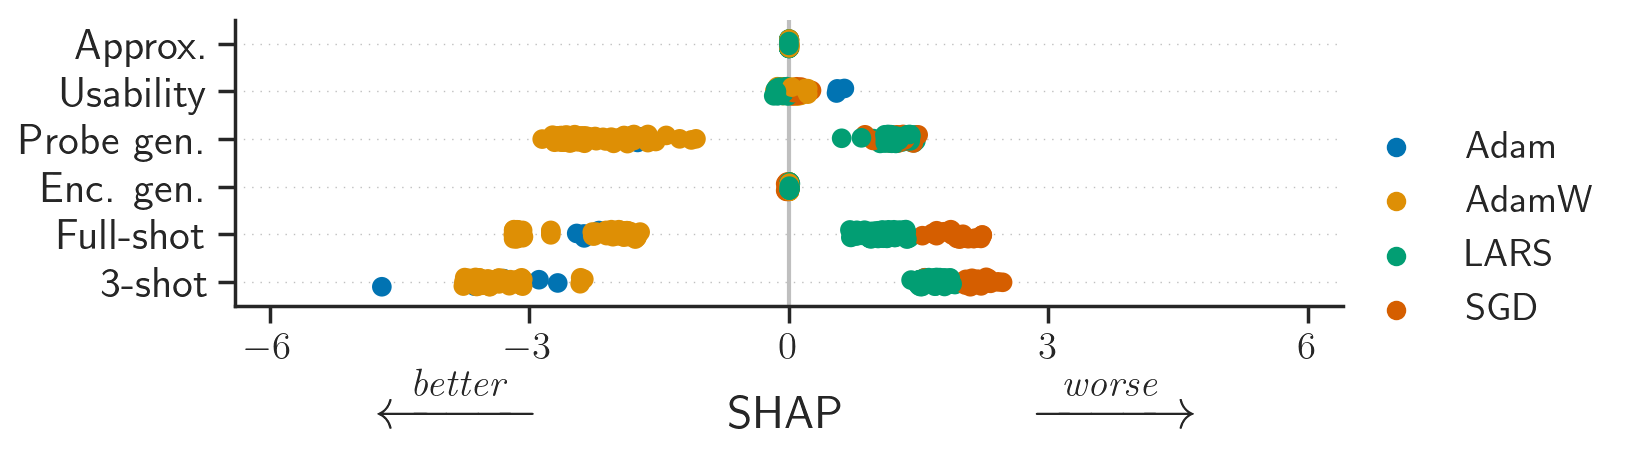

<Figure size 640x480 with 0 Axes>

In [149]:
import matplotlib as mpl

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
    g, other=plot_shap_components("optimizer",df_shap_tofit["all"], config_kwargs=dict(is_use_tex=True), 
                           rc=rc, s=50, aspect=3, height=2.5)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{2cm} SHAP \hspace*{2cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
#    save_fig(g, "figures/nviews/main_shap.pdf")

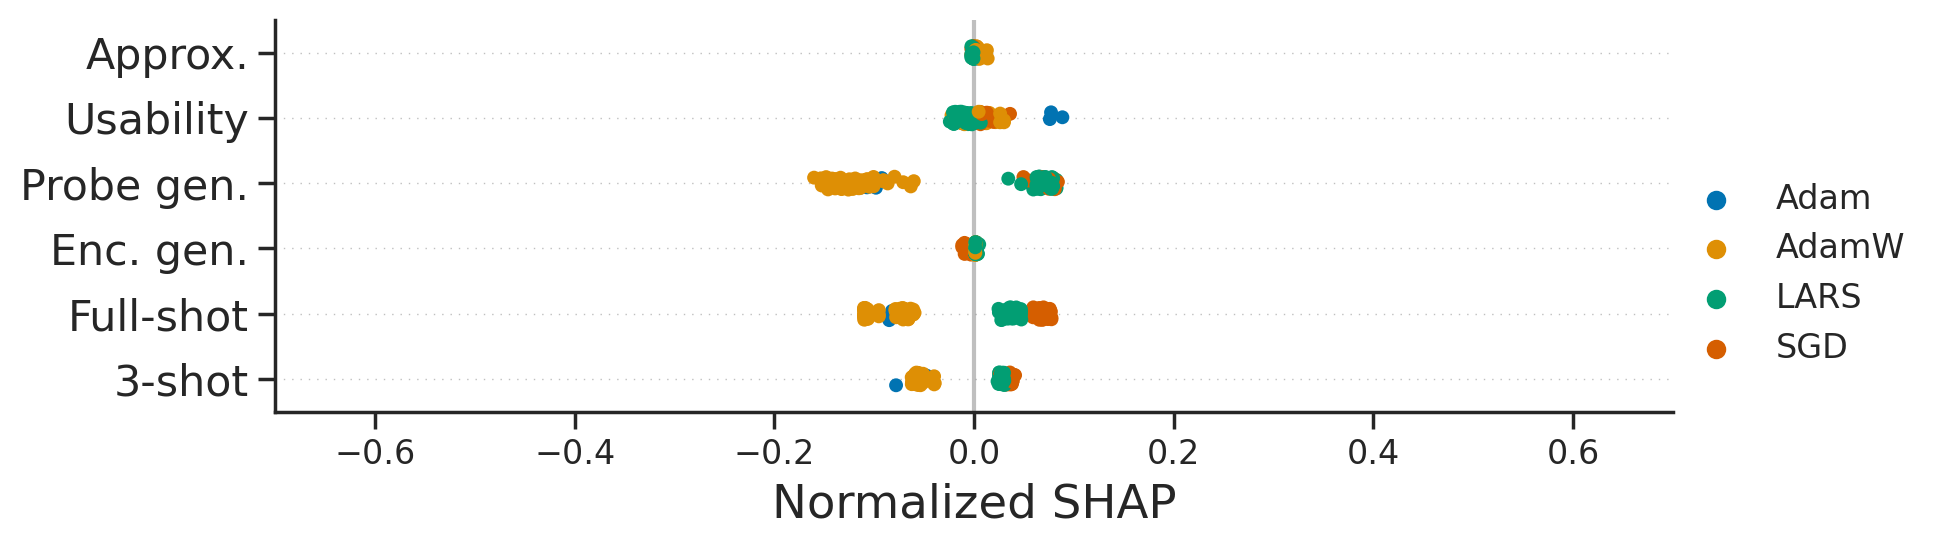

In [150]:
col = "optimizer"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"],  #using all because typically it's correlated with the year
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [151]:
treatment = "optimizer" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
optimizer[T.adamw]  -6.219177  3.400510 -1.828895  0.069941 -12.953113   
optimizer[T.lars]  -12.592589  5.101918 -2.468207  0.015013 -22.695776   
optimizer[T.sgd]   -15.750352  5.435562 -2.897649  0.004483 -26.514243   

                      0.975]  
optimizer[T.adamw]  0.514759  
optimizer[T.lars]  -2.489402  
optimizer[T.sgd]   -4.986460


agg_risk
rmse: 3.2211217499939138, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
optimizer[T.adamw]  -4.859332  2.692983 -1.804442  0.073296 -10.183175   
optimizer[T.lars]  -10.871117  3.779833 -2.876084  0.004652 -18.343589   
optimizer[T.sgd]   -11.130518  4.056269 -2.744029  0.006858 -19.149484   

                      0.975]  
optimizer[T.adamw]  0.464510  
optimizer[T.lars]  -3.398646  
optimizer[T.sgd]   -3.111553

#### learning_rate 

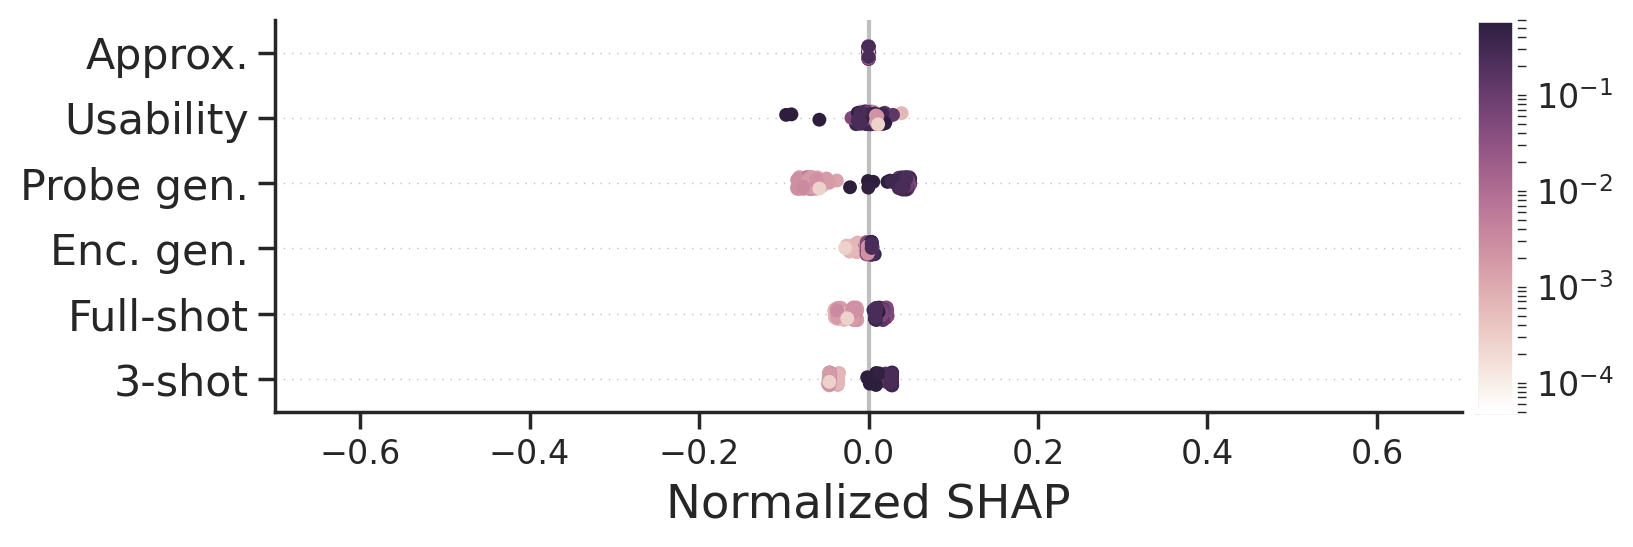

In [152]:
col="learning_rate"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(), is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
# other["colorbar"].formatter.set_powerlimits((0, 0))
# other["colorbar"].ax.yaxis.offsetText.set_fontsize(12)
# other["colorbar"].ax.yaxis.offsetText.set(ha="center")
# g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [153]:
treatment = "learning_rate" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(learning_rate)  0.033557  0.016769  2.001126  0.047635  0.000355   

                         0.975]  
np.log(learning_rate)  0.066758

#### weight_decay 

we see nearly no impact

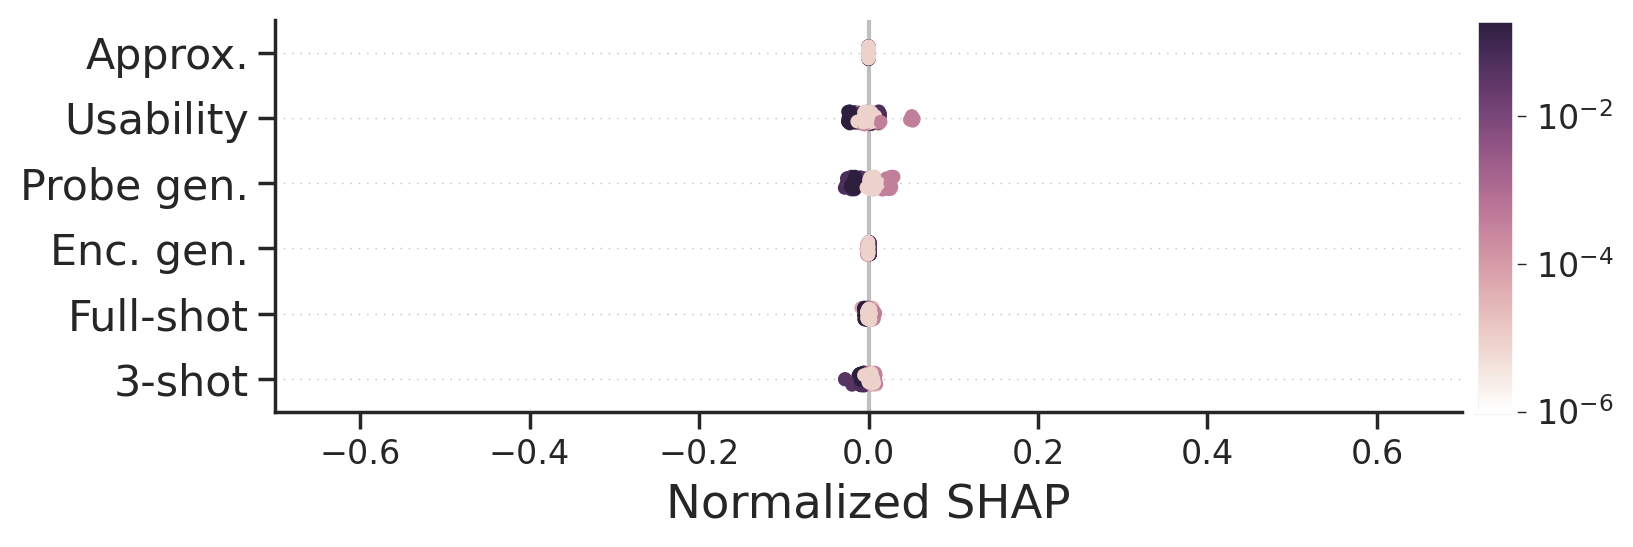

In [154]:
col="weight_decay"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(), is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [155]:
treatment = "weight_decay" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

#### Batch size

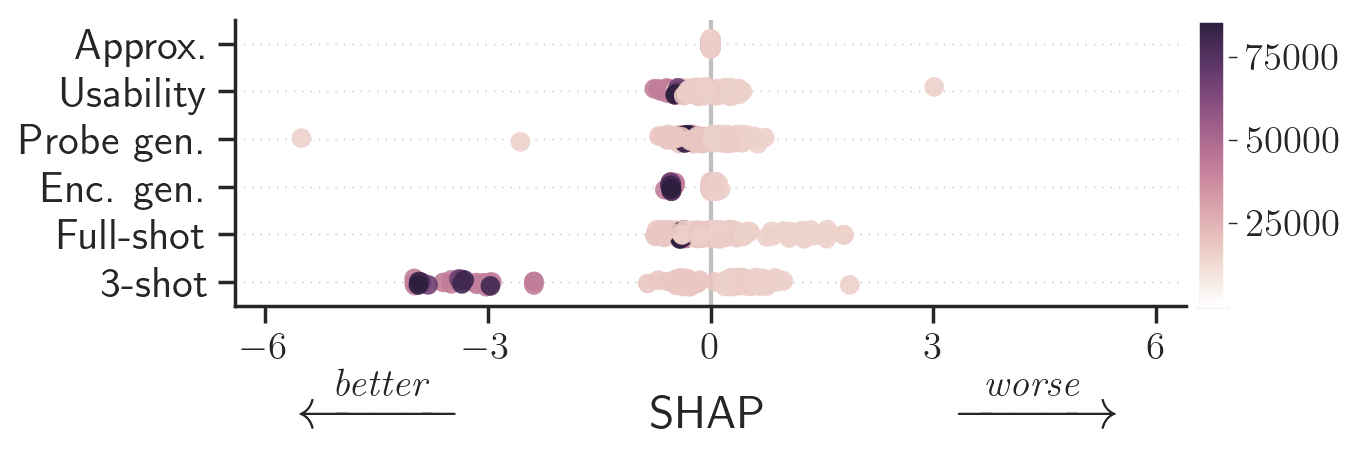

<Figure size 640x480 with 0 Axes>

In [156]:
import matplotlib as mpl

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
    g, other=plot_shap_components("batch_size", df_shap_tofit["all"], config_kwargs=dict(is_use_tex=True), 
                           rc=rc, s=50, aspect=3, height=2.5, is_colorbar=True, alpha=0.9)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{2cm} SHAP \hspace*{2cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
#    save_fig(g, "figures/nviews/main_shap.pdf")

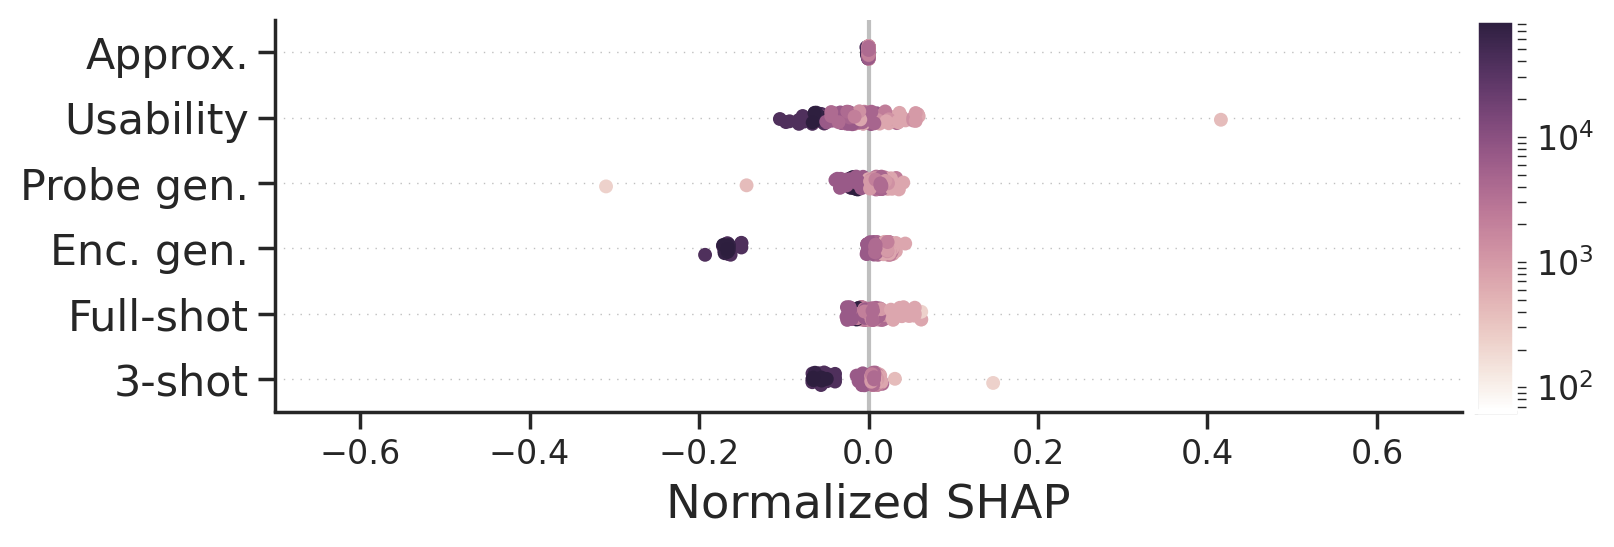

In [157]:
col = "batch_size"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(),
                             is_normalize=True, is_colorbar=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g

# other["colorbar"].formatter.set_powerlimits((0, 0))
# other["colorbar"].ax.yaxis.offsetText.set_fontsize(12)
# other["colorbar"].ax.yaxis.offsetText.set(ha="center")
# g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [158]:
treatment = "batch_size" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

agg_risk
rmse: 3.317675772209792, delta: 0


Coef.  Std.Err.         t    P>|t|    [0.025    0.975]
np.log(batch_size) -1.184455  0.388873 -3.045865  0.00276 -1.953093 -0.415818

### Other

#### Classes 

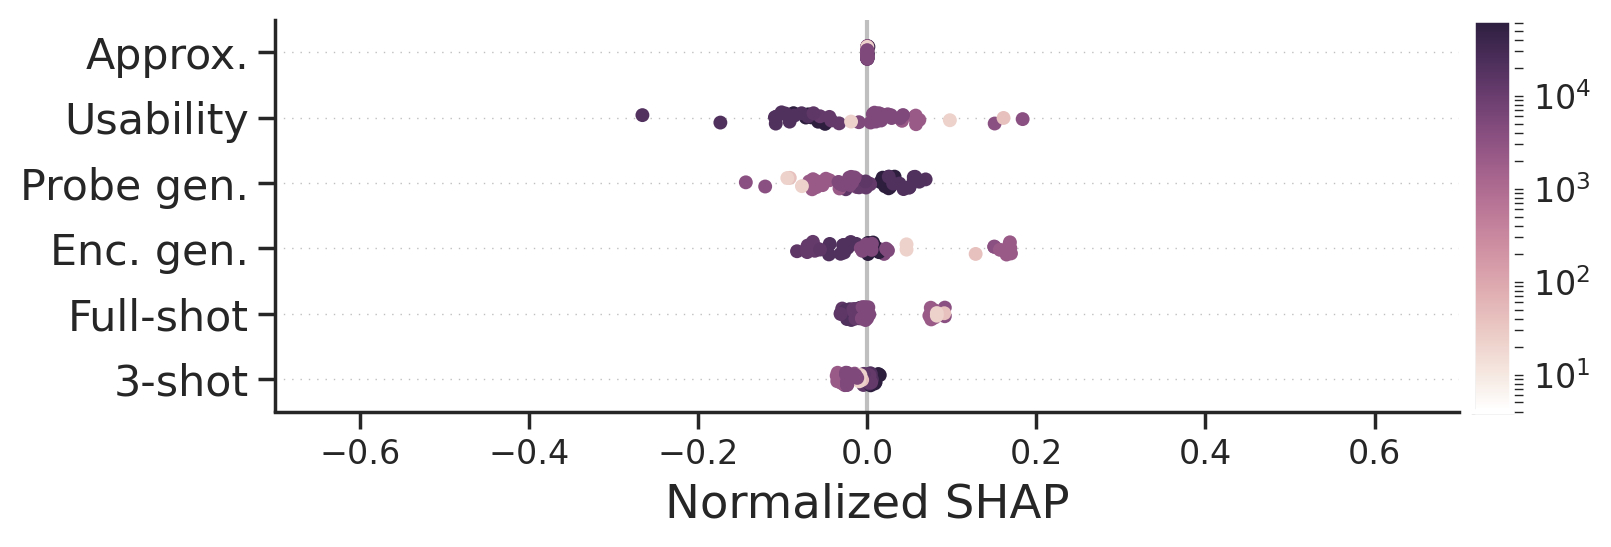

In [159]:
col = "n_classes"
g,other=plot_shap_components(col, 
                     df_shap_tofit["sel"].dropna(subset=[col]), 
                     aspect=3, height=3, is_normalize=True, is_colorbar=True, hue_norm=LogNorm())
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

Smaller improves probe gen

In [183]:
treatment = "n_classes" 
g,to_condition = causal_graph(treatment)
ols_summary(inp.dropna(subset=[ "n_classes"]), 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

#### EMA 

We see nearly no impact

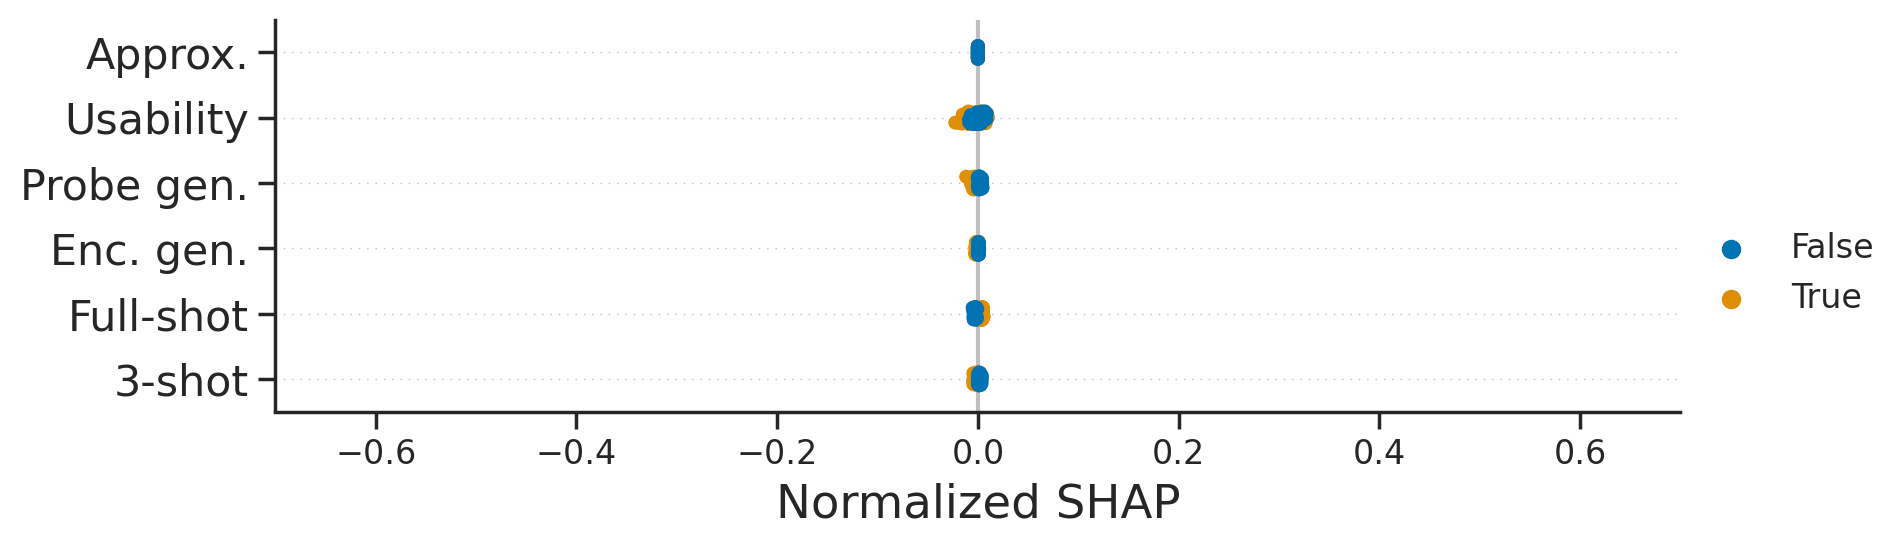

In [161]:
col = "is_ema"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
#all_hparam_plots[col] = g
#save_fig(g, f"figures/all_hparams/{col}.pdf")

In [162]:
treatment = "is_ema" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

#### Stopgrad 

In [163]:
col = "is_stopgrad"
g,other=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3, is_normalize=True)
#g.set(xlim=[-0.7,0.7])
#all_hparam_plots[col] = g
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [164]:
treatment = "is_stopgrad" 
g,to_condition = causal_graph(treatment)
ols_summary(inp, 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

enc_gen
rmse: 0.8950373750457321, delta: 0


Coef.  Std.Err.       t     P>|t|    [0.025    0.975]
is_stopgrad[T.True] -1.02493  0.329094 -3.1144  0.002227 -1.675447 -0.374413


agg_risk
rmse: 3.2730473489343335, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
is_stopgrad[T.True] -2.384618  1.203457 -1.981472  0.049456 -4.763483   

                       0.975]  
is_stopgrad[T.True] -0.005753

#### Plot all hparam

In [165]:
s = r"""
\begin{figure}[h]
\centering
"""
for i,n in enumerate(all_hparam_plots.keys()):

    s += r"""\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/%(n)s.pdf}
\caption{%(p)s}
\label{appx:fig:all_hparam_plots:%(n)s}
\end{subfigure}
""" % { "n": n, "p": PRETTY_RENAMER[n] }
        
    if i % 2 == 0:
        s += "\hfill{}\n"

s += r"""\vspace{-0.5em}
\captionsetup{font=small,labelfont=small}
\caption{Impact of important hyperparameters.
Each plot shows a hyperparameter.
Each point shows a different model.
The Y-axis shows the metric, either the risk component or the total risk in the full (``Agg. Risk') and few-shot regime (``3 shot'').
The X-axis shows the normalized SHAP value.
\textbf{Negative values mean that a hyperparameter is beneficial}: it decreases the risk.
Axes cut to $[-0.7,0.7]$.}
\label{appx:fig:all_hparam_plots}
\end{figure}"""

In [166]:
print(s)


\begin{figure}[h]
\centering
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/z_dim.pdf}
\caption{Z dim.}
\label{appx:fig:all_hparam_plots:z_dim}
\end{subfigure}
\hfill{}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/n_augmentations.pdf}
\caption{Num. aug.}
\label{appx:fig:all_hparam_plots:n_augmentations}
\end{subfigure}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/nviews.pdf}
\caption{Num. views}
\label{appx:fig:all_hparam_plots:nviews}
\end{subfigure}
\hfill{}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/ssl_mode.pdf}
\caption{SSL Mode}
\label{appx:fig:al

### Old derivations

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(m,n) = \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(m,n)$$ 
where $n$ is the number of samples and $m$ is the encoder. 
Now by standard scaling laws we also have:
$$ \mathrm{probe\_gen}(m,n) =  \mathrm{probe\_gen}(m,\infty) + \frac{C(m)}{n^{\alpha(m)}}$$

The issue is we do not have $\mathrm{probe\_gen}(m,\infty)$ but given that we know the decomposition at a specific $n=|\mathcal{D}_{train}|$ (i.e. ImageNet training size), we can use:
$$\mathrm{probe\_gen}(m,\infty)  =  \mathrm{probe\_gen}(m,|\mathcal{D}_{train}|) - \frac{C(m)}{|\mathcal{D}_{train}|^{\alpha(m)}}$$
so 

$$
\begin{aligned}
\mathrm{perf}(m,n) &= \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) - \frac{C}{|\mathcal{D}_{train}|^{\alpha}} + \frac{C}{n^{\alpha}} \\
\mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}) &=   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) + C \left(\frac{1}{n^{\alpha}} - \frac{1}{|\mathcal{D}_{train}|^{\alpha}} \right)  \\
\end{aligned}
$$

Assuming that $|\mathcal{D}_{train}| \gg 0$ we have 
$$
\log( \mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen})) \approx   \log \left(\mathrm{probe\_gen}(|\mathcal{D}_{train}|) + \frac{C}{n^{\alpha}} \right) 
$$

